In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading excel file into dataframe(df)
df = pd.read_csv(r'C:\Users\Lenovo\OneDrive\Y2S3\Introduction to Data Science\Assignment\Dataset\owid-covid-data.csv')

In [5]:
# Displaying the top records of the dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [6]:
df_us = df[df['iso_code'] == 'USA']

In [7]:
df_us.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
91593,USA,North America,United States,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
91594,USA,North America,United States,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
91595,USA,North America,United States,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
91596,USA,North America,United States,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,NaN
91597,USA,North America,United States,2020-01-26,5.0,3.0,NaN,NaN,NaN,NaN,...,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.926,0.75


In [8]:
df_us['CFR'] = (df_us['total_cases'] / df_us['total_deaths'])*100
df_us['CFR_per_million'] = (df_us['total_cases_per_million'] / df_us['total_deaths_per_million'])*100
df_us['impact'] = (df_us['total_cases'] * 0.1 + df_us['hosp_patients'] * 0.2 + df_us['icu_patients'] * 0.3 + df_us['total_deaths'] * 0.4)
df_us['impact_per_million'] = (df_us['total_cases_per_million'] * 0.1 + df_us['hosp_patients_per_million'] * 0.2 + df_us['icu_patients_per_million'] * 0.3 + df_us['total_deaths_per_million'] * 0.4)

<ipython-input-8-77b0c849ba27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['CFR'] = (df_us['total_cases'] / df_us['total_deaths'])*100
<ipython-input-8-77b0c849ba27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['CFR_per_million'] = (df_us['total_cases_per_million'] / df_us['total_deaths_per_million'])*100
<ipython-input-8-77b0c849ba27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [9]:
# Update graph font size
plt.rcParams.update({'font.size': 22})

In [11]:
# Plotting heatmap for EDA
plt.figure(figsize = (20,25))
corr = df_us.corr([])
sns.heatmap(corr[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']], cmap = 'Blues', annot = True)

TypeError: 'method' object is not subscriptable

<Figure size 1440x1800 with 0 Axes>

<Figure size 432x288 with 0 Axes>

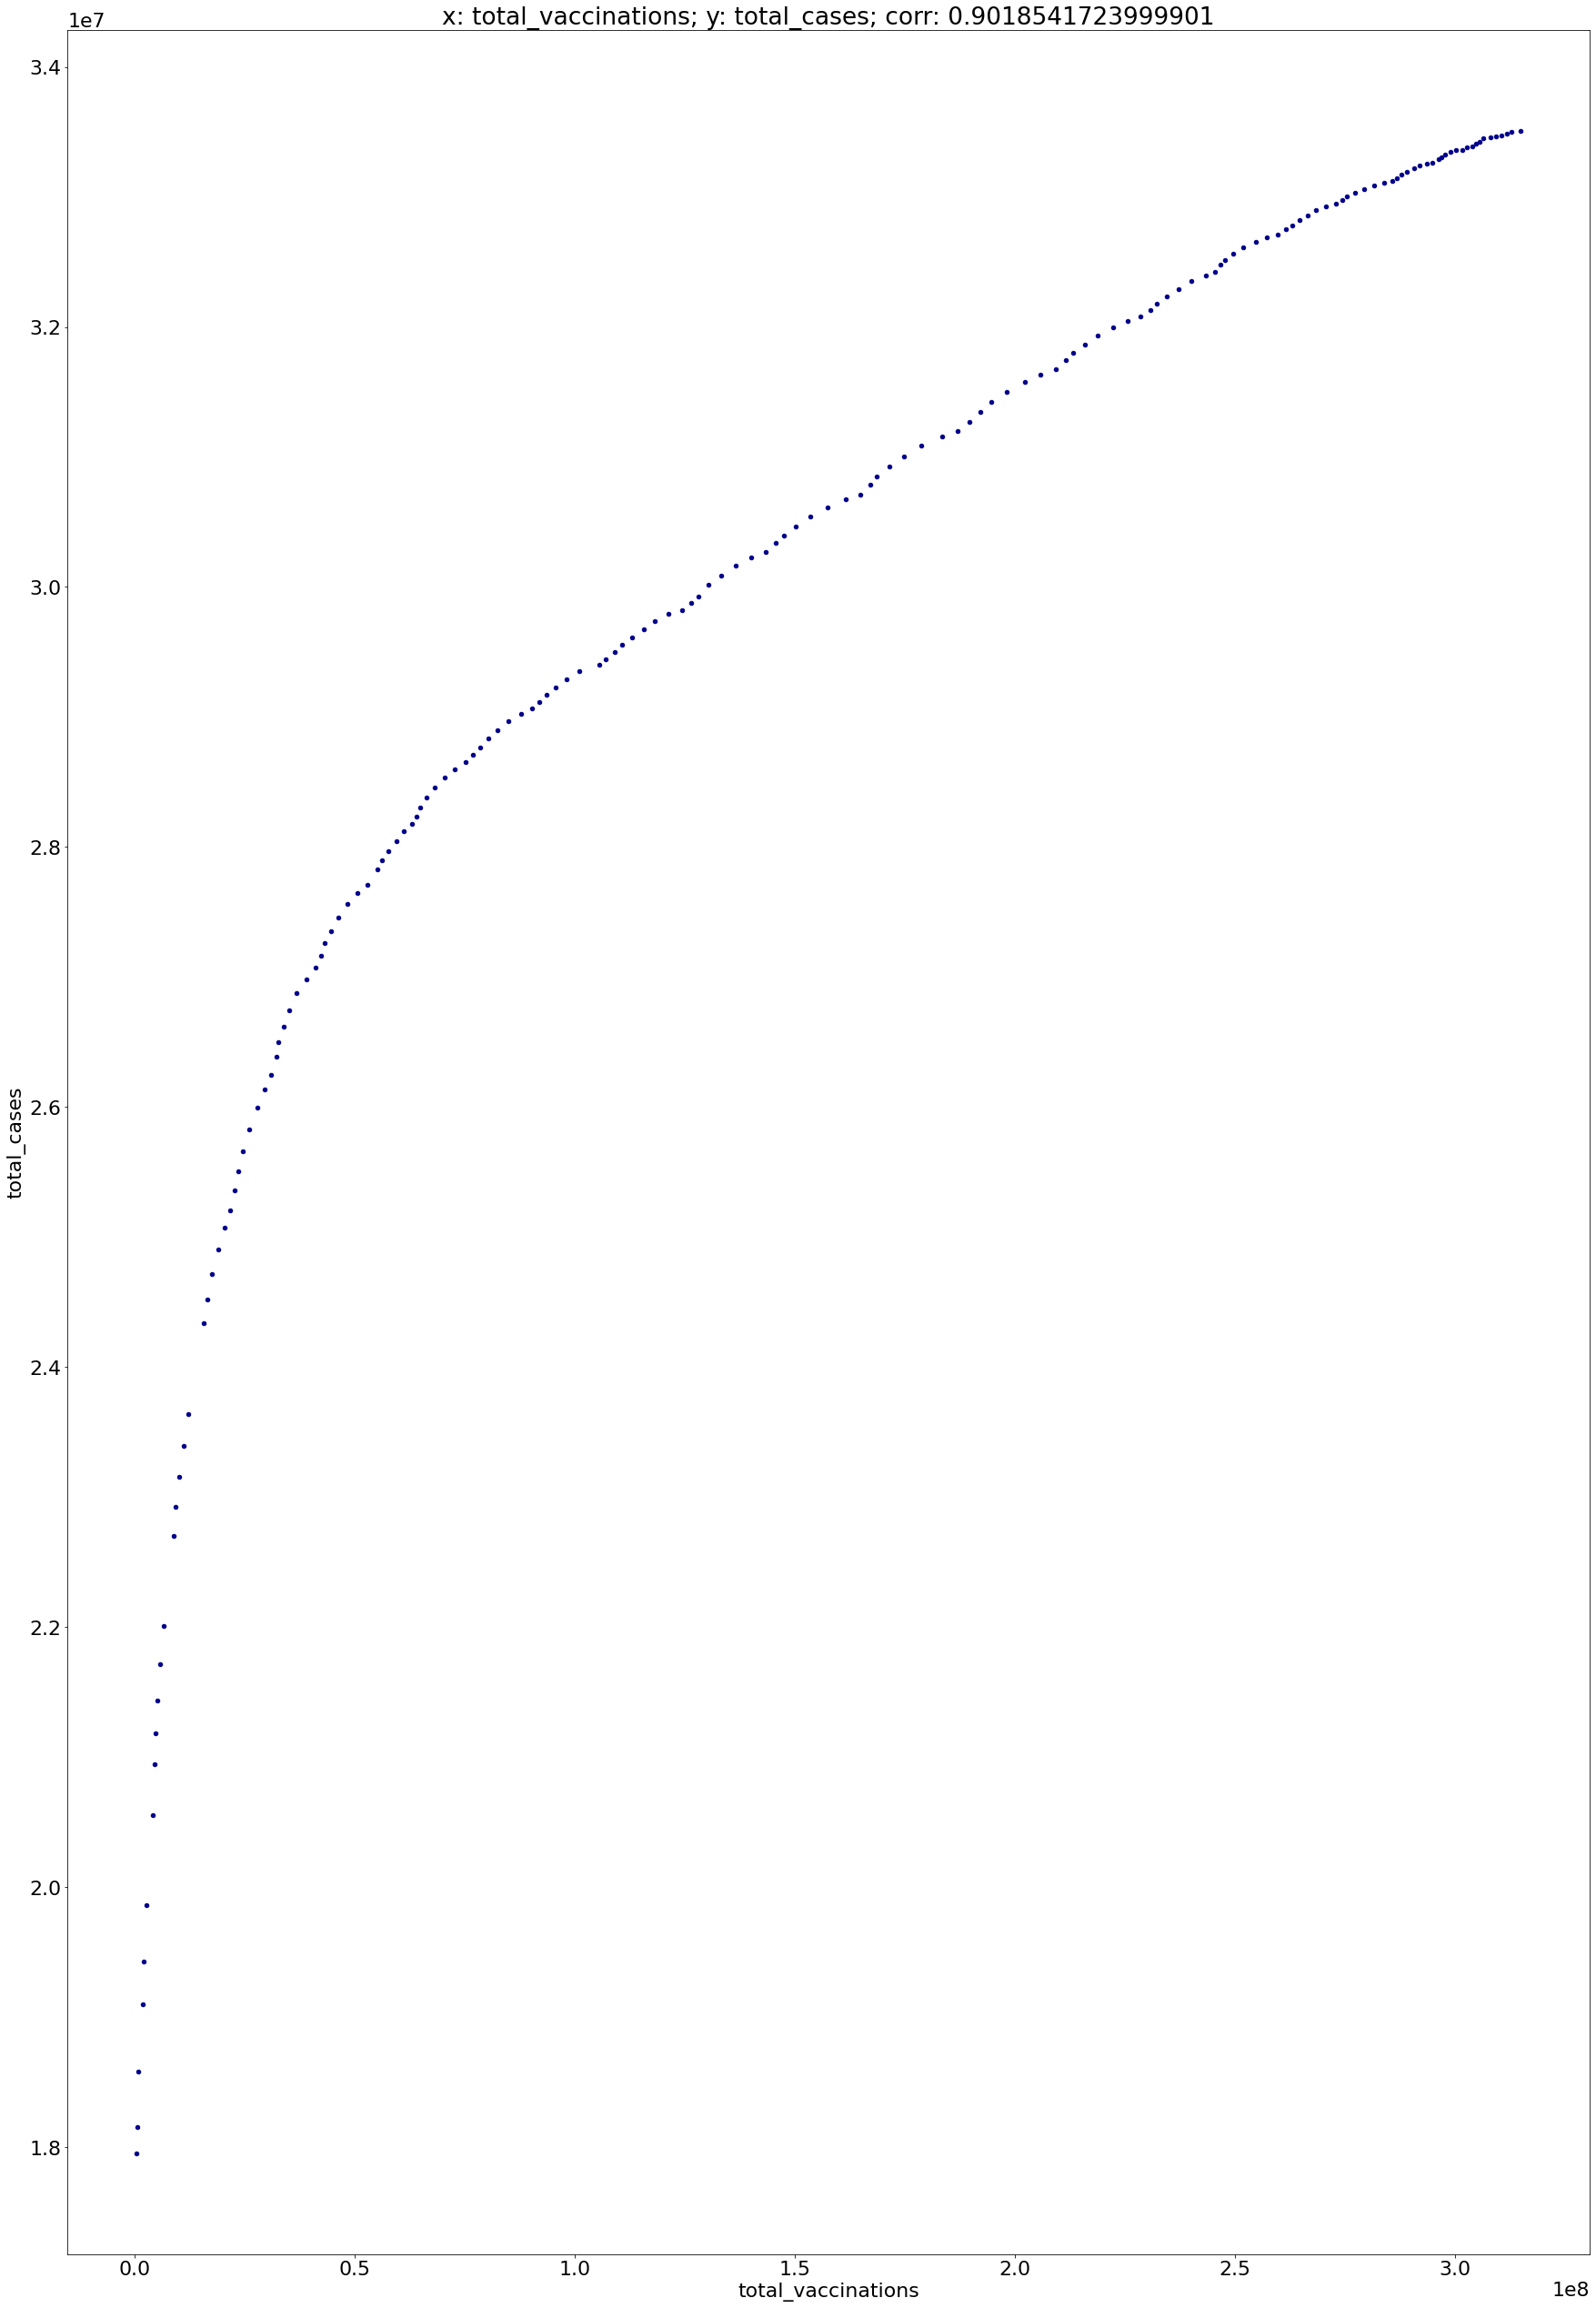

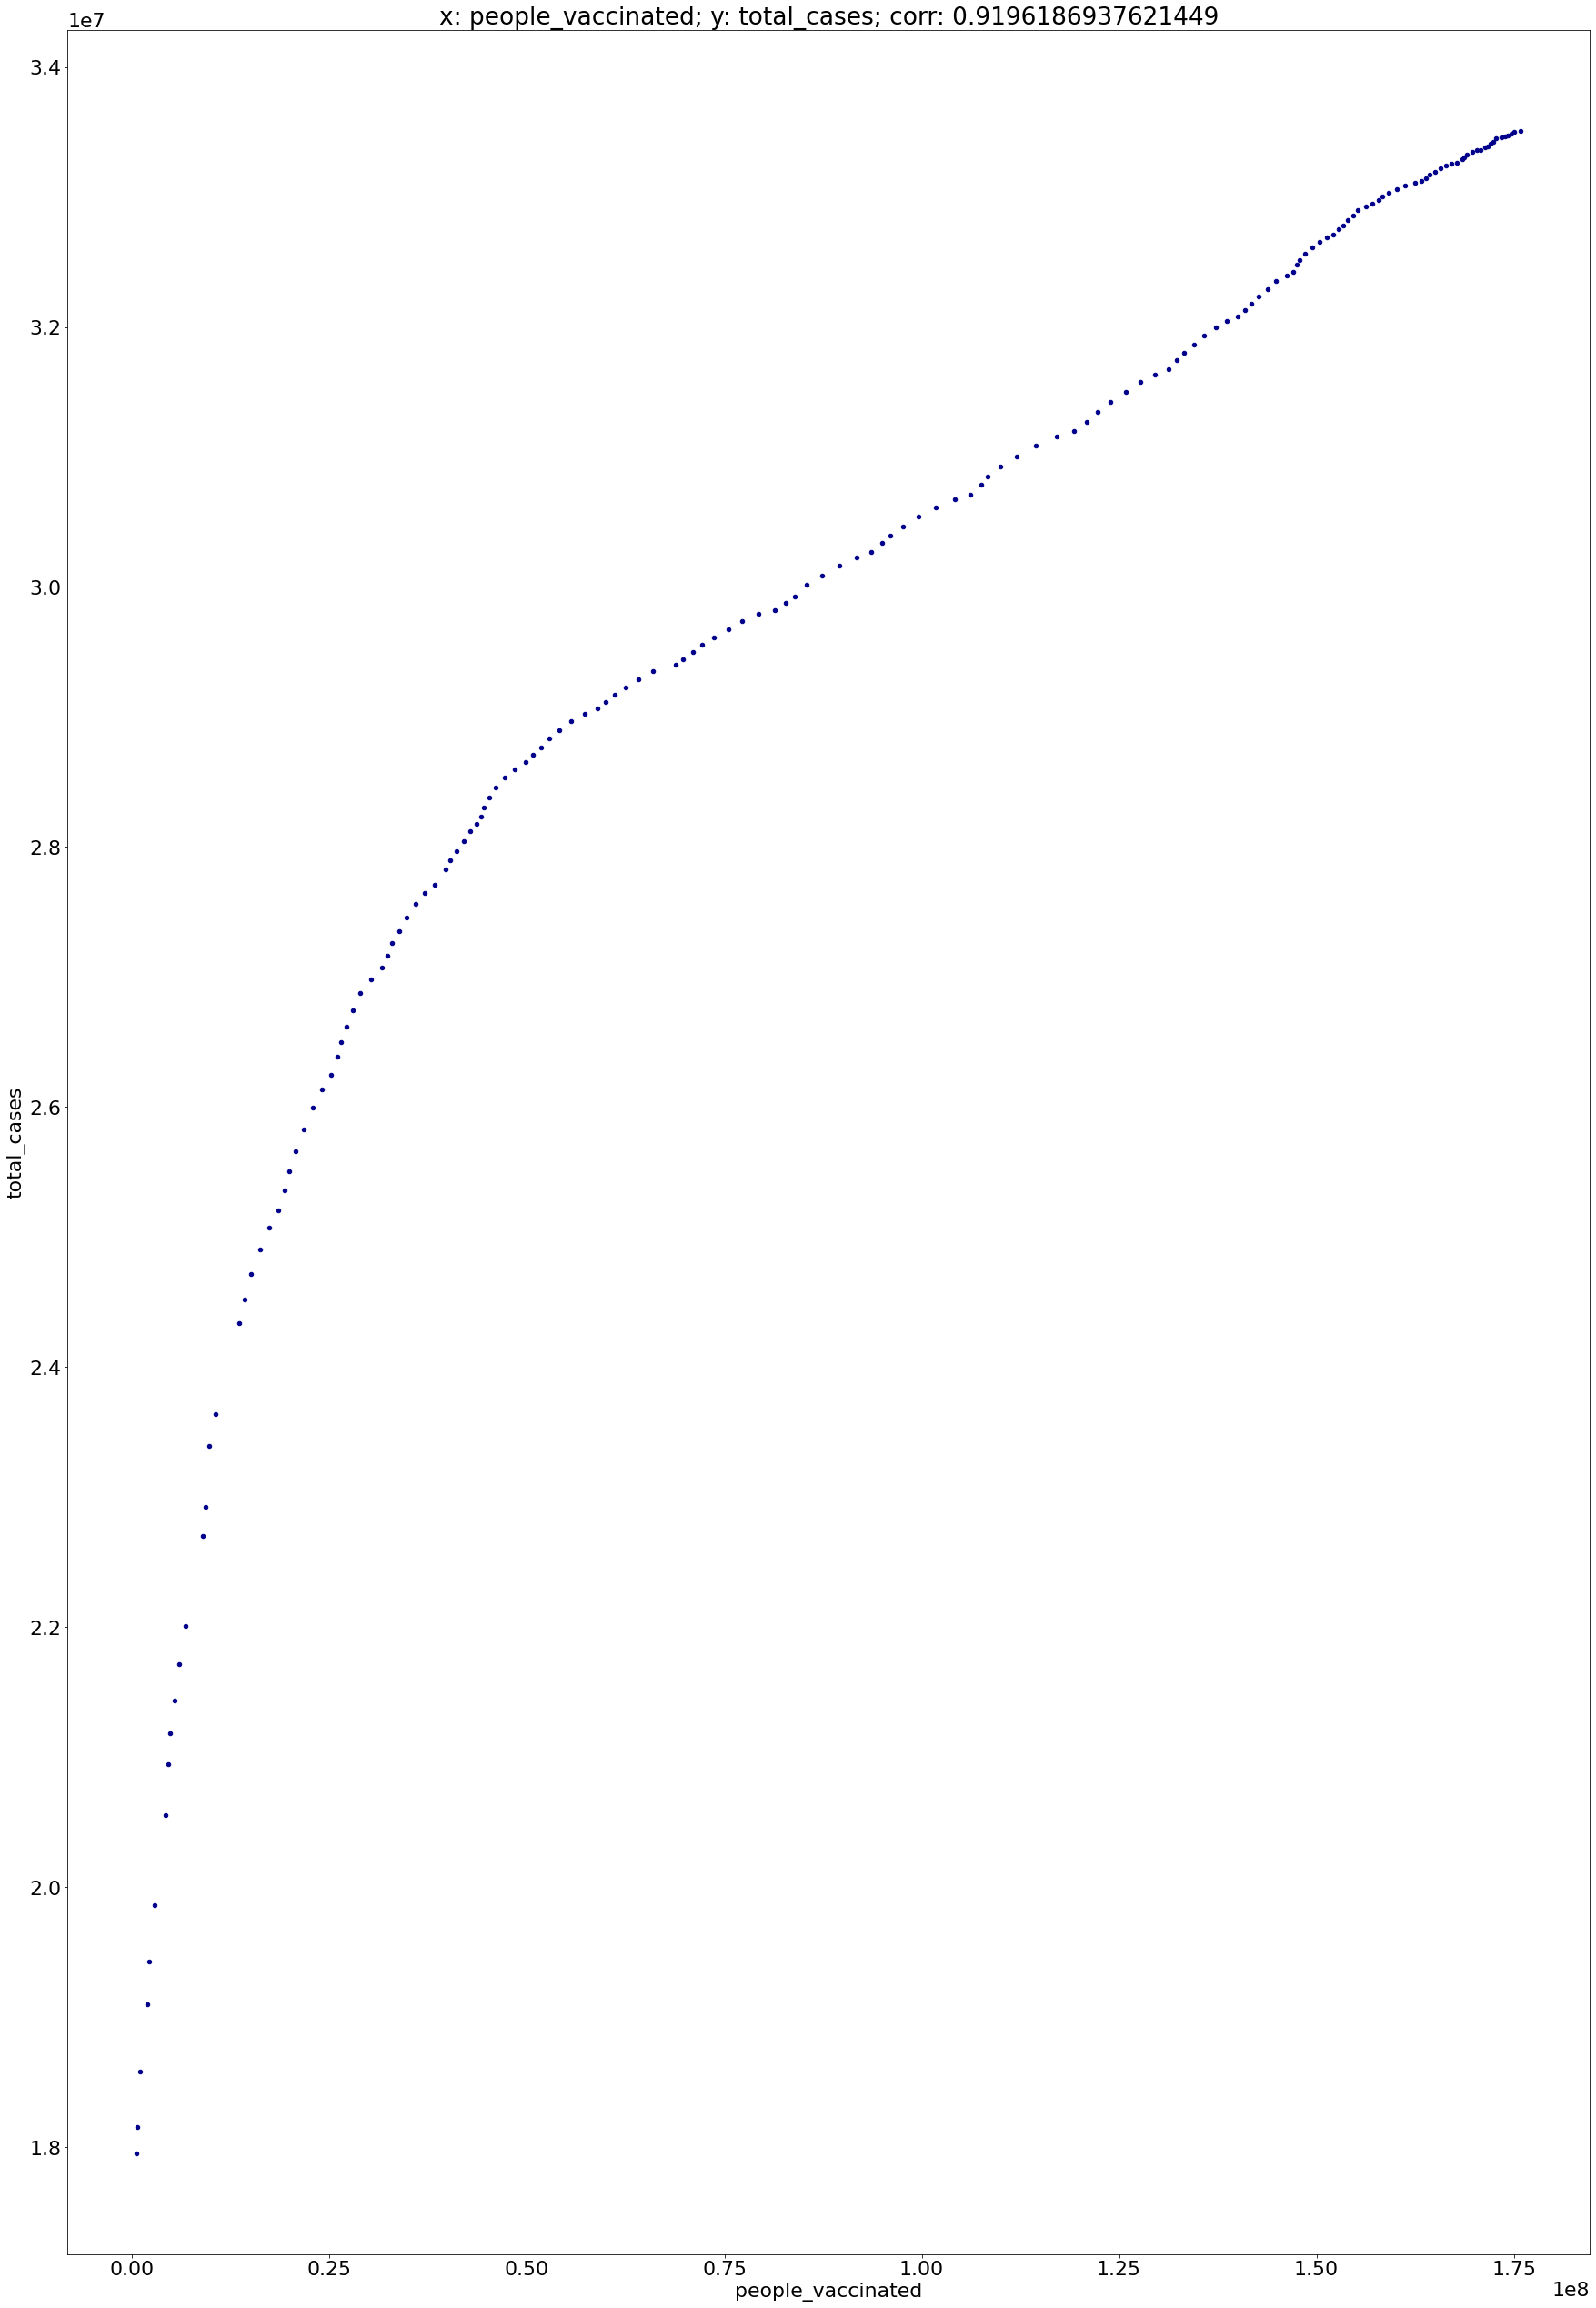

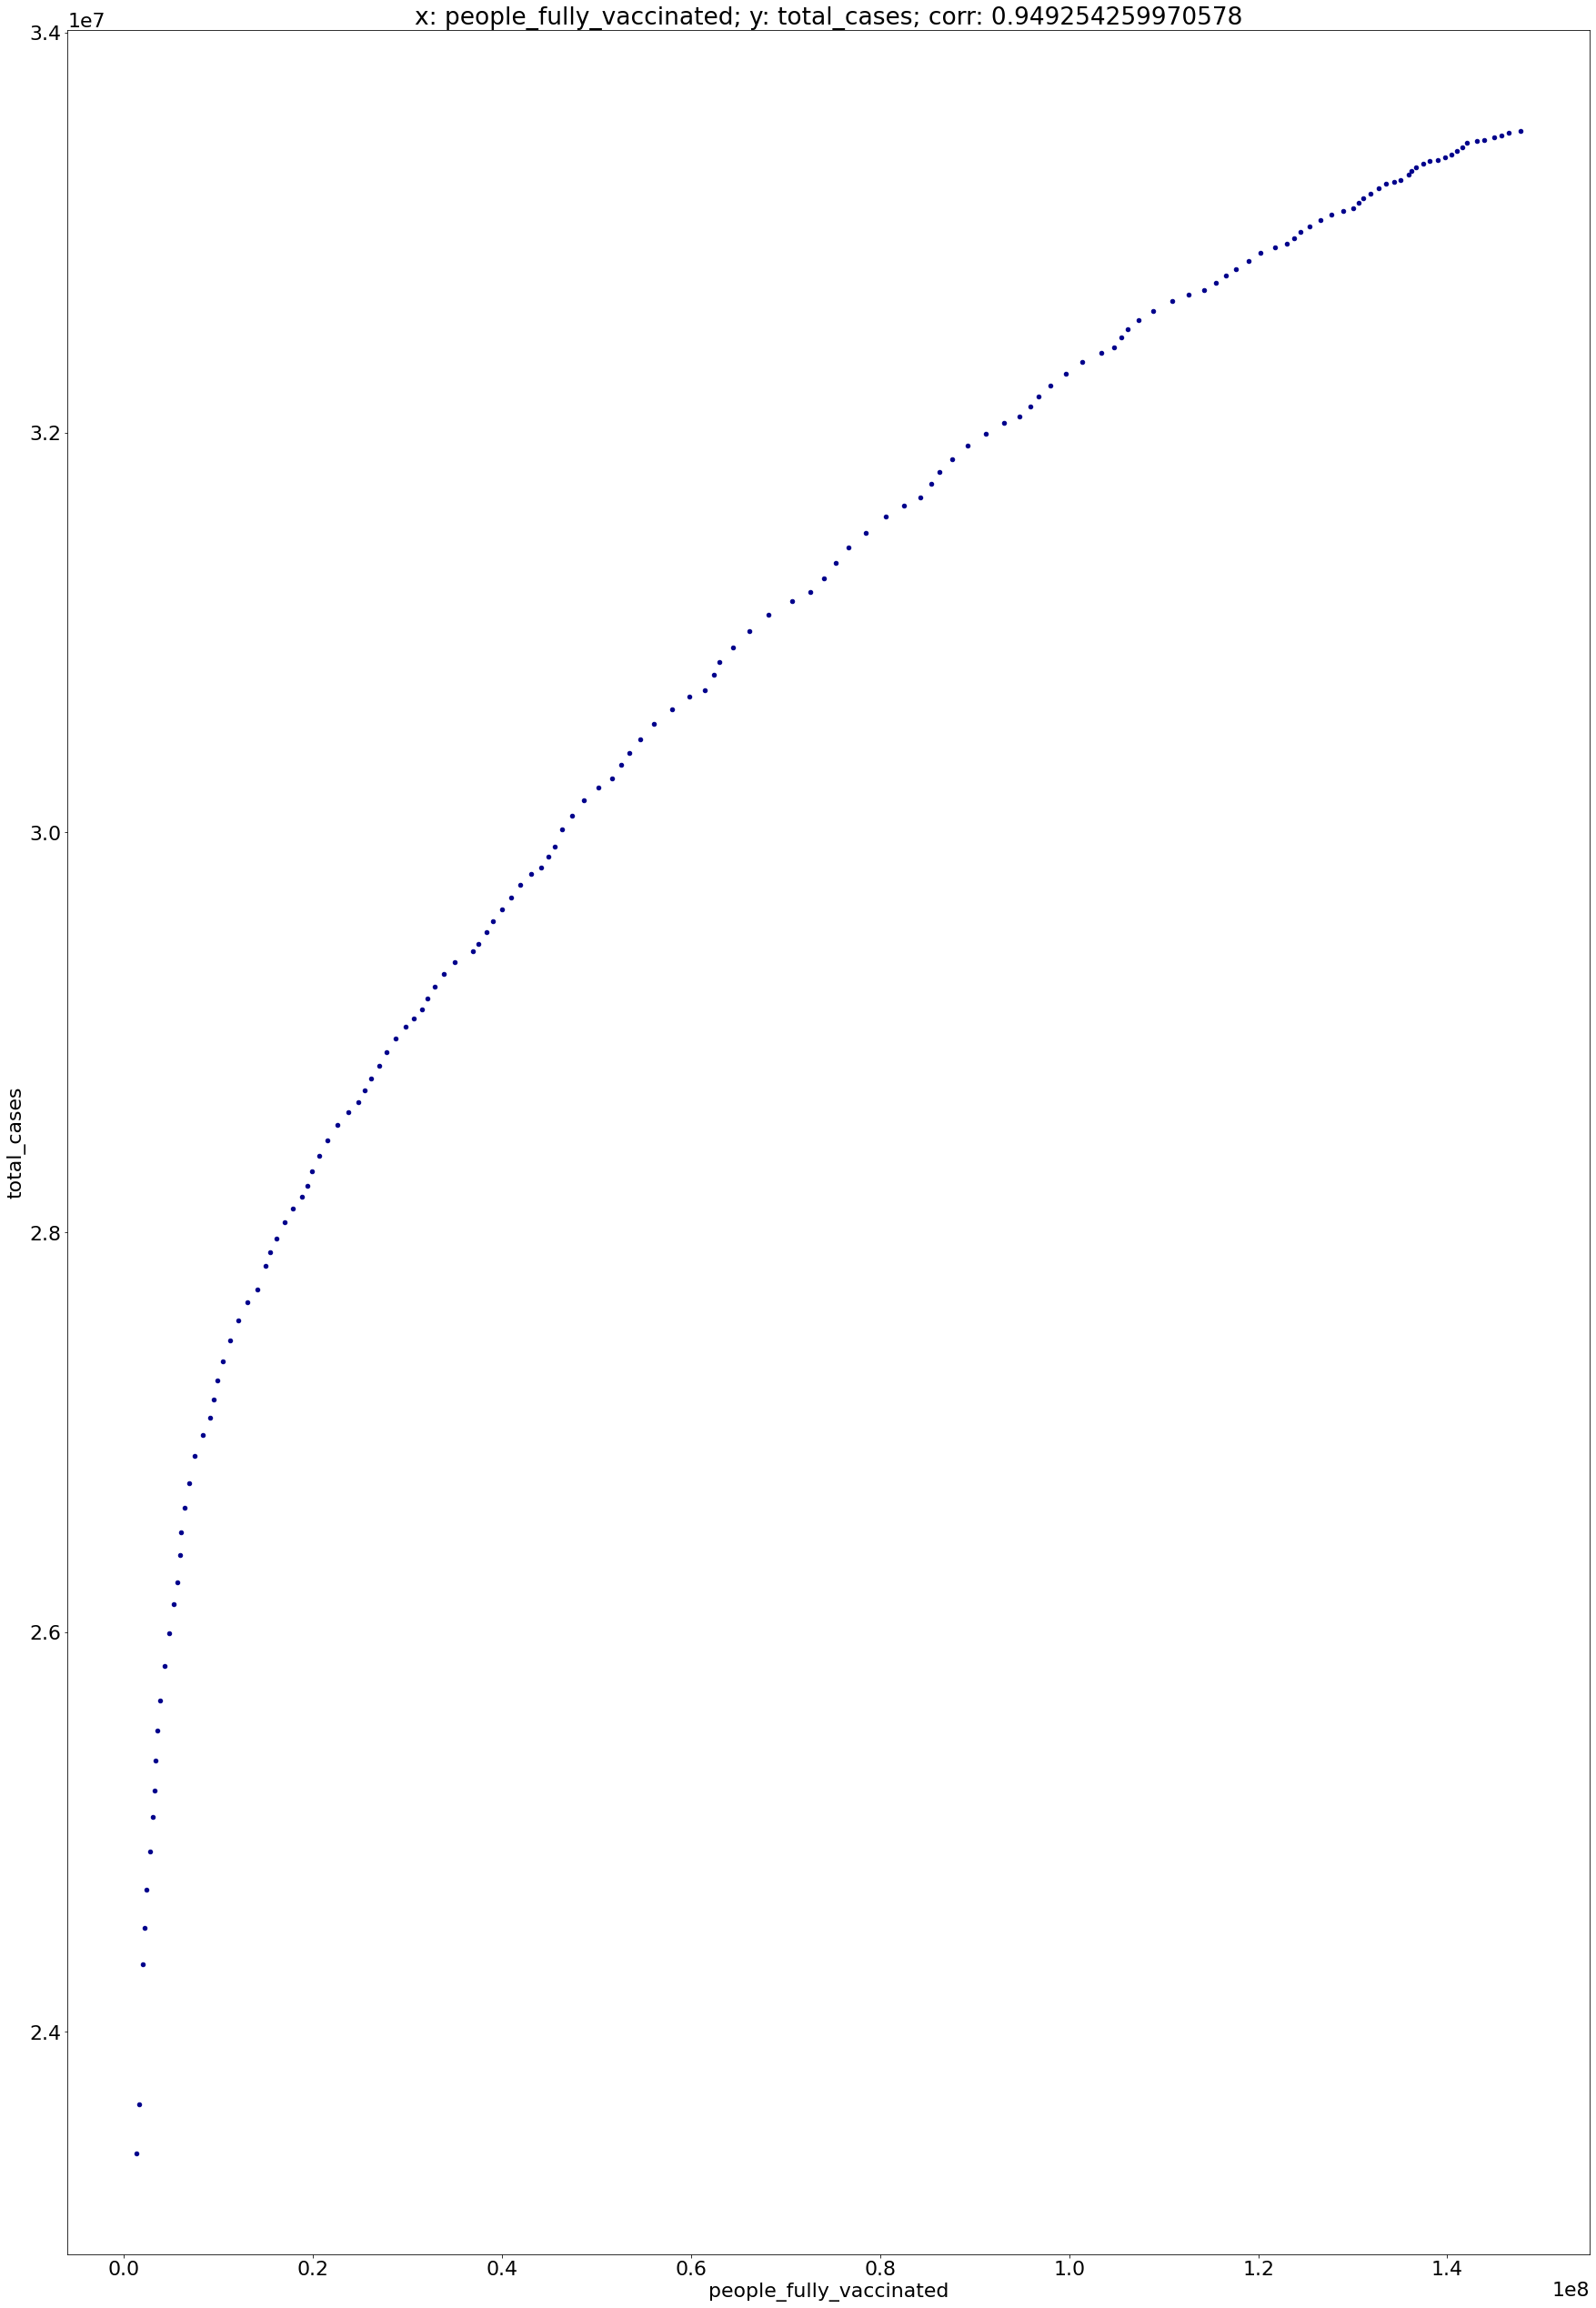

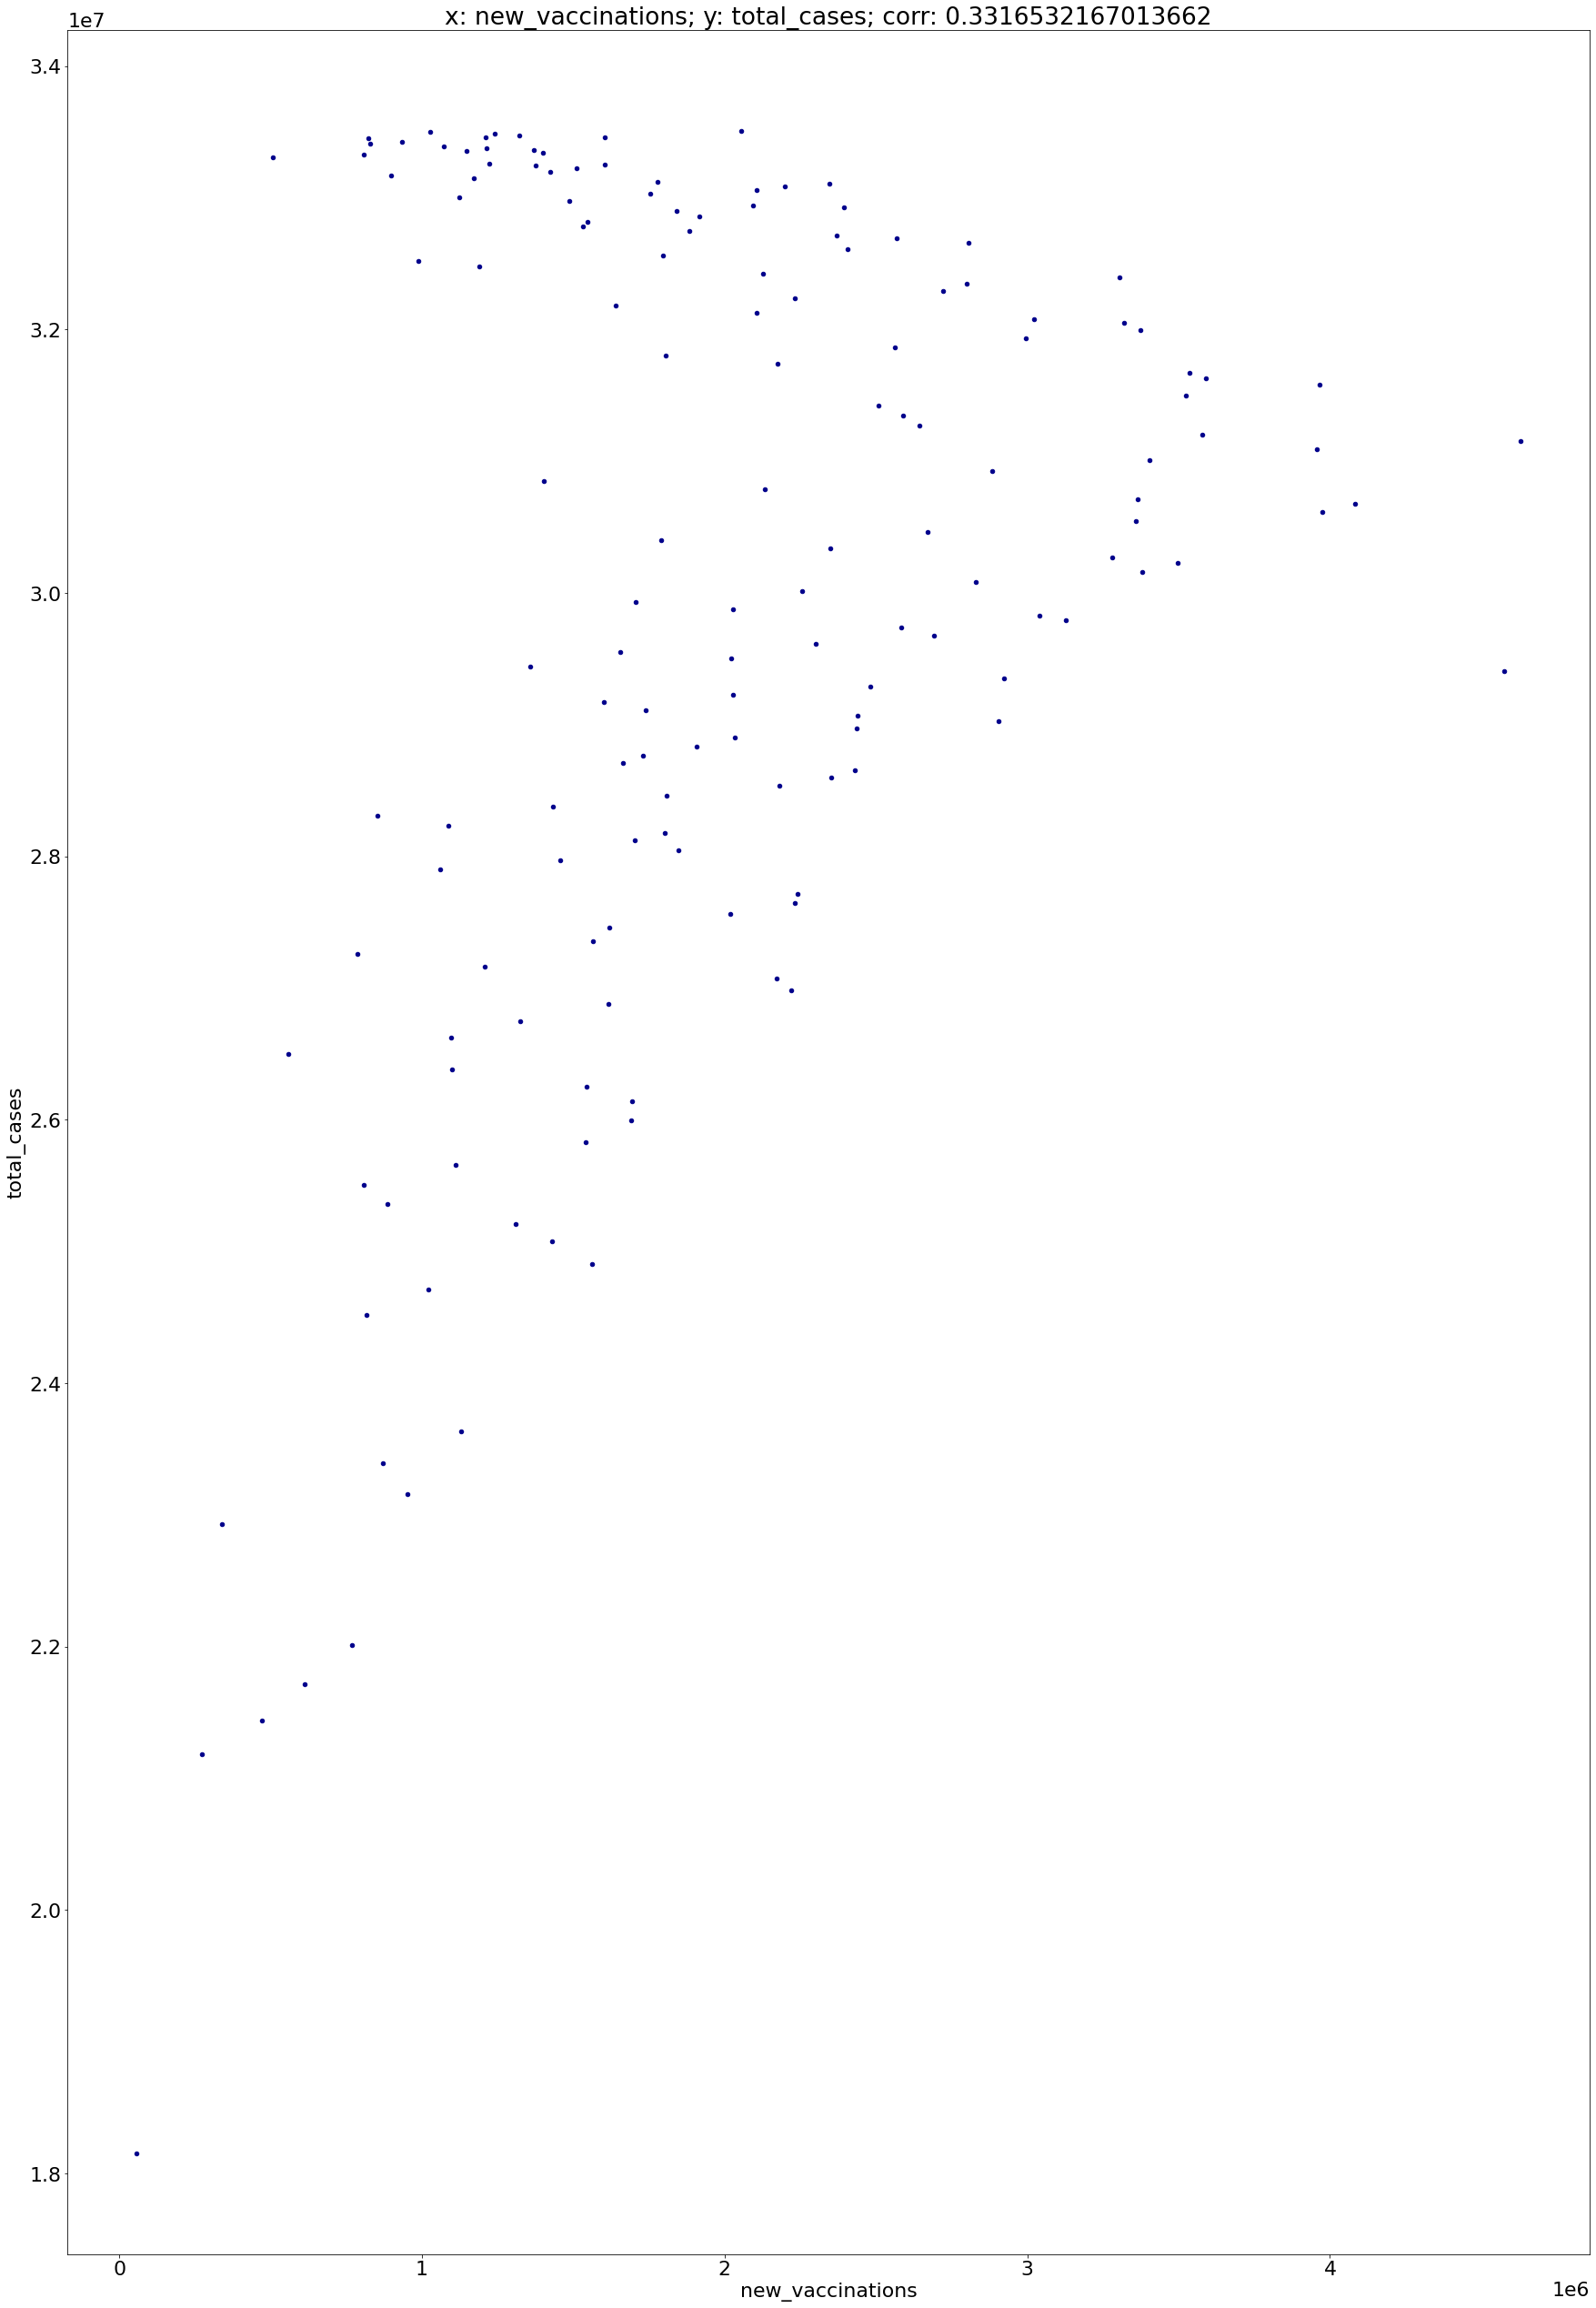

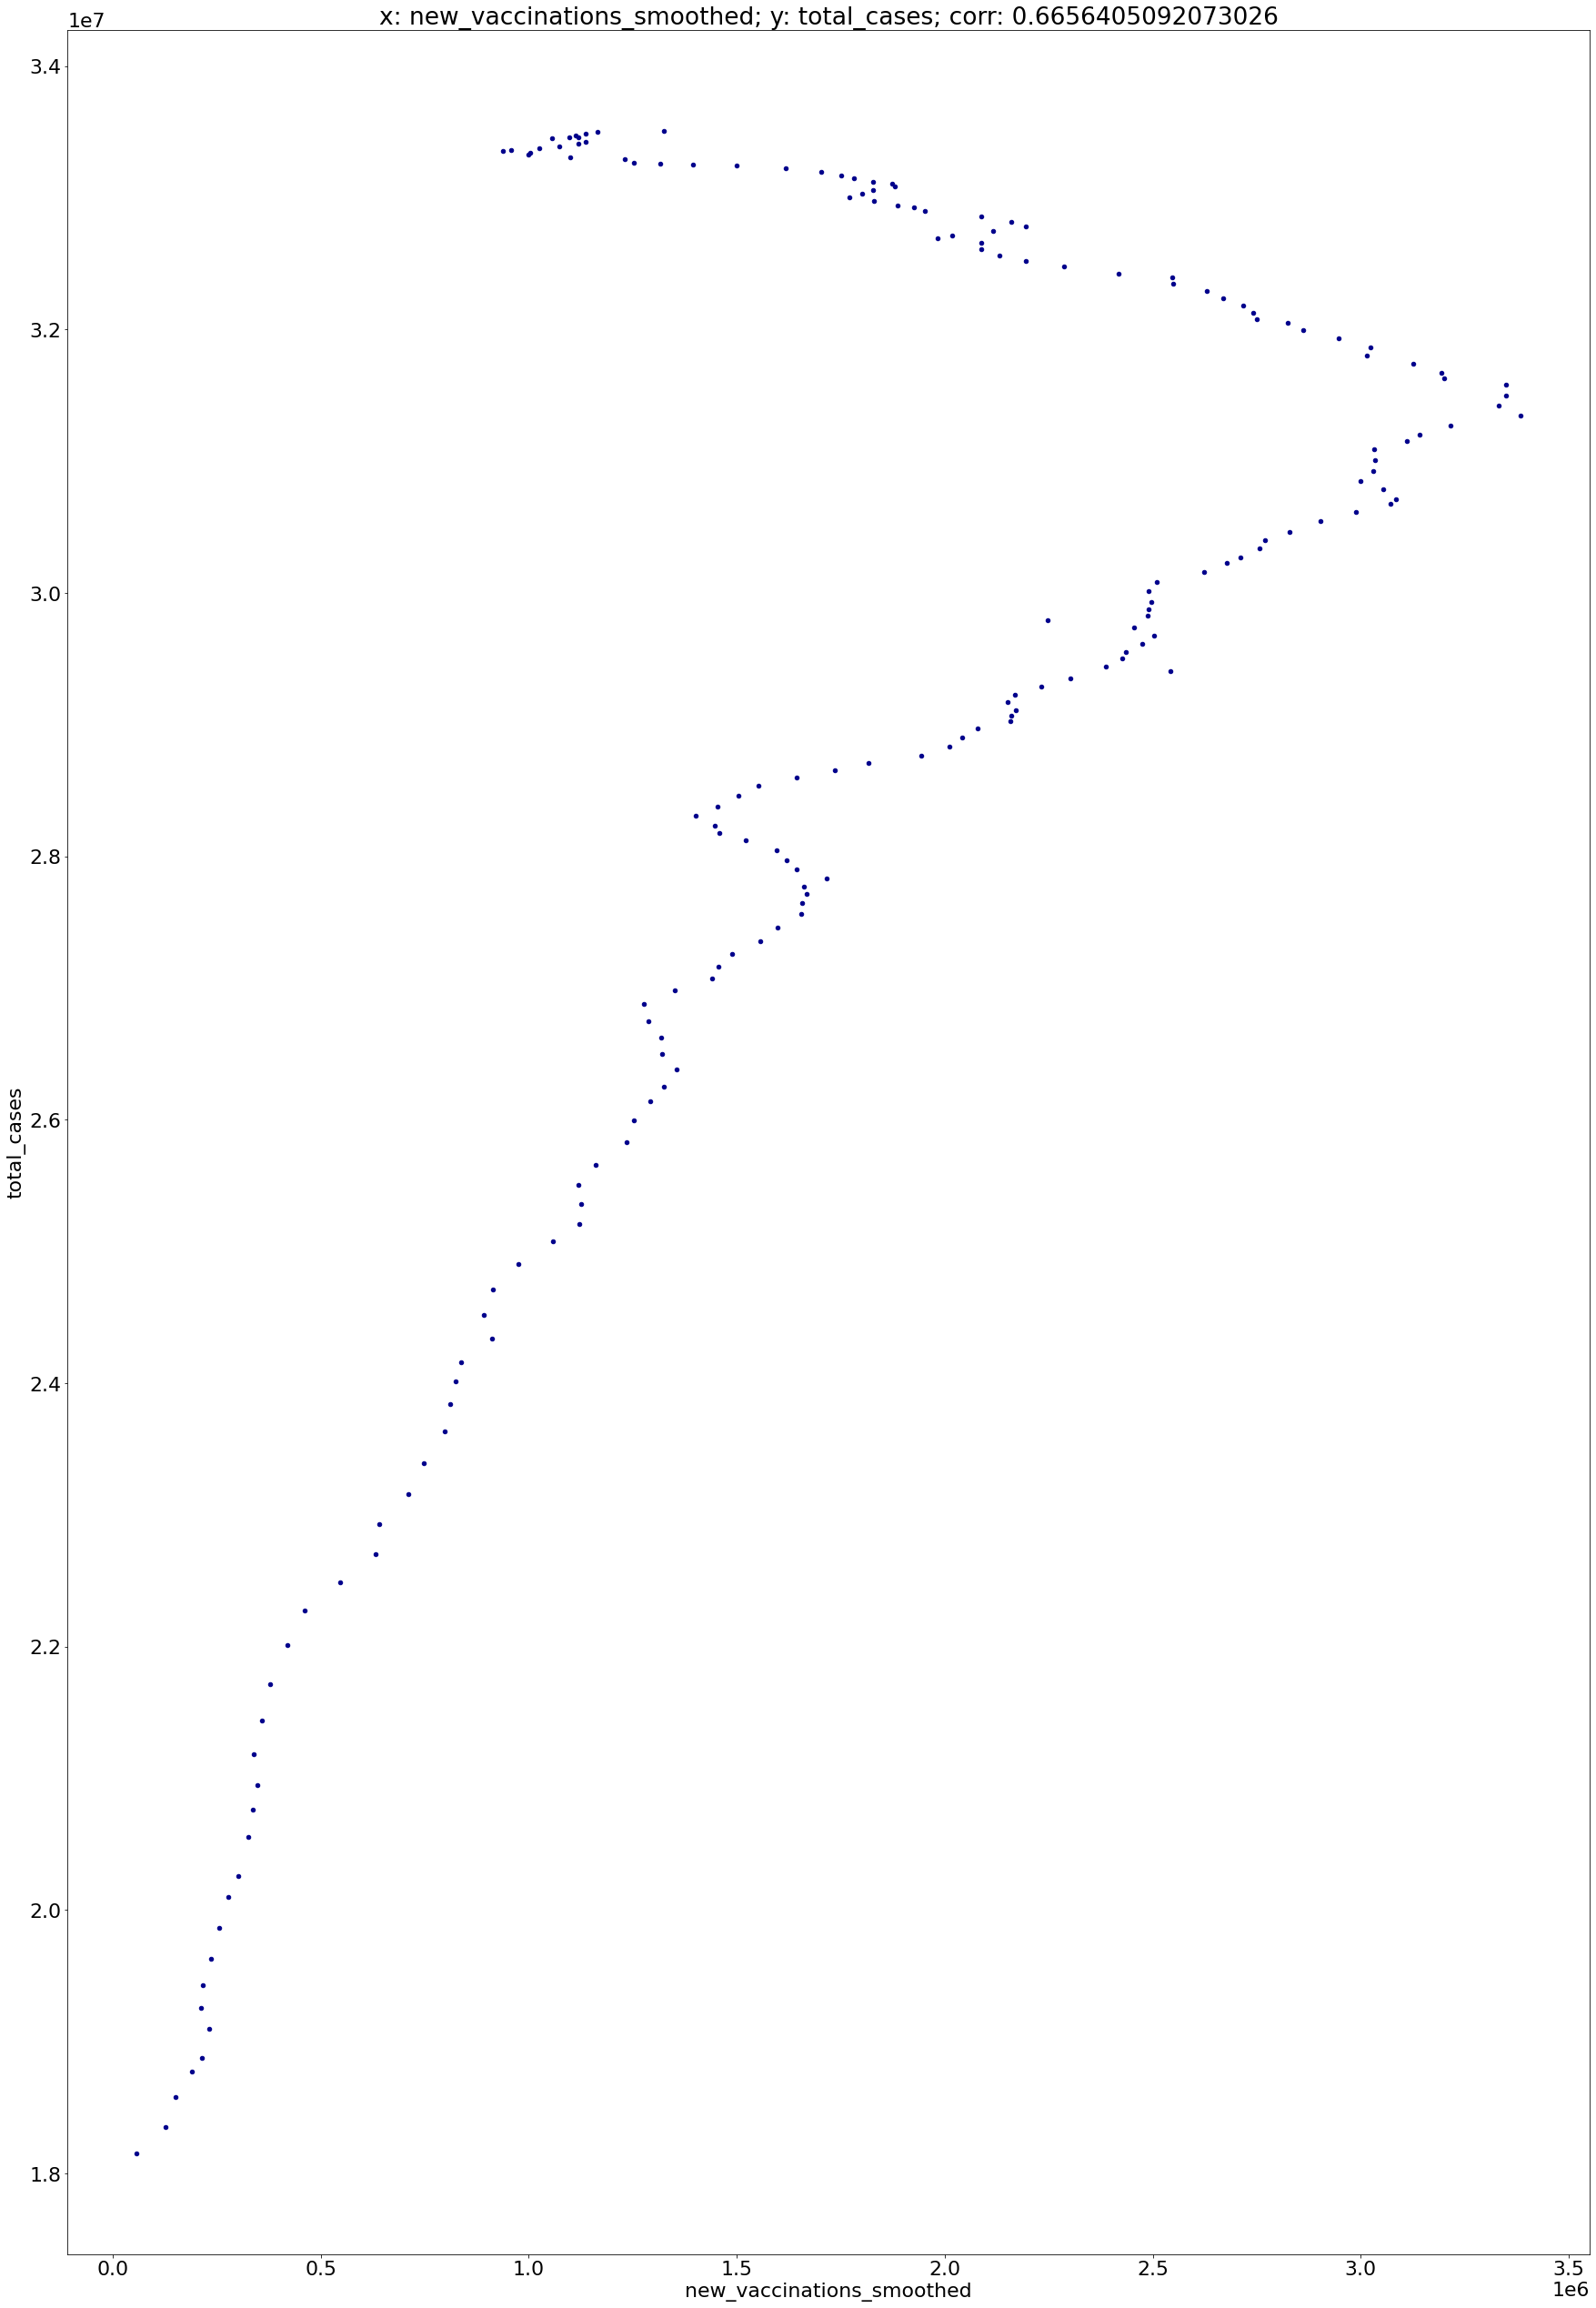

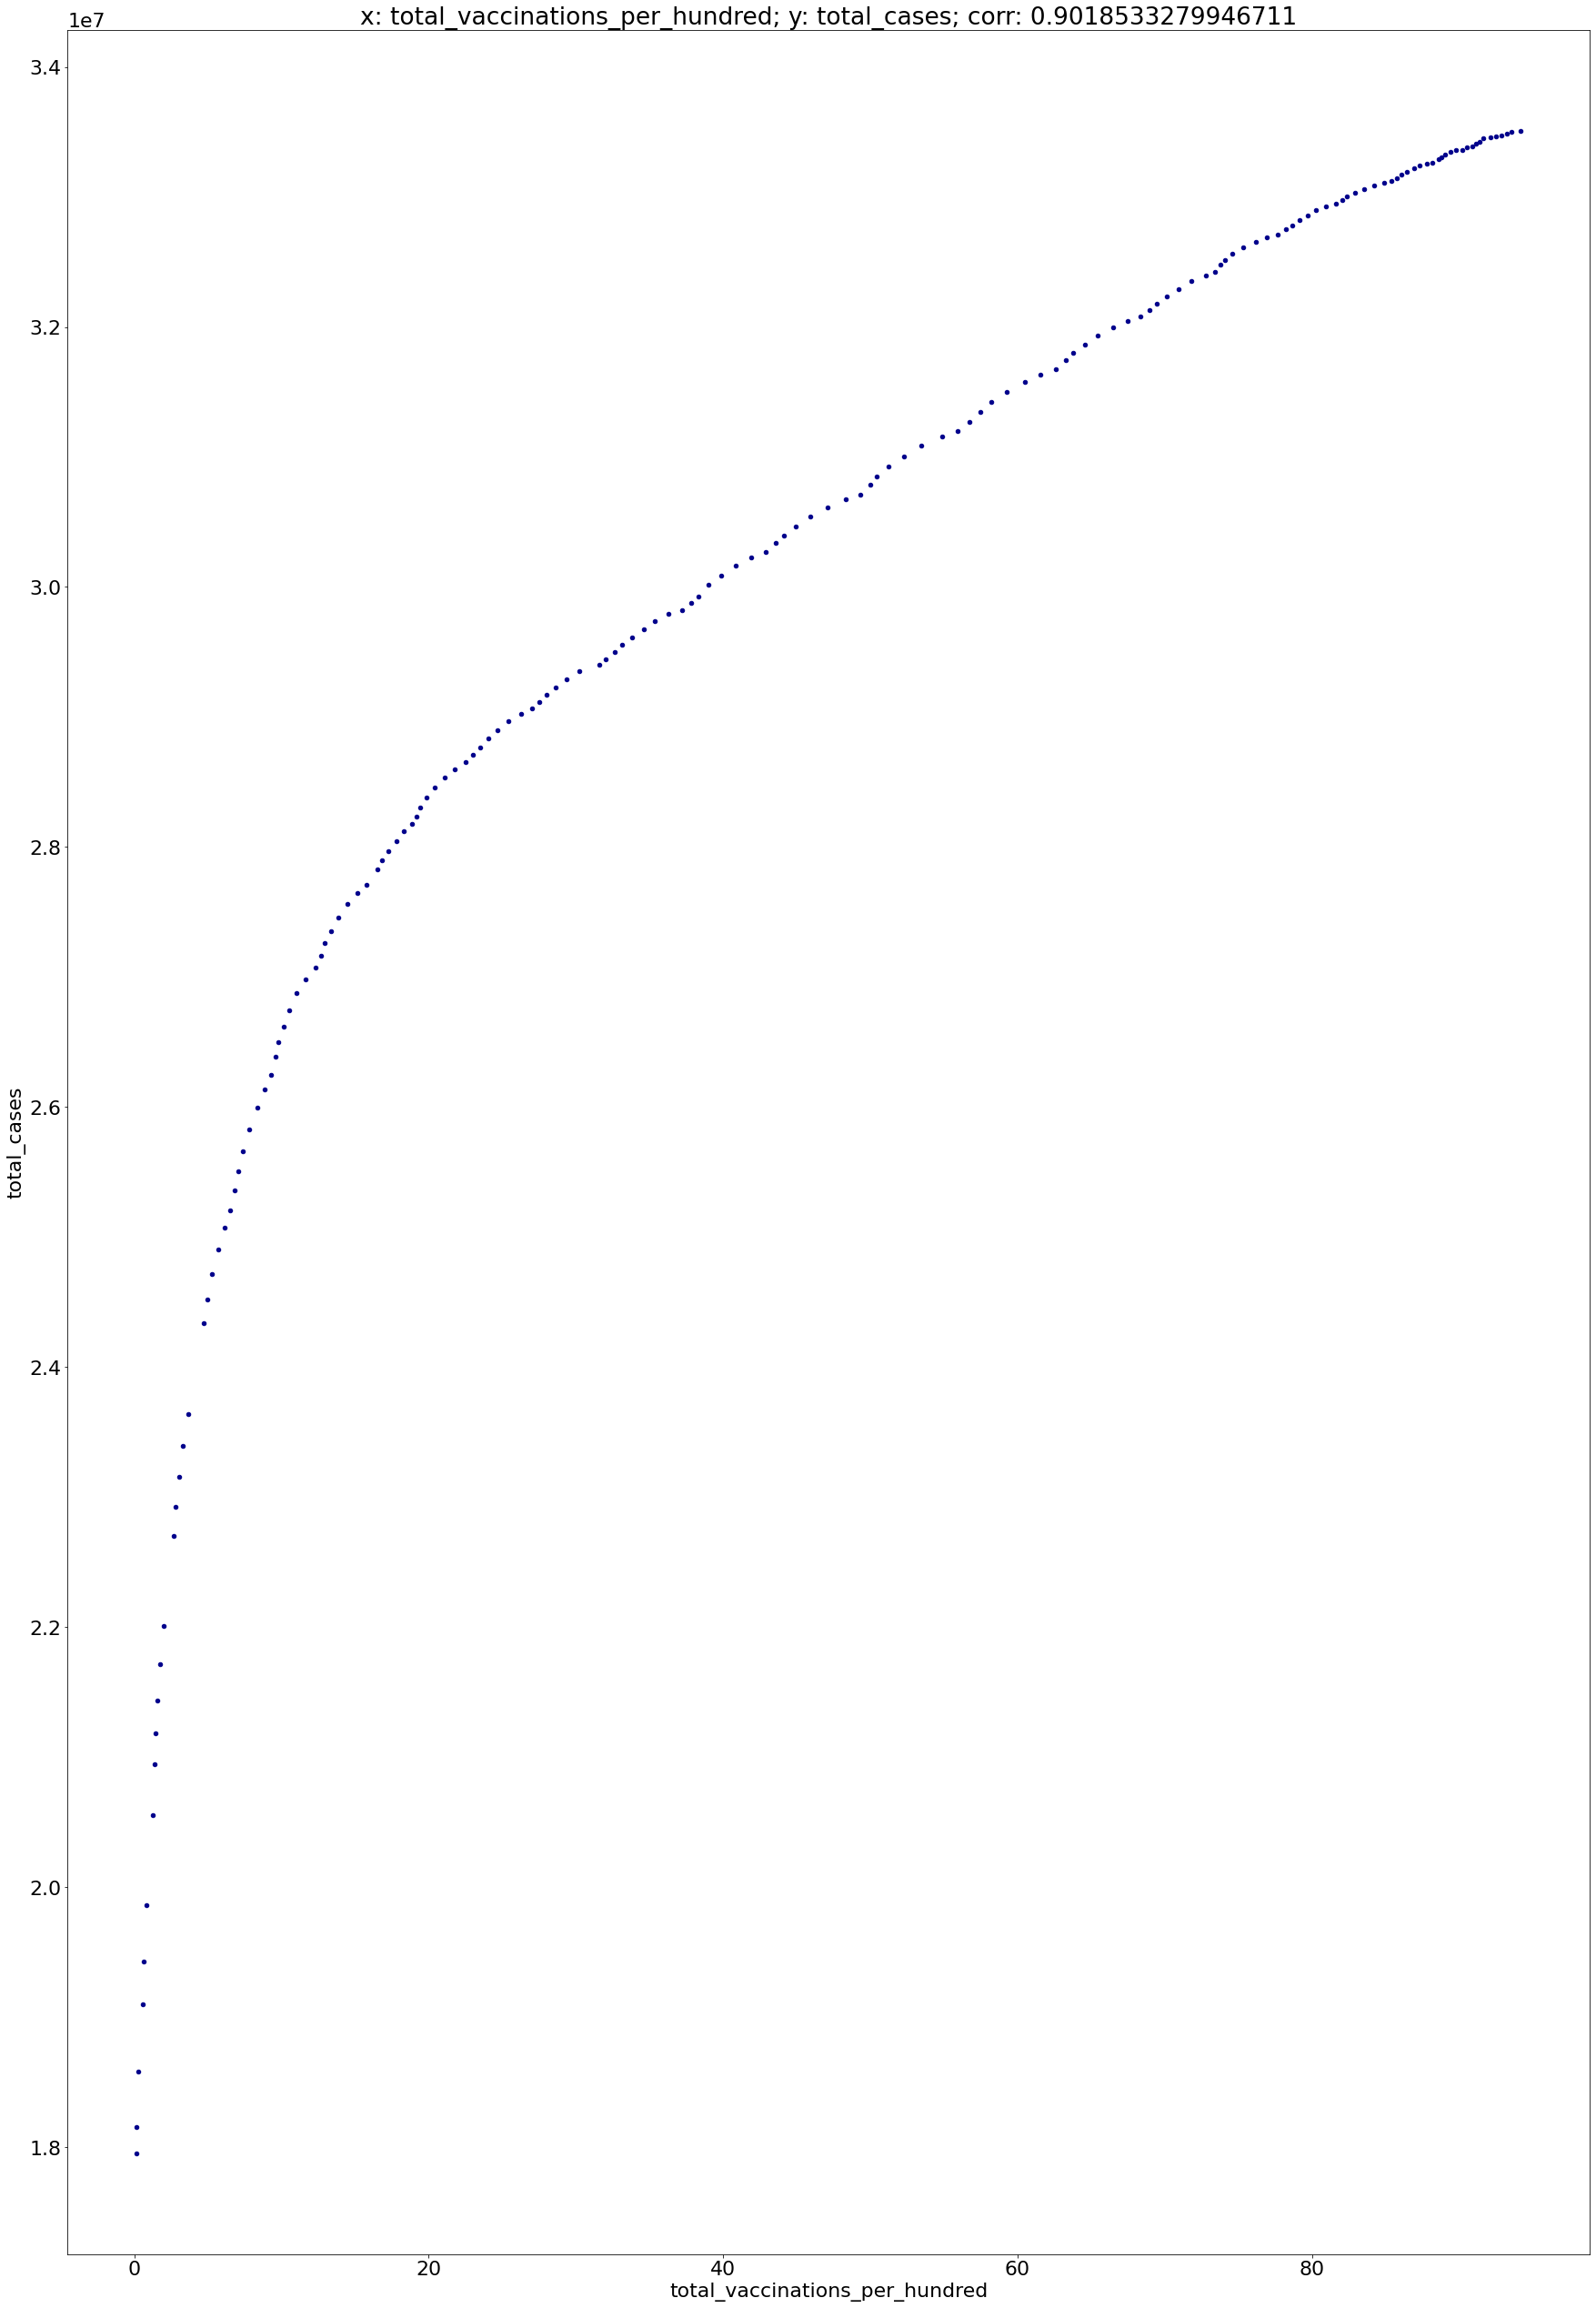

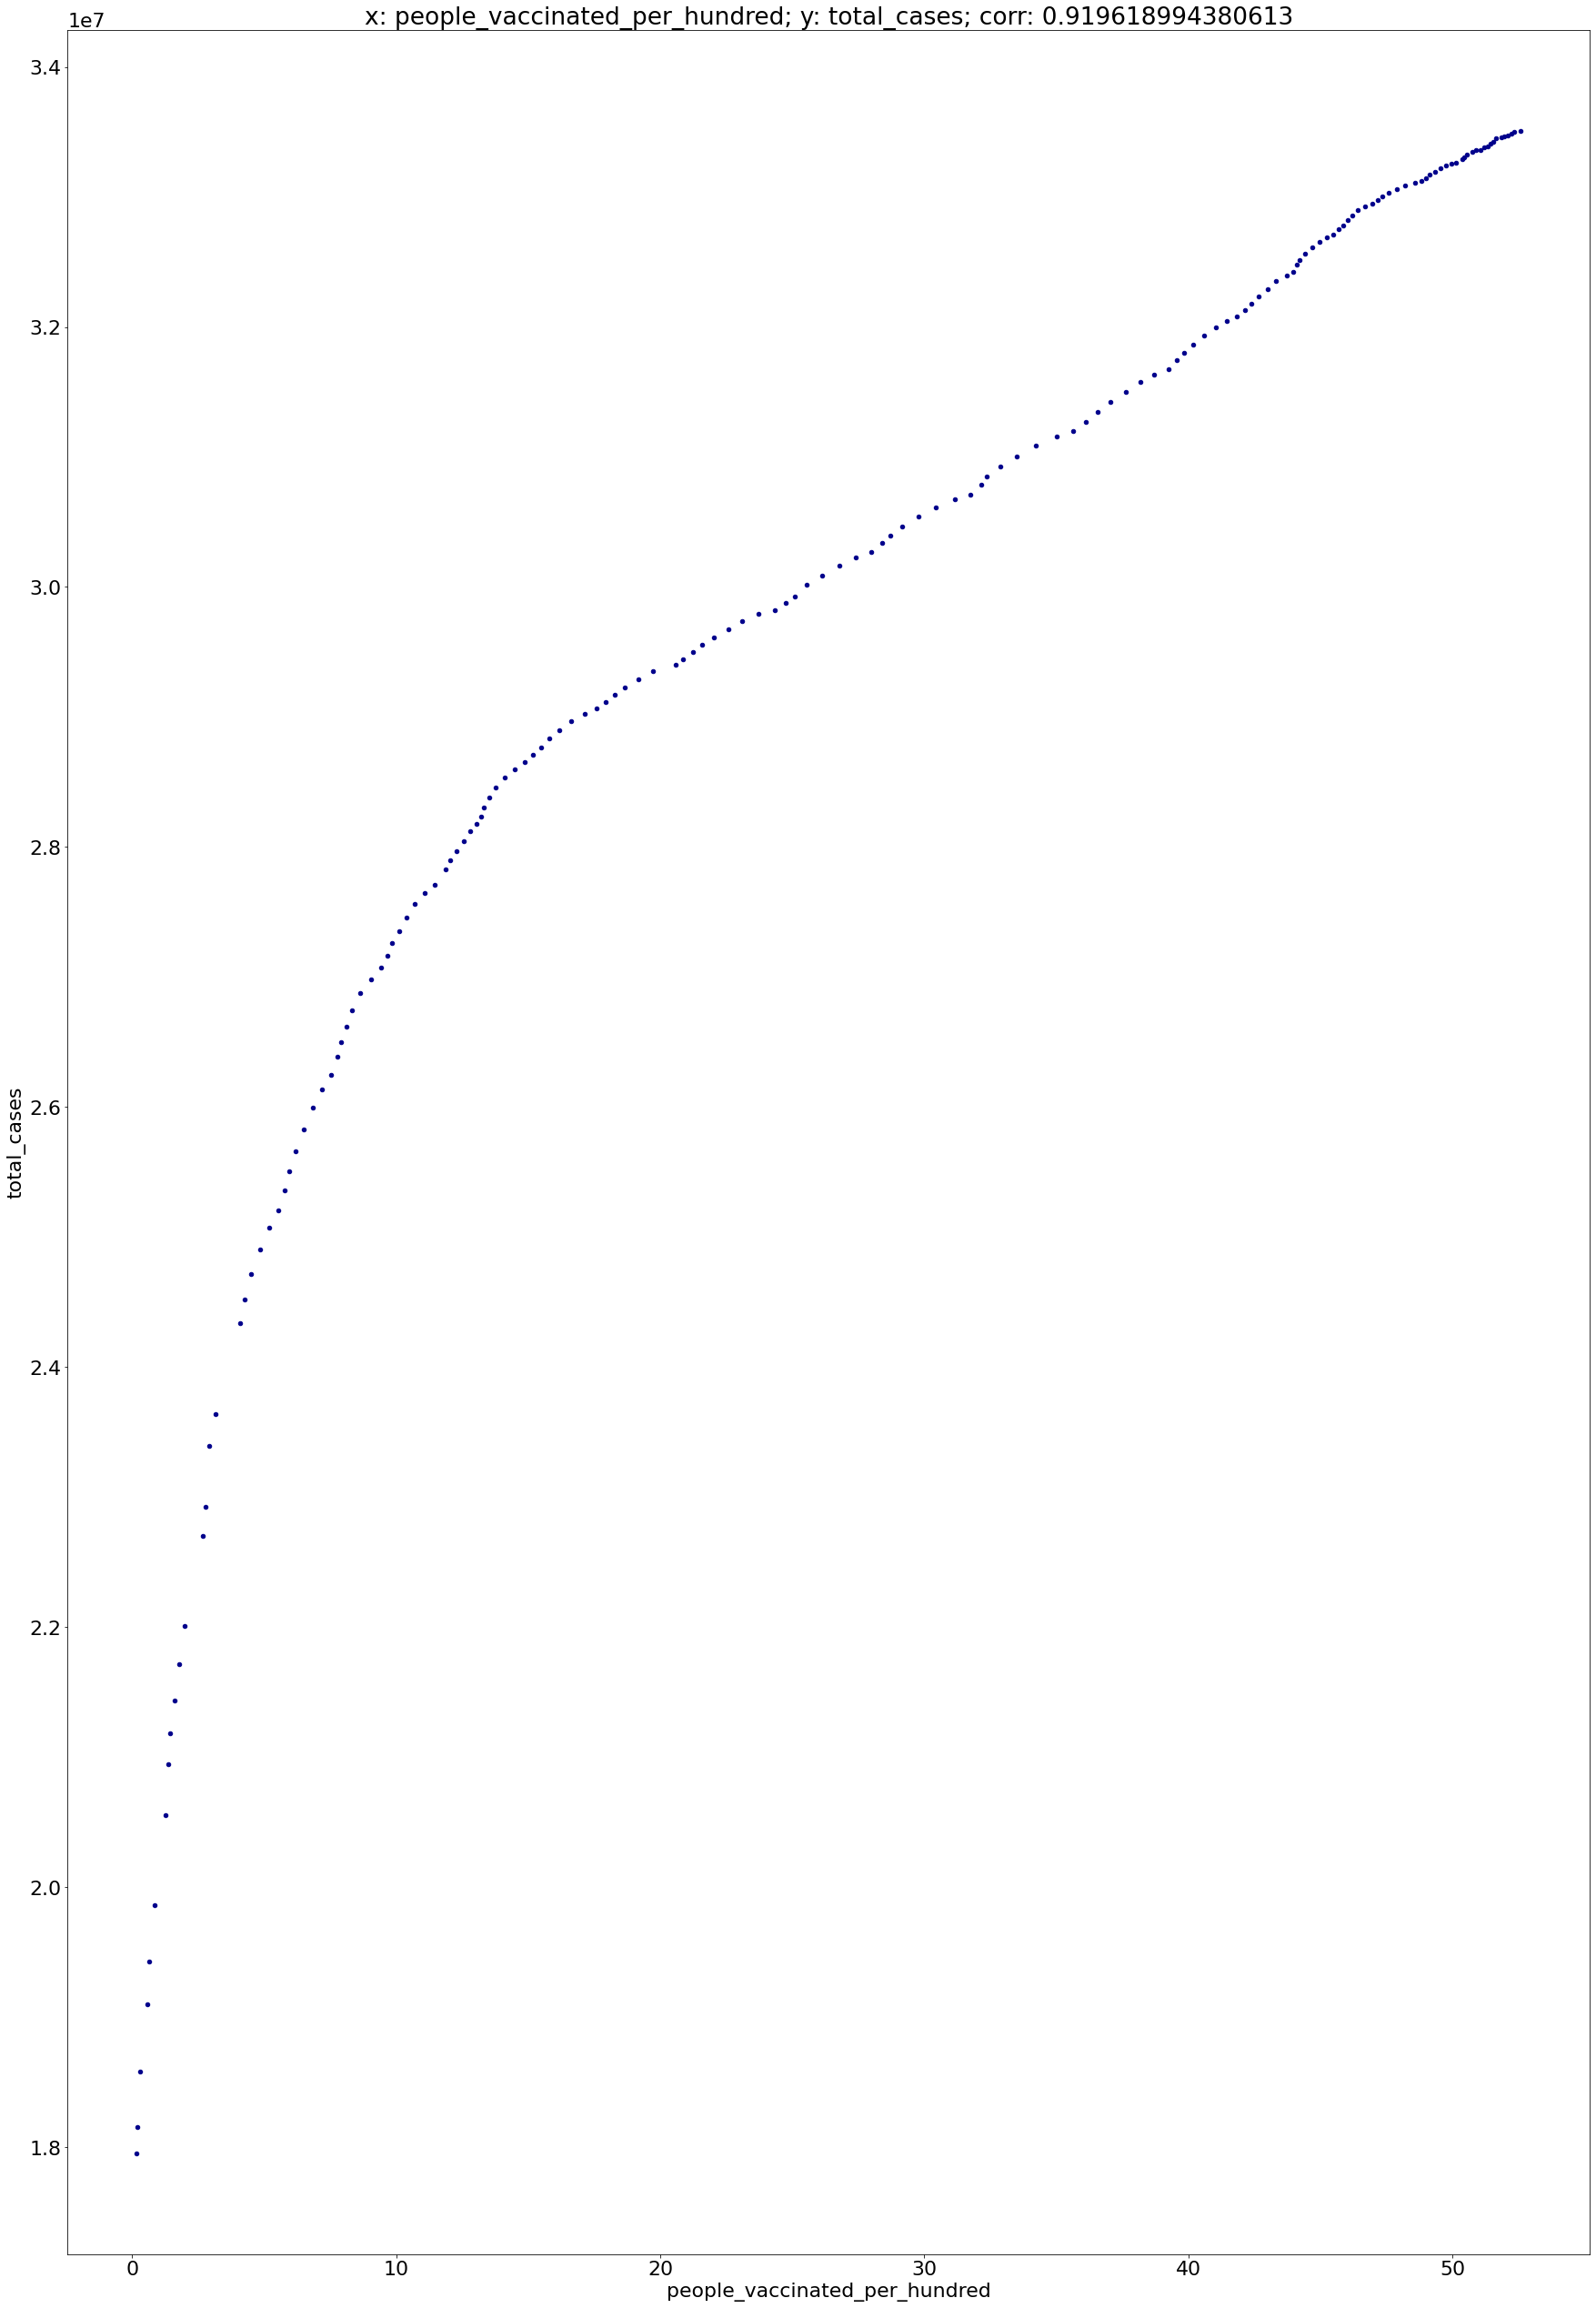

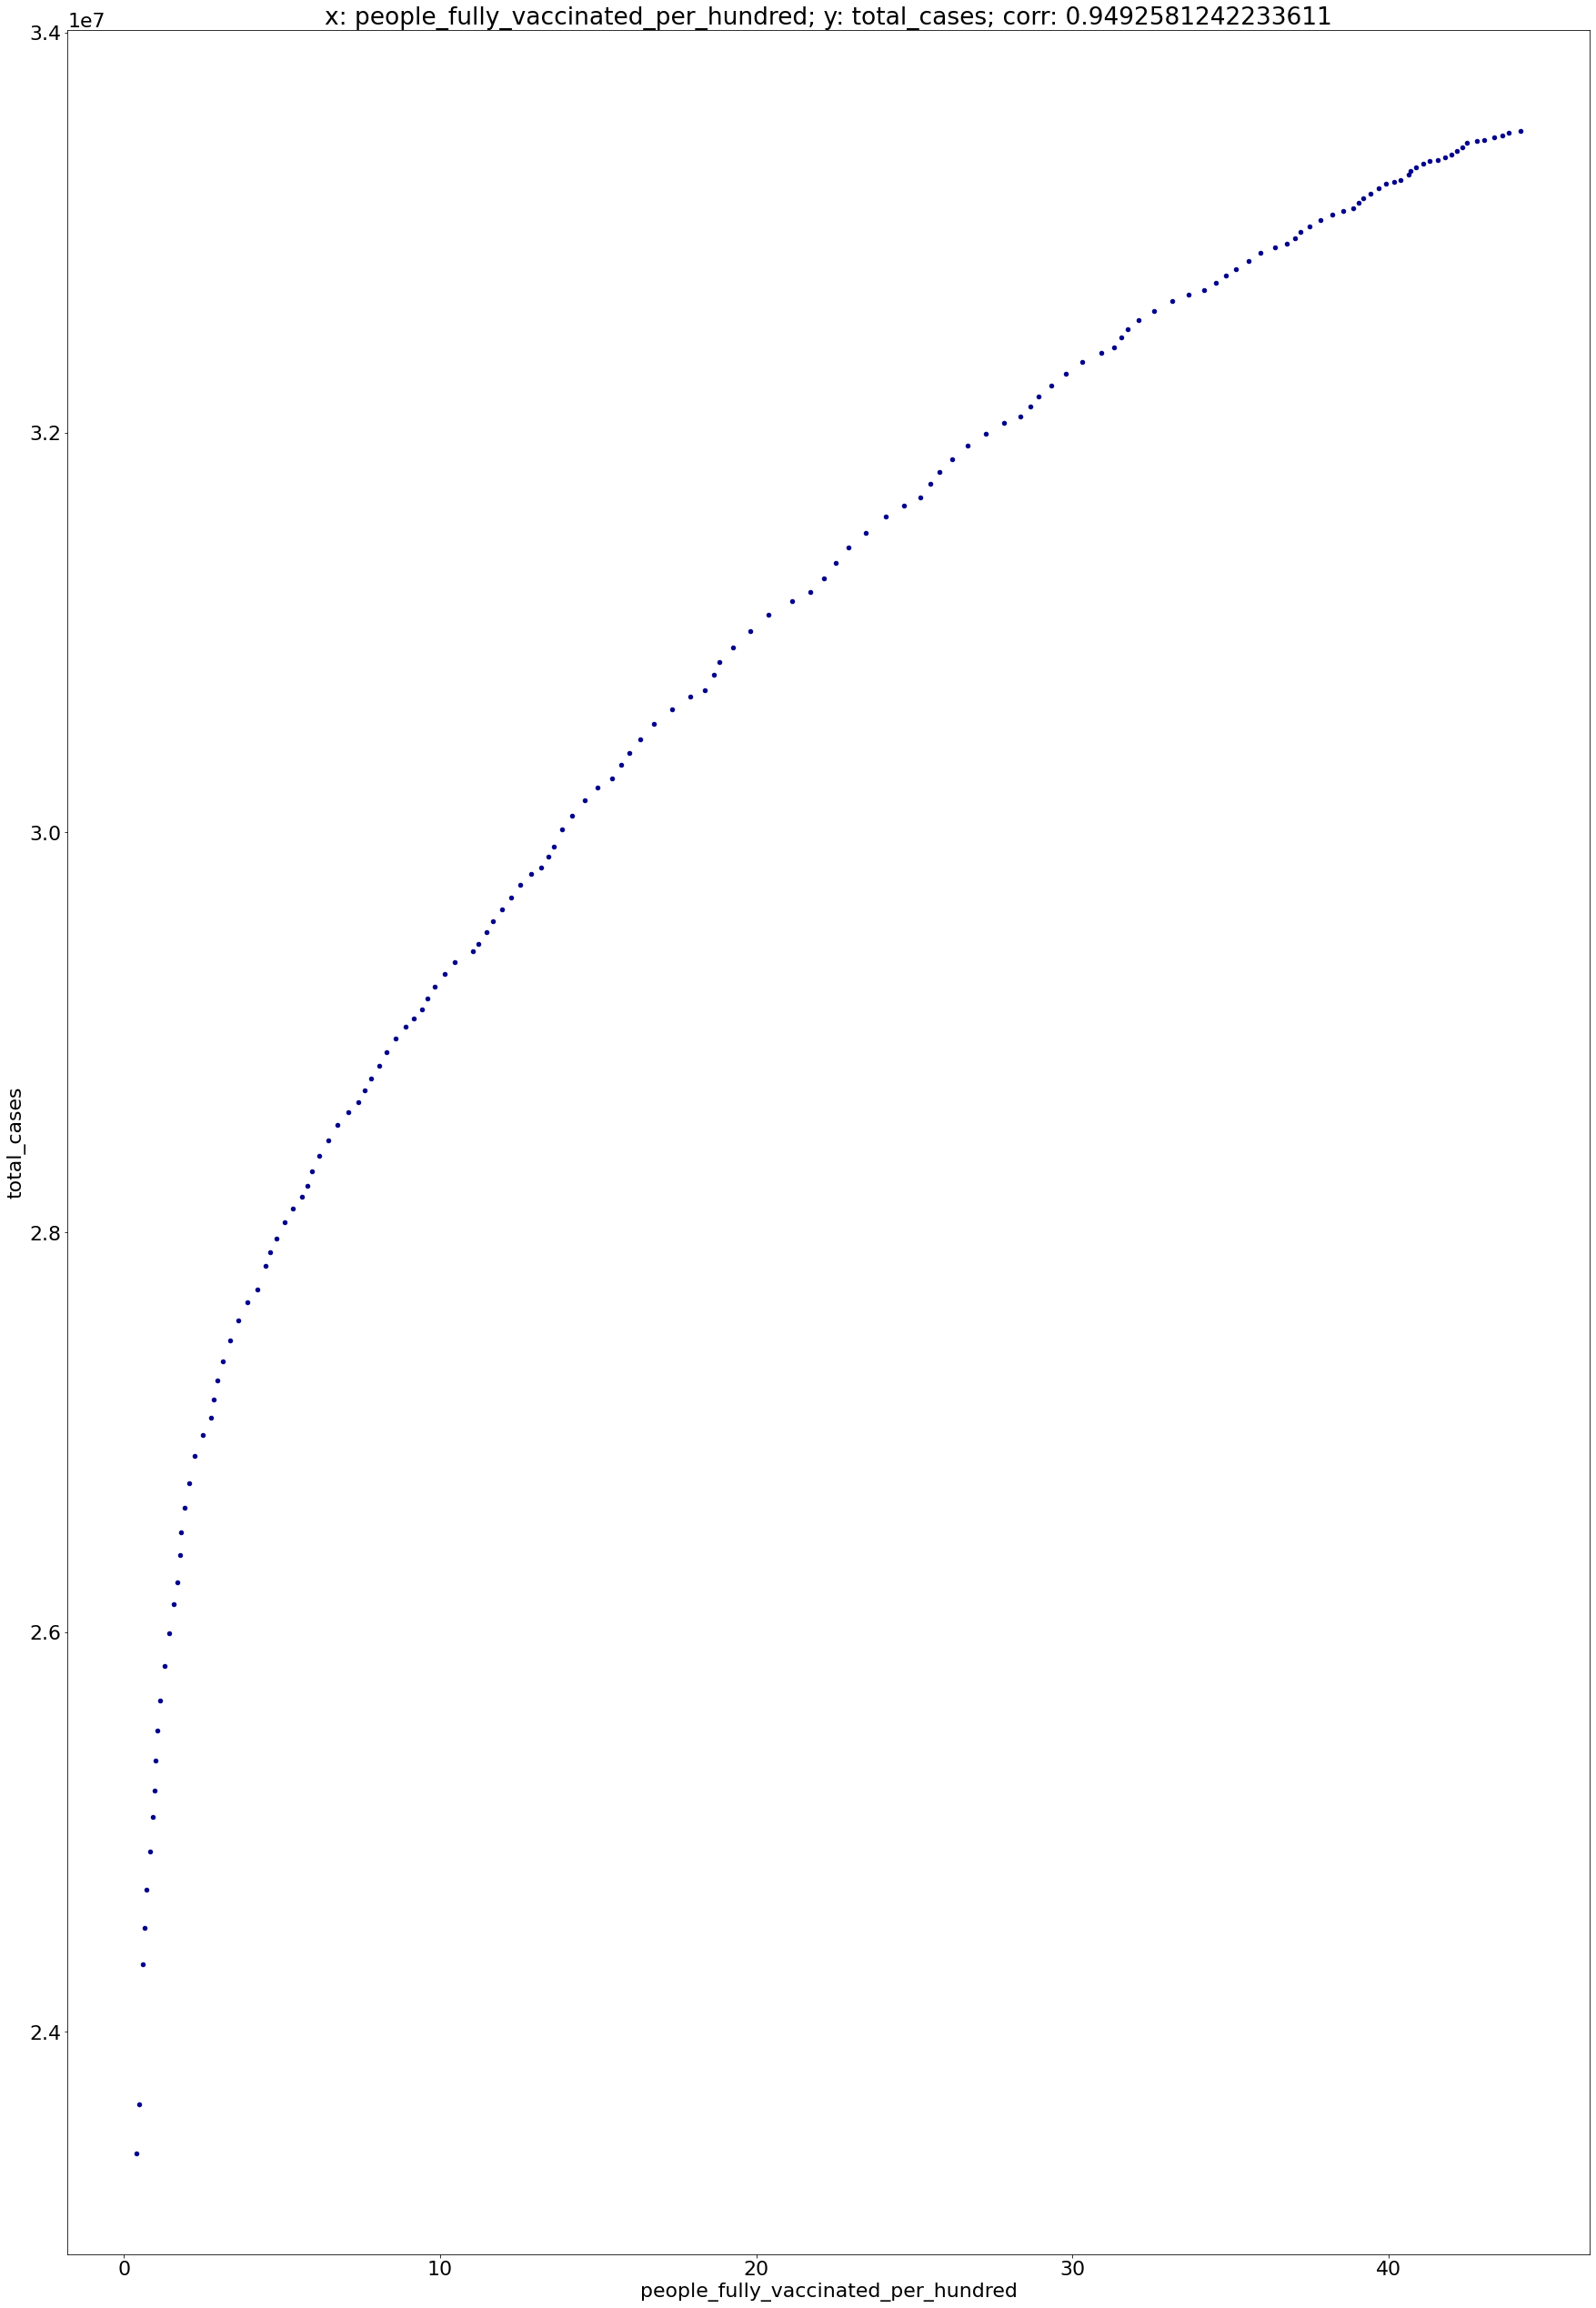

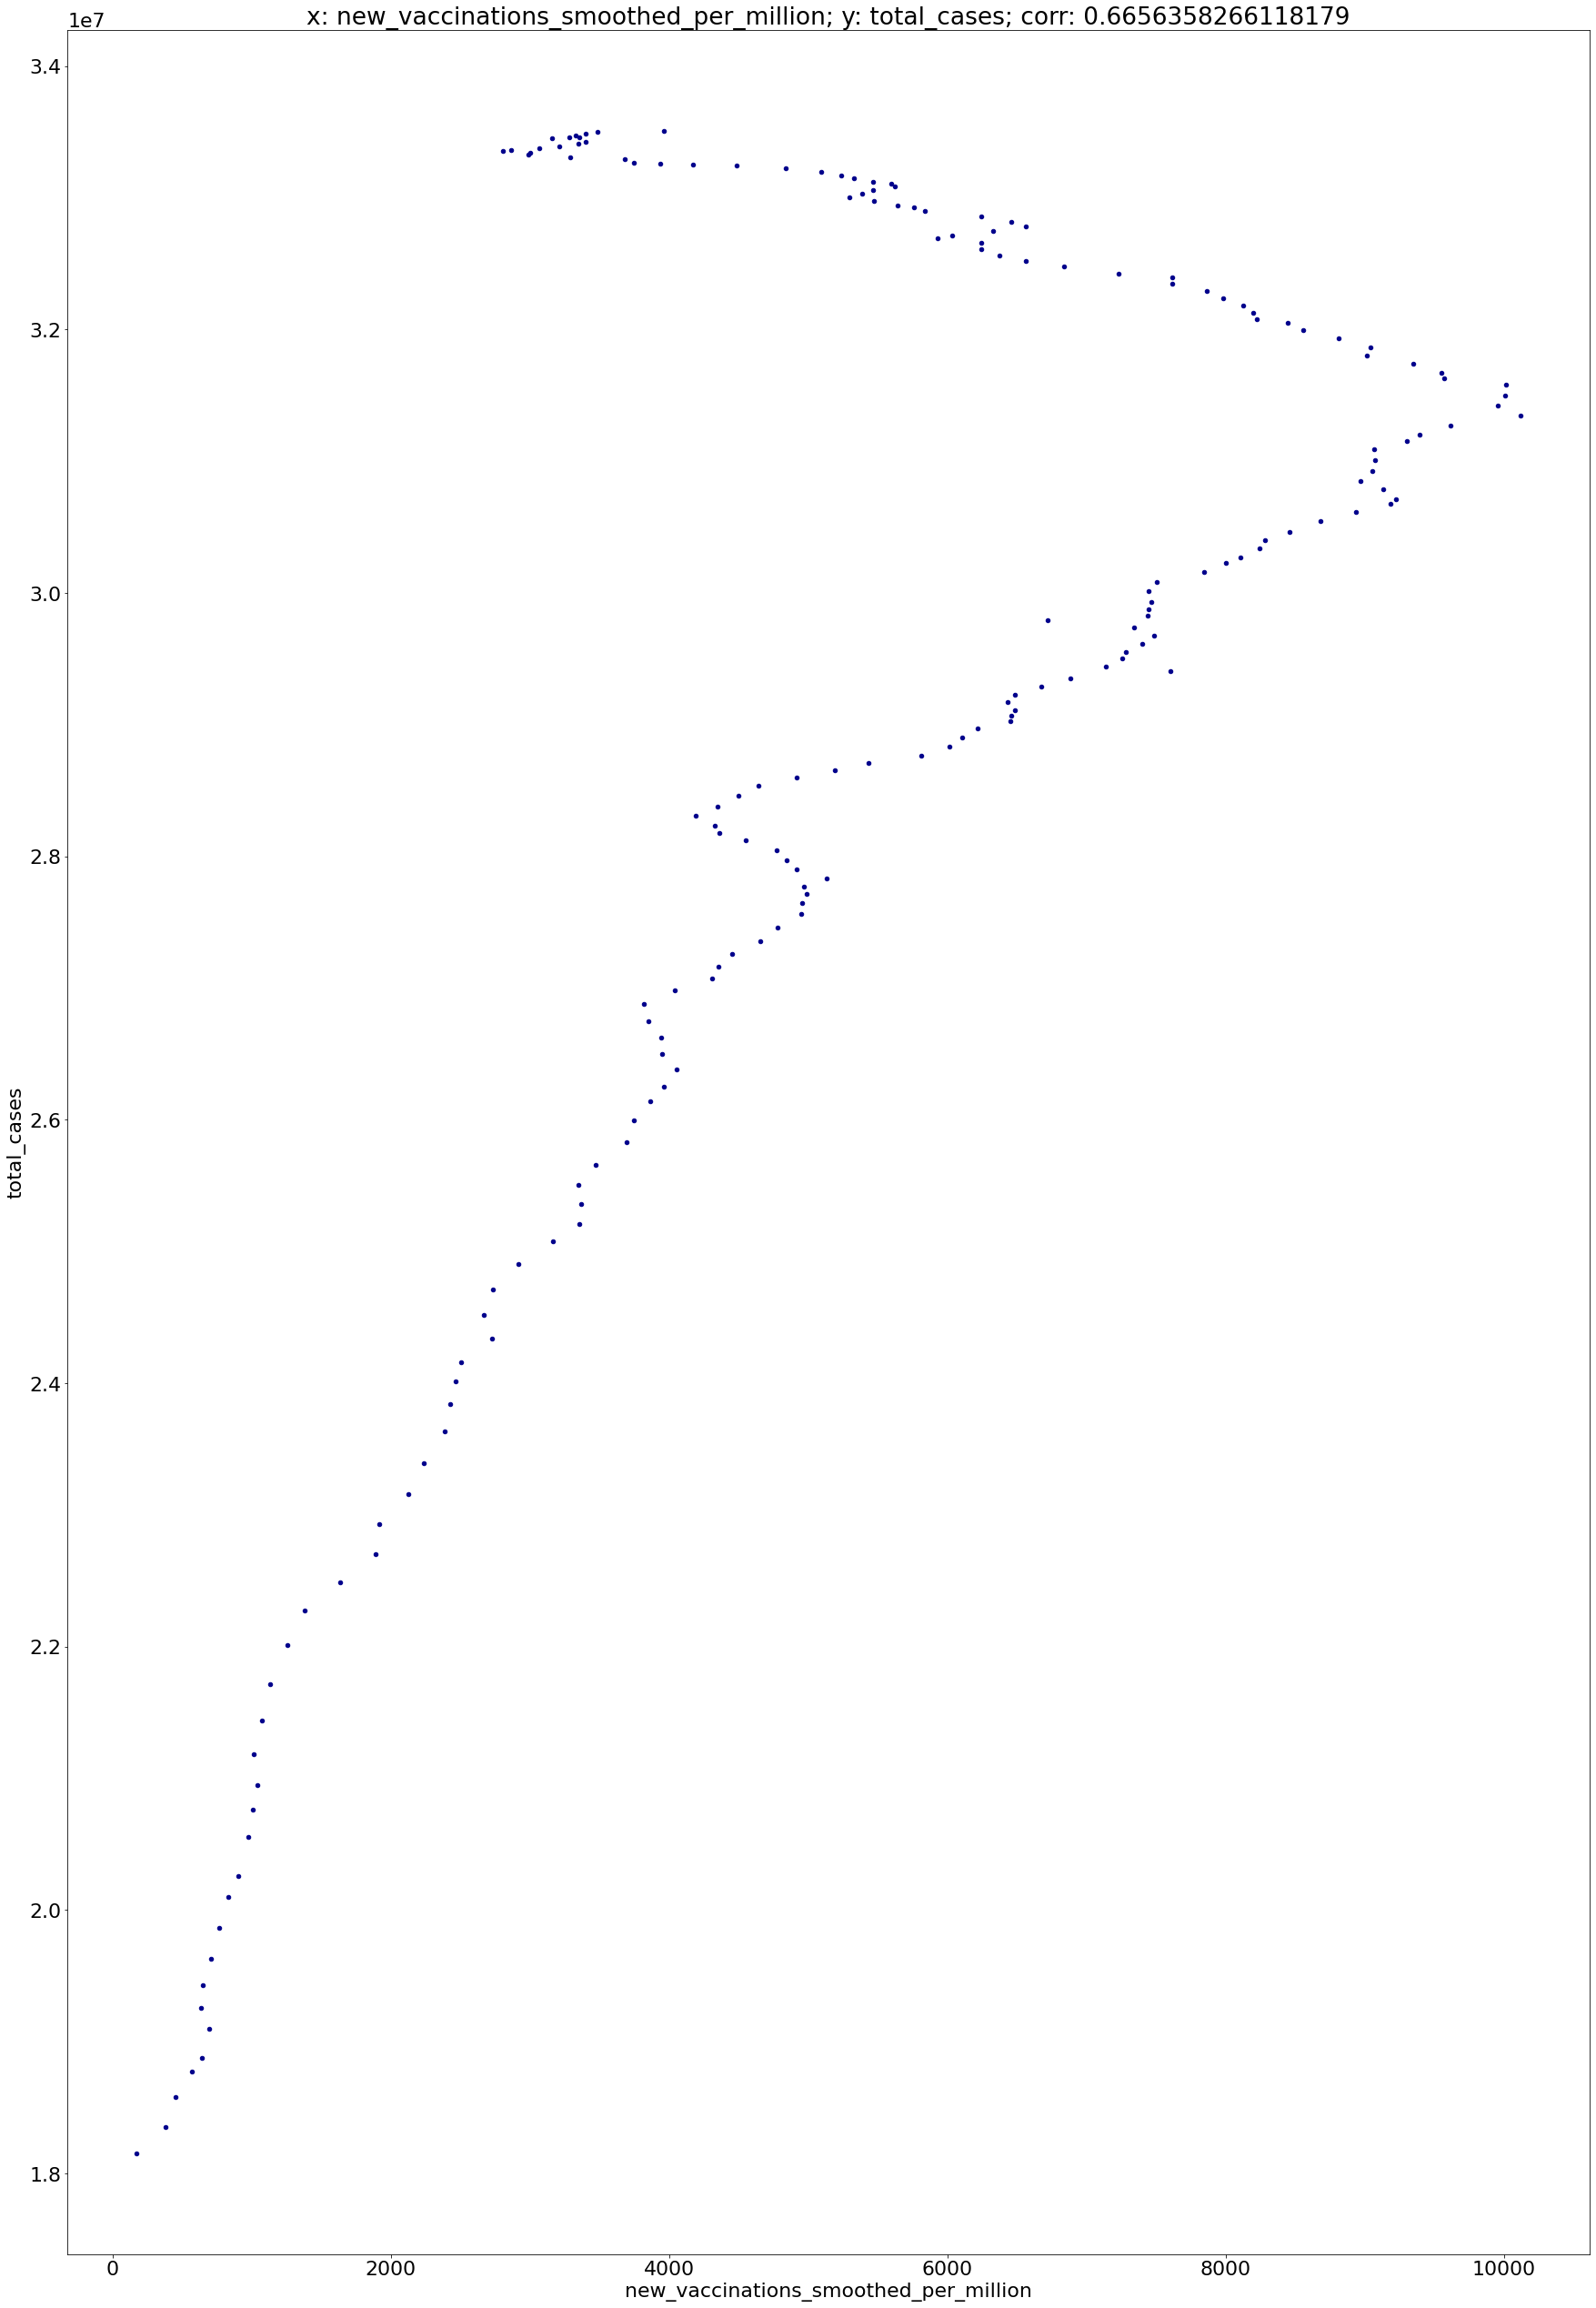

In [9]:
# Plotting scatter plots: vaccination variables against total_cases
plt.figure()
dep = 'total_cases'
ind = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million']
for i, j in enumerate(ind):
    correlation = df_us[j].corr(df_us[dep])
    ax = df_us.plot.scatter(x=j, y=dep, c='DarkBlue', title="x: {x_name}; y: {y_name}; corr: {corr}".format(x_name = j, y_name = dep, corr = correlation), figsize=(30,45), fontsize=22)

<Figure size 432x288 with 0 Axes>

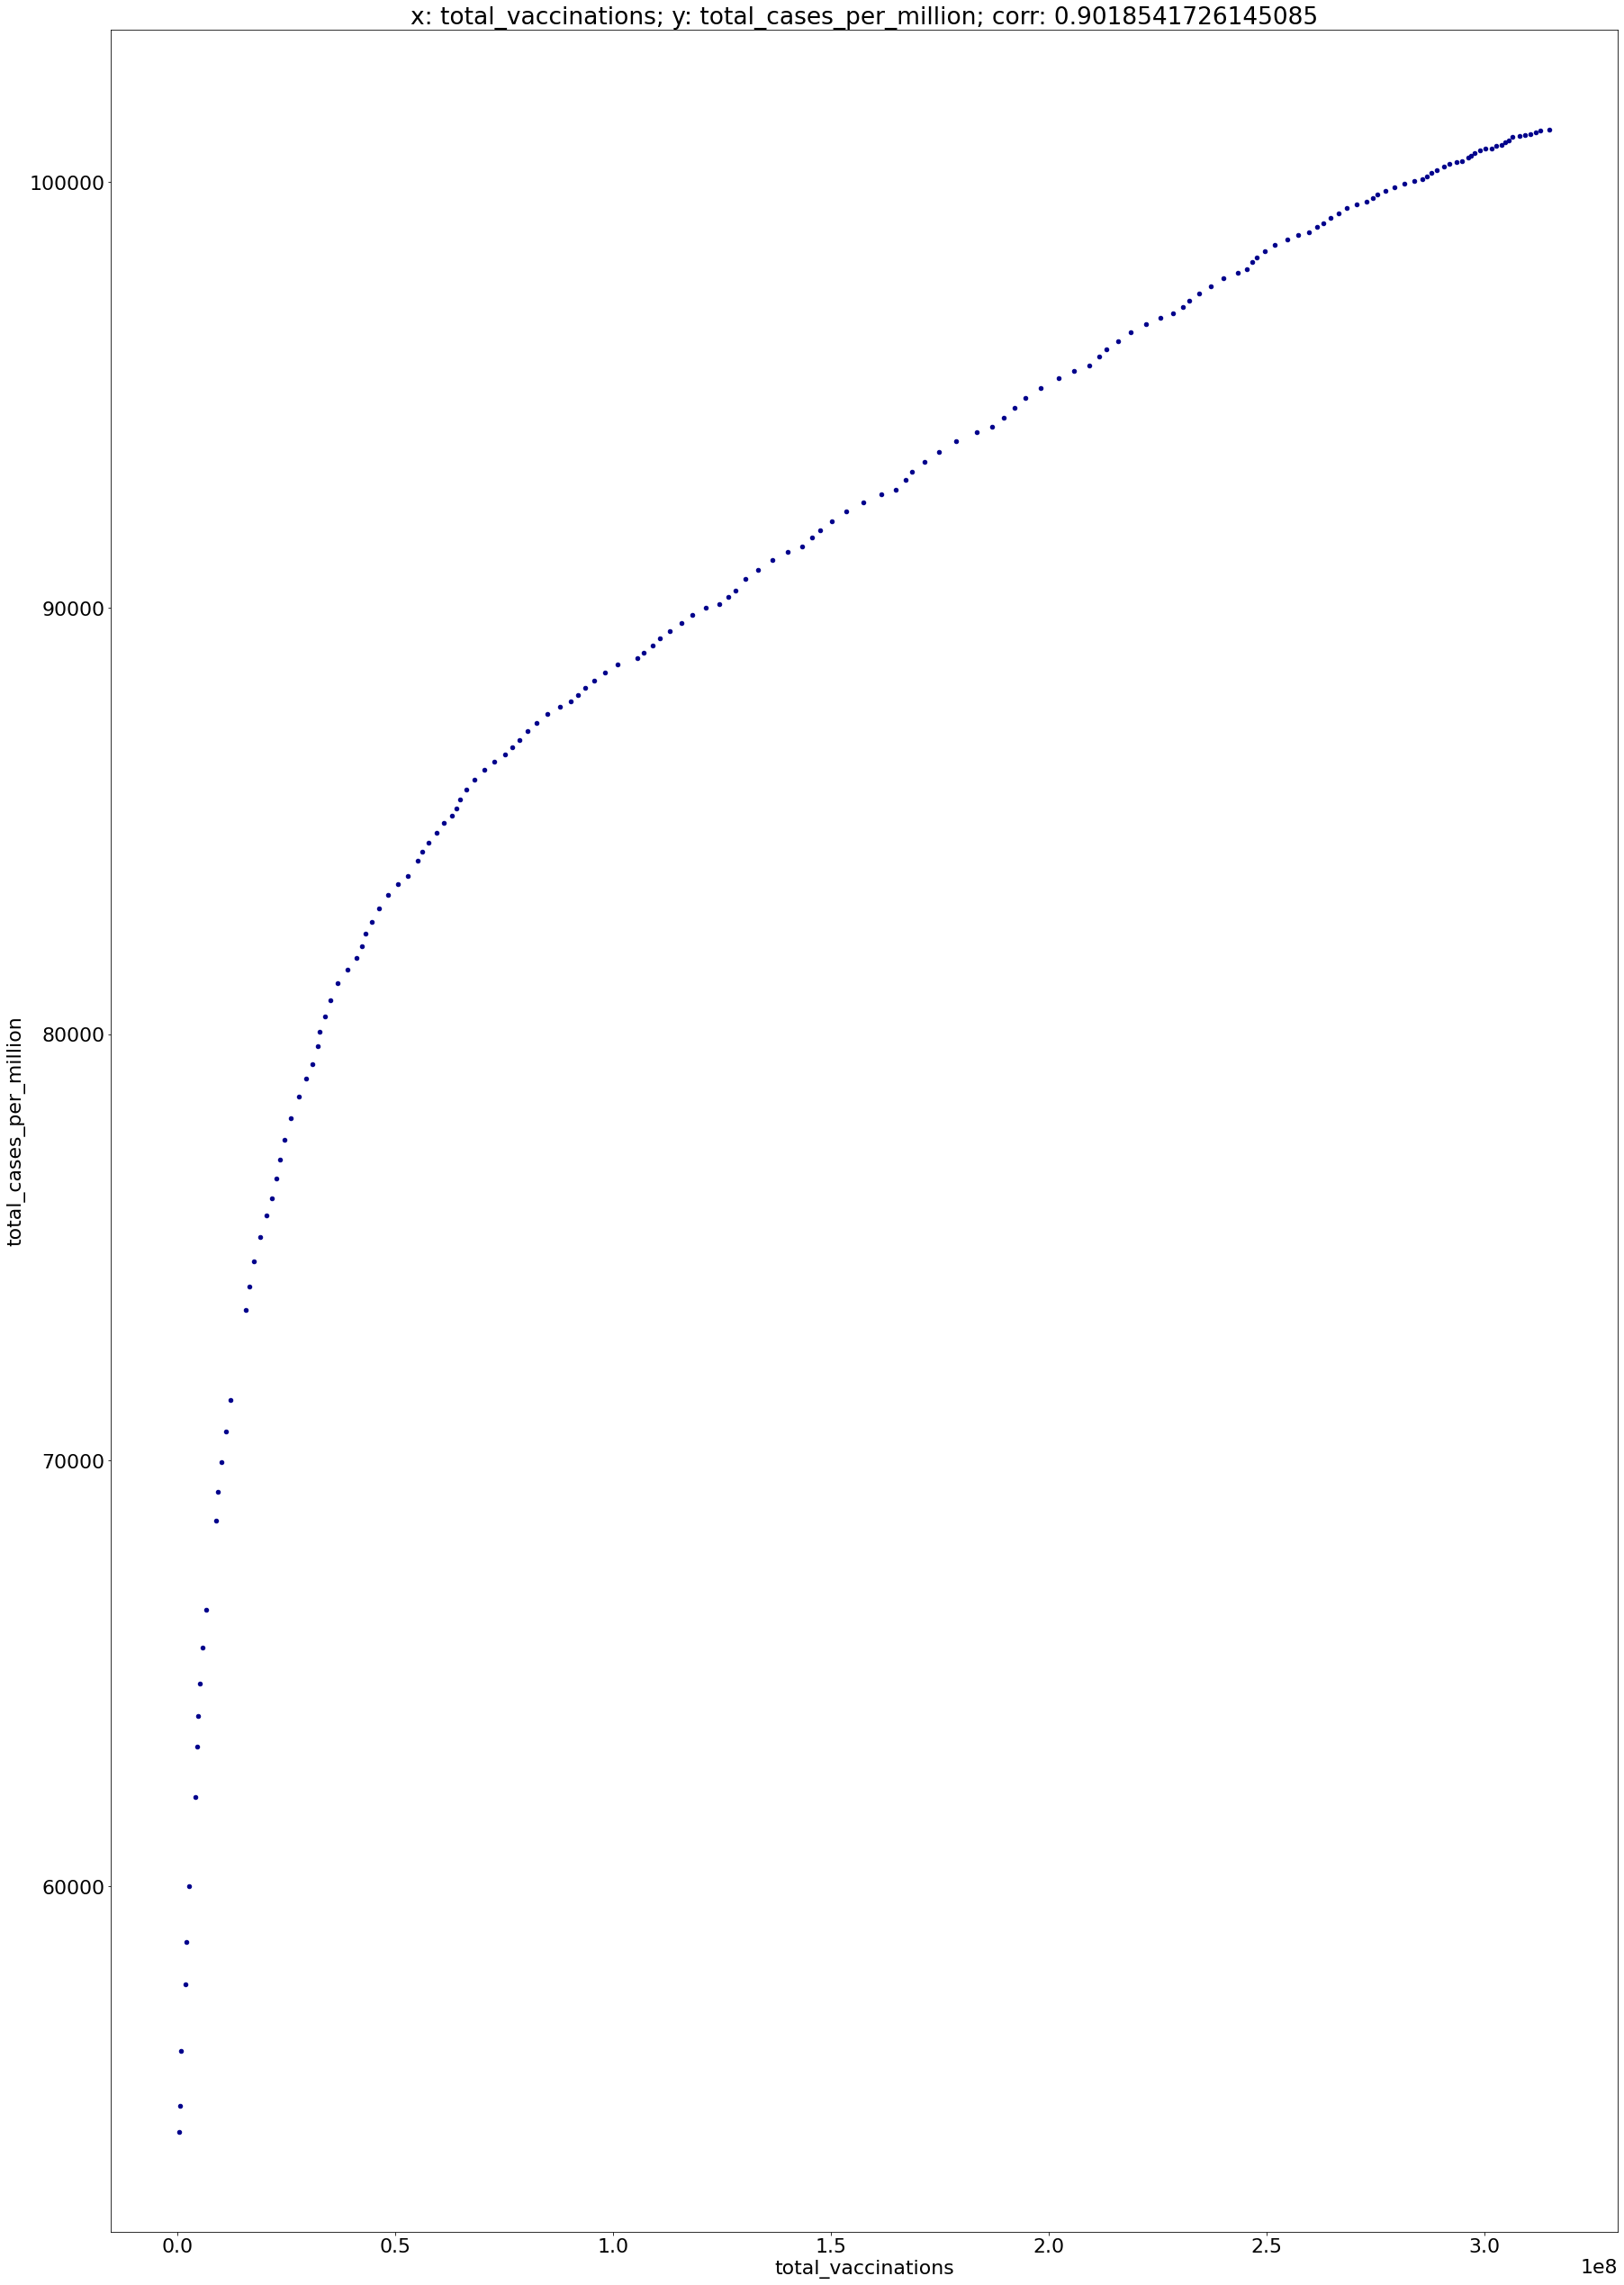

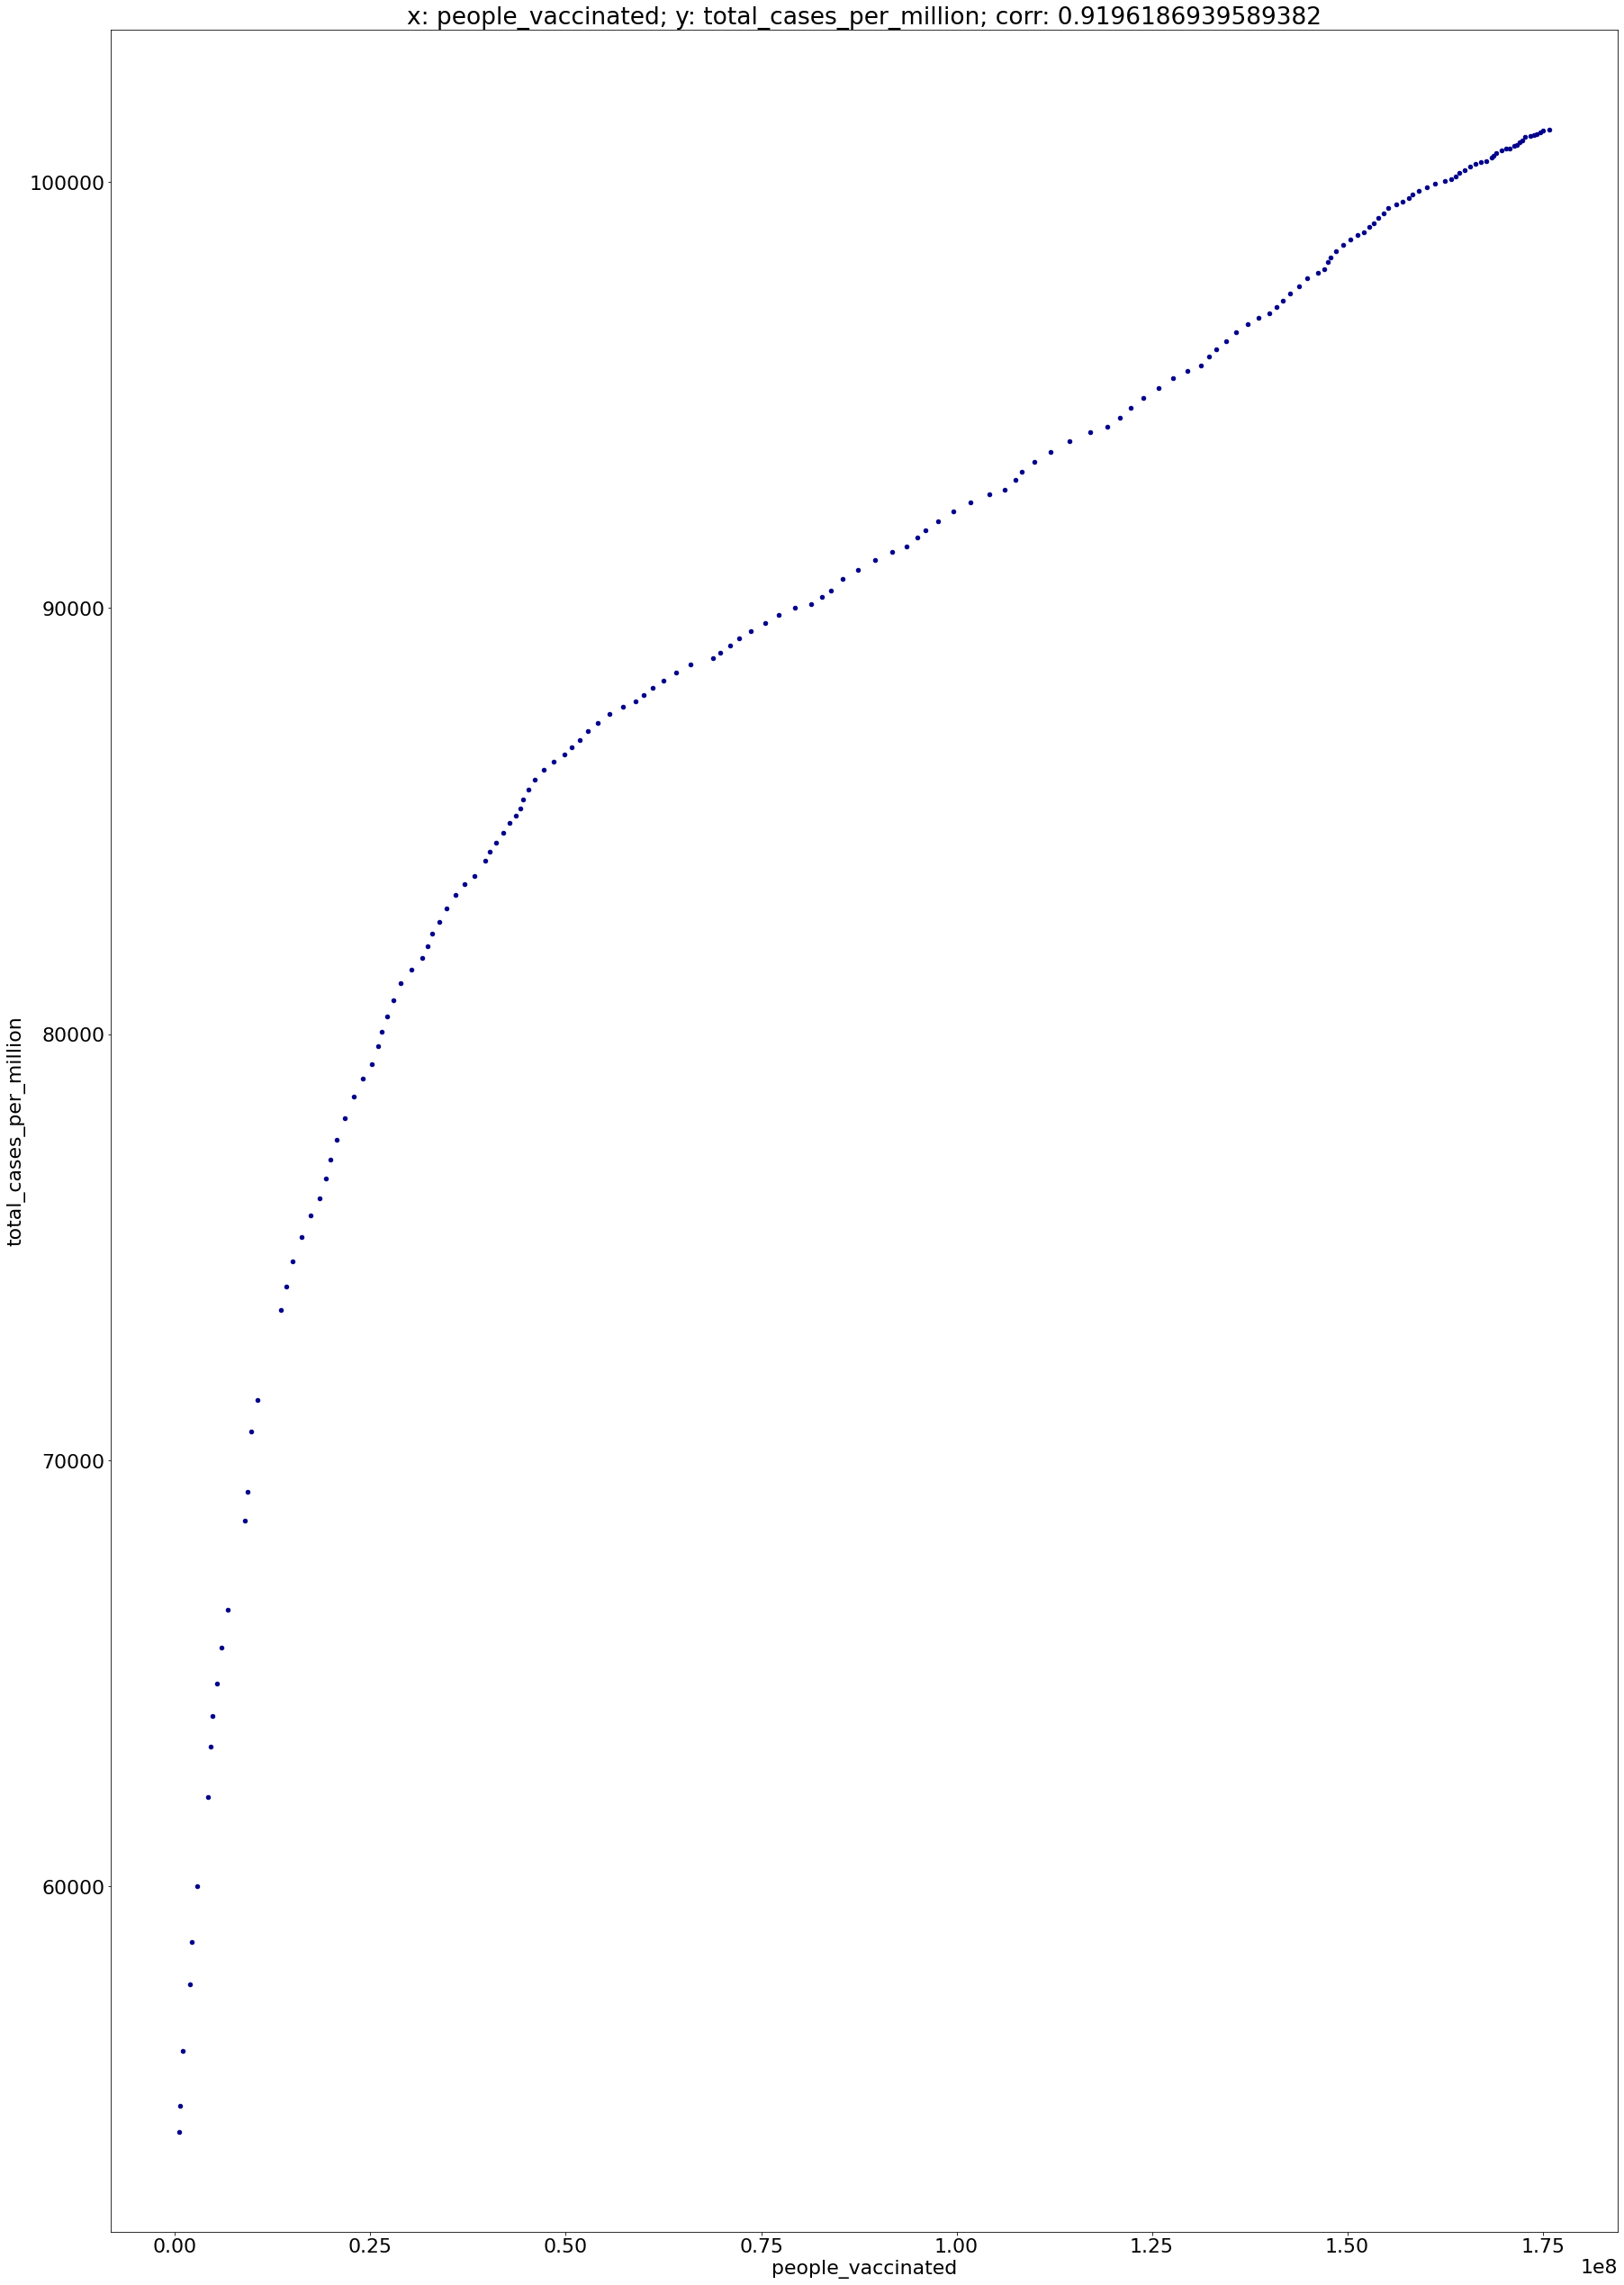

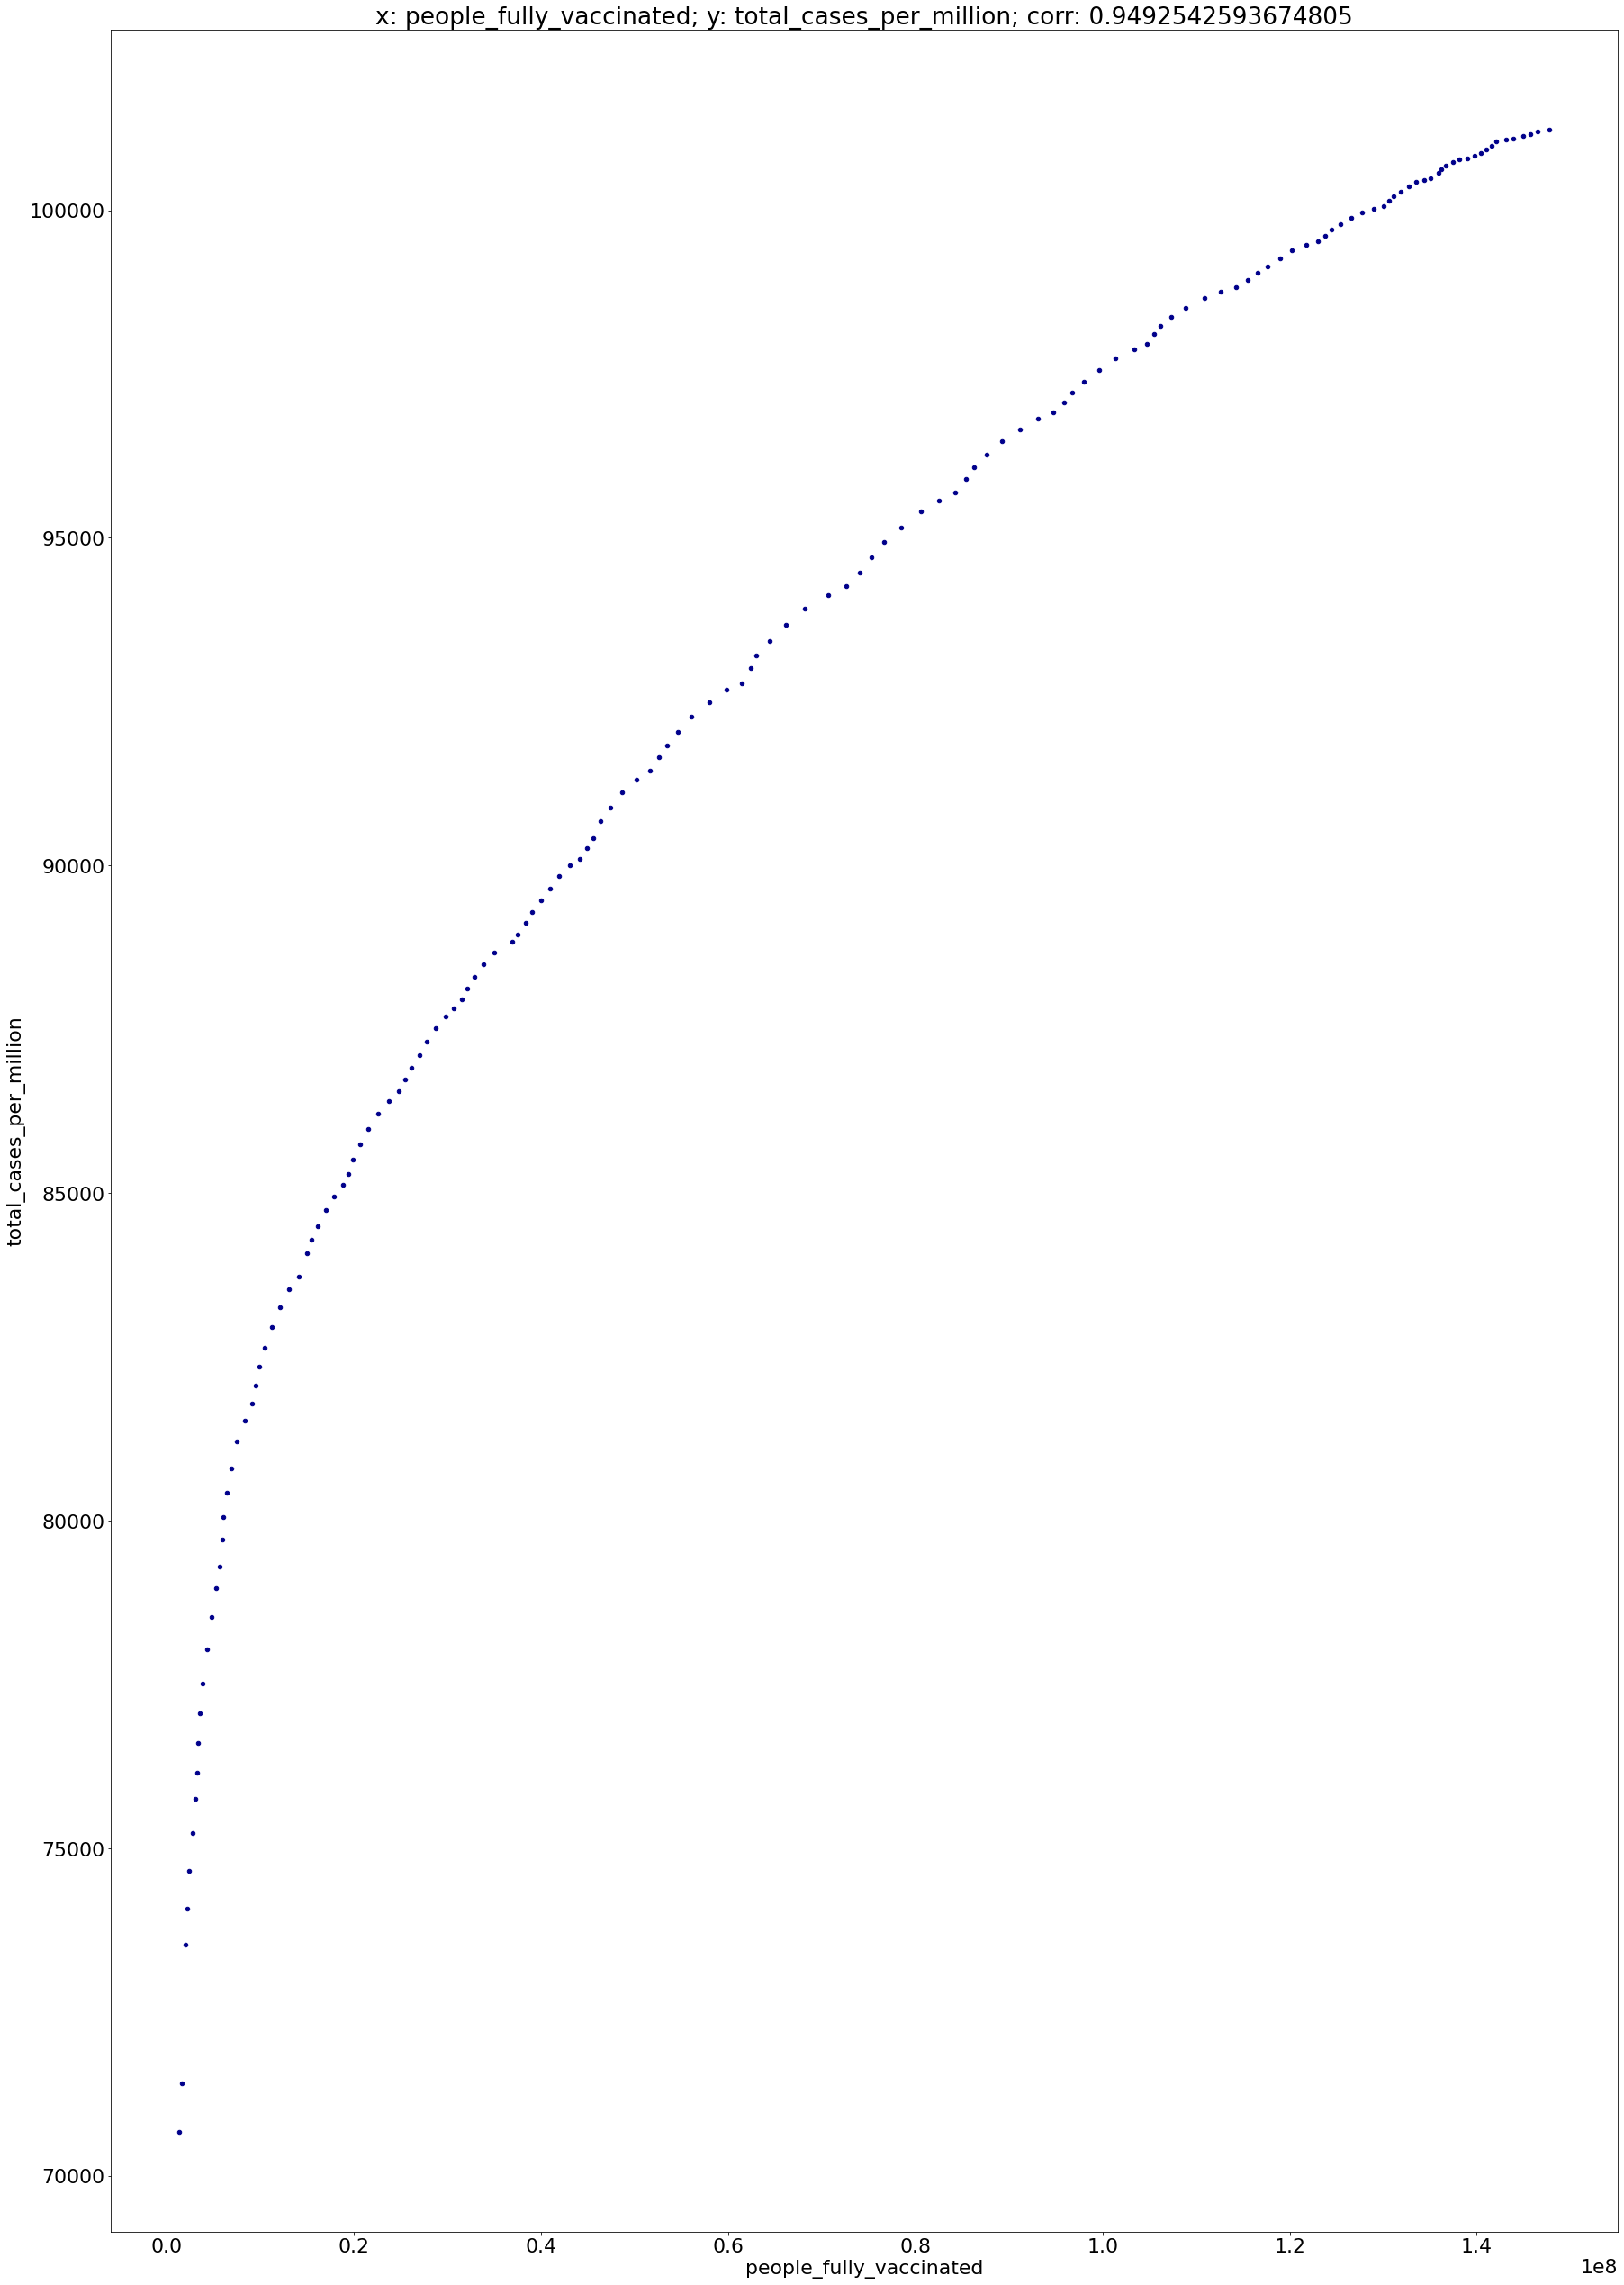

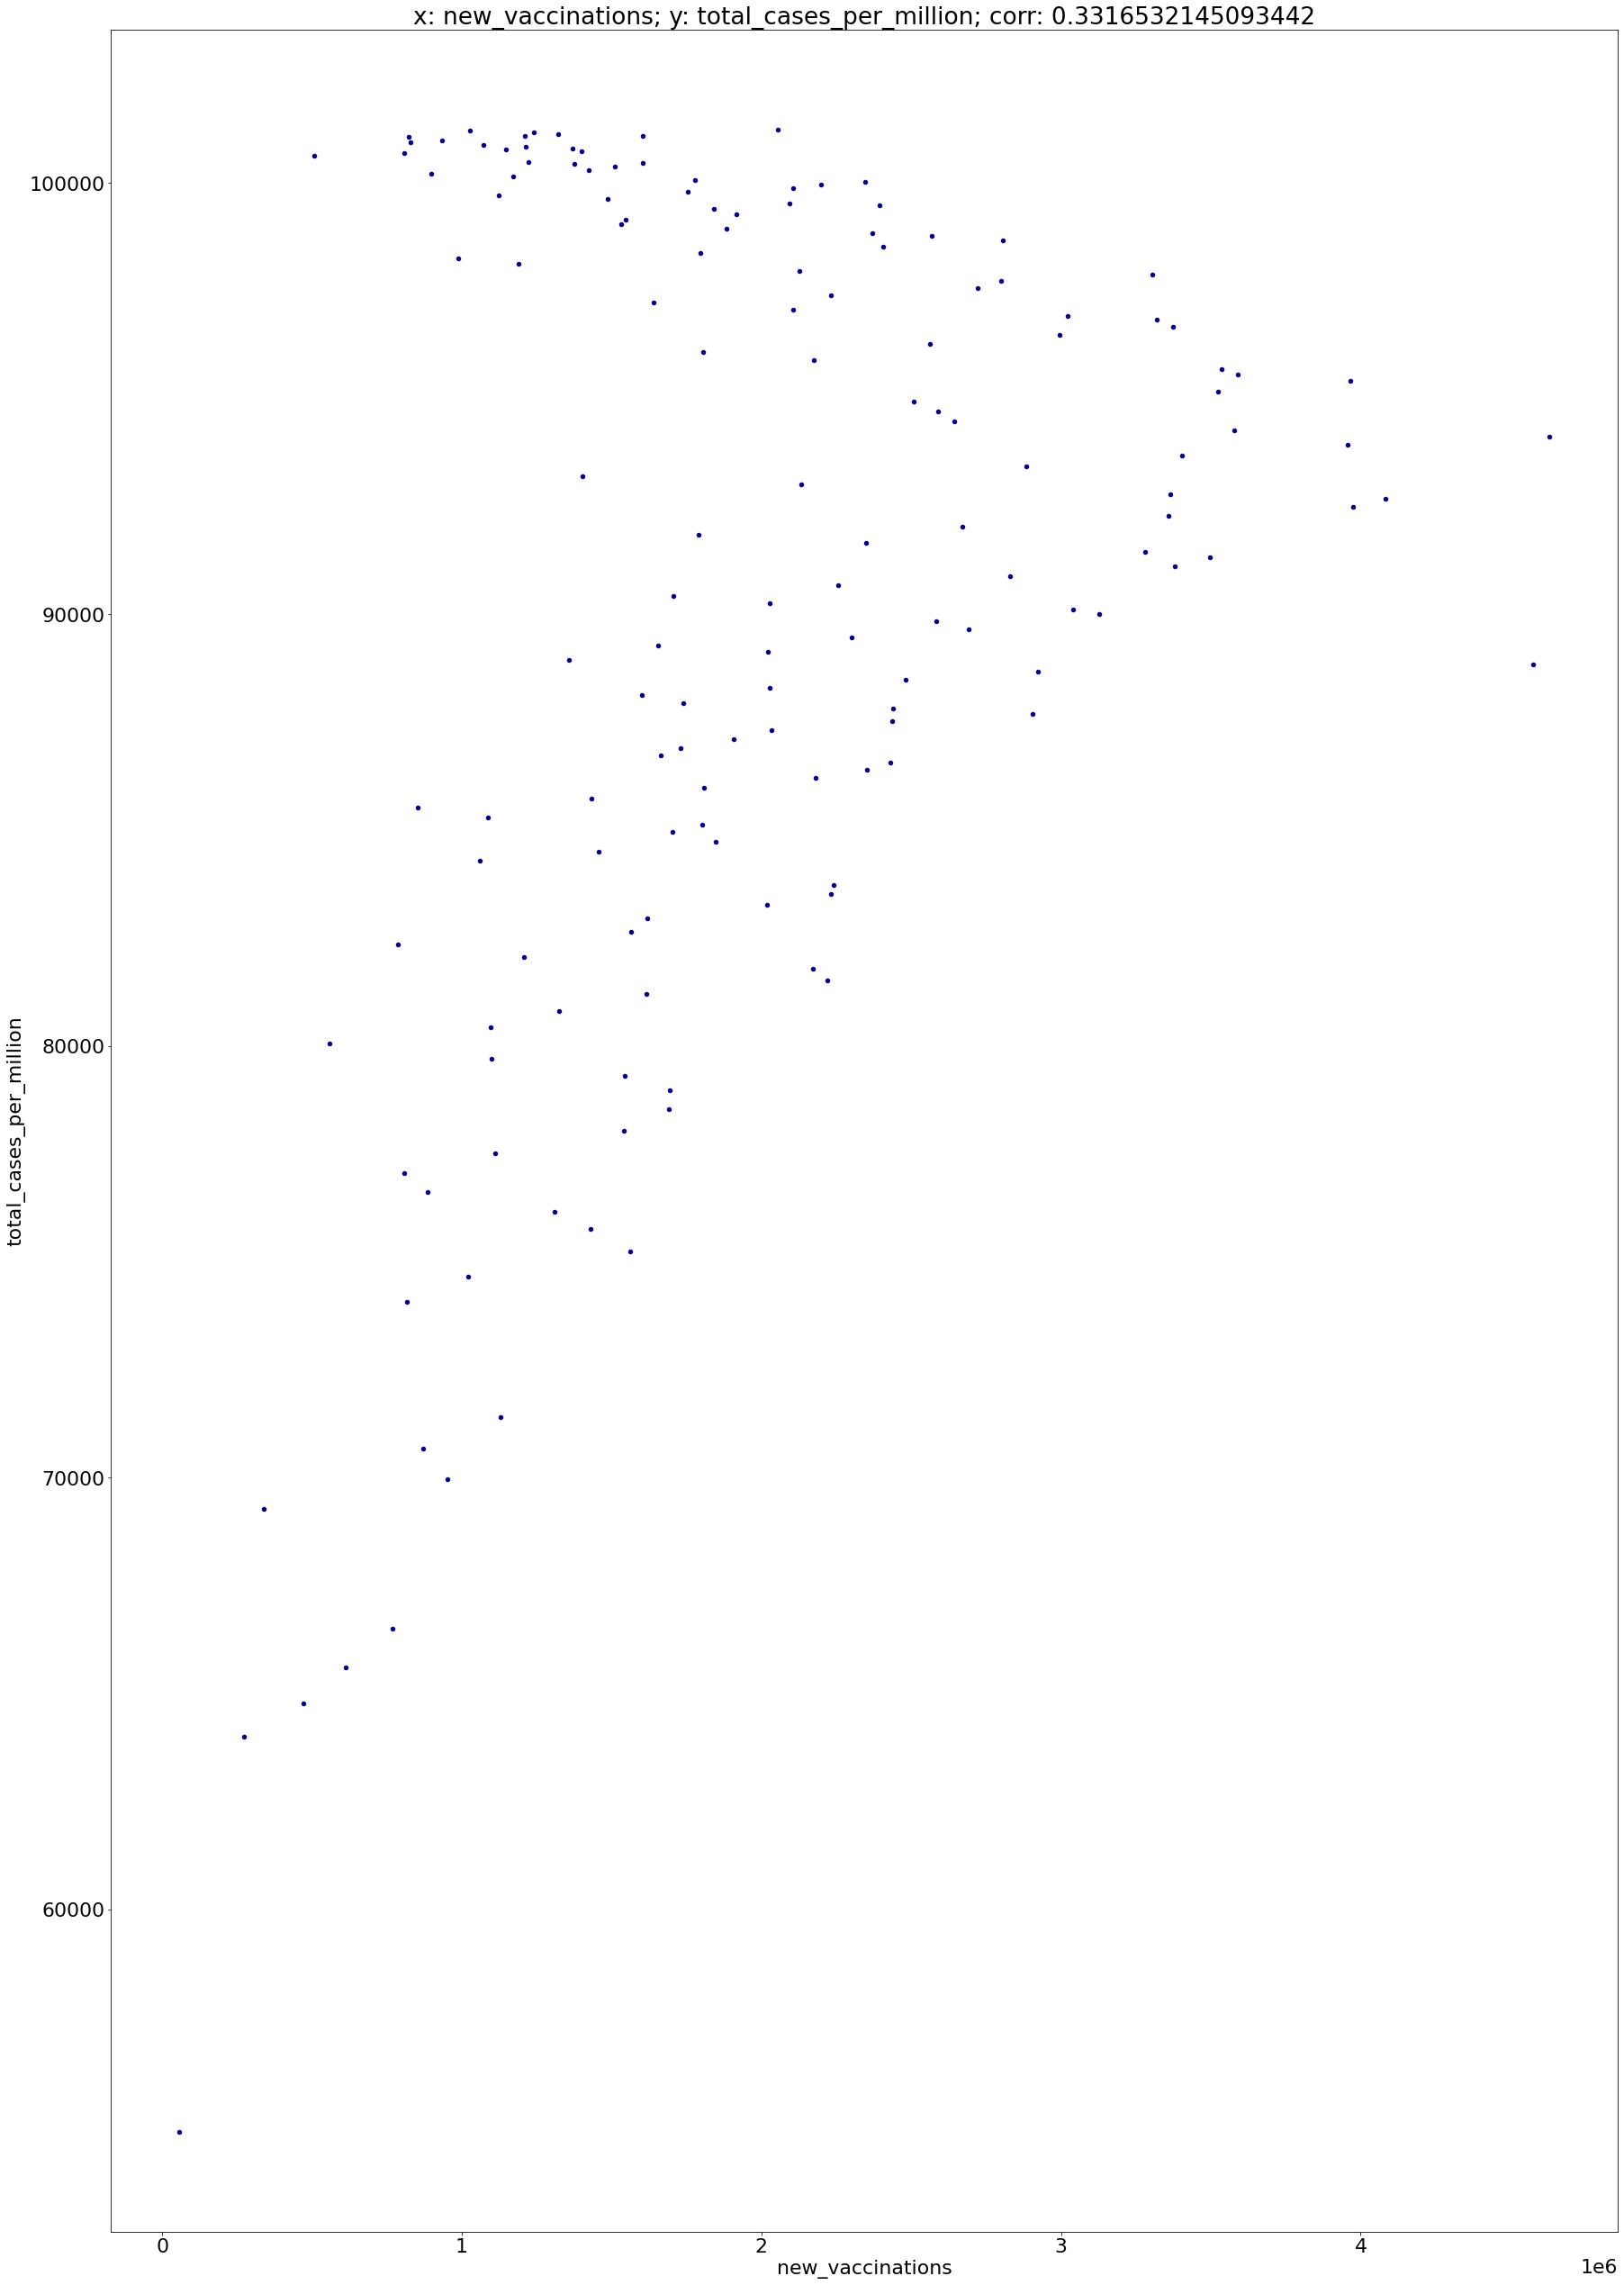

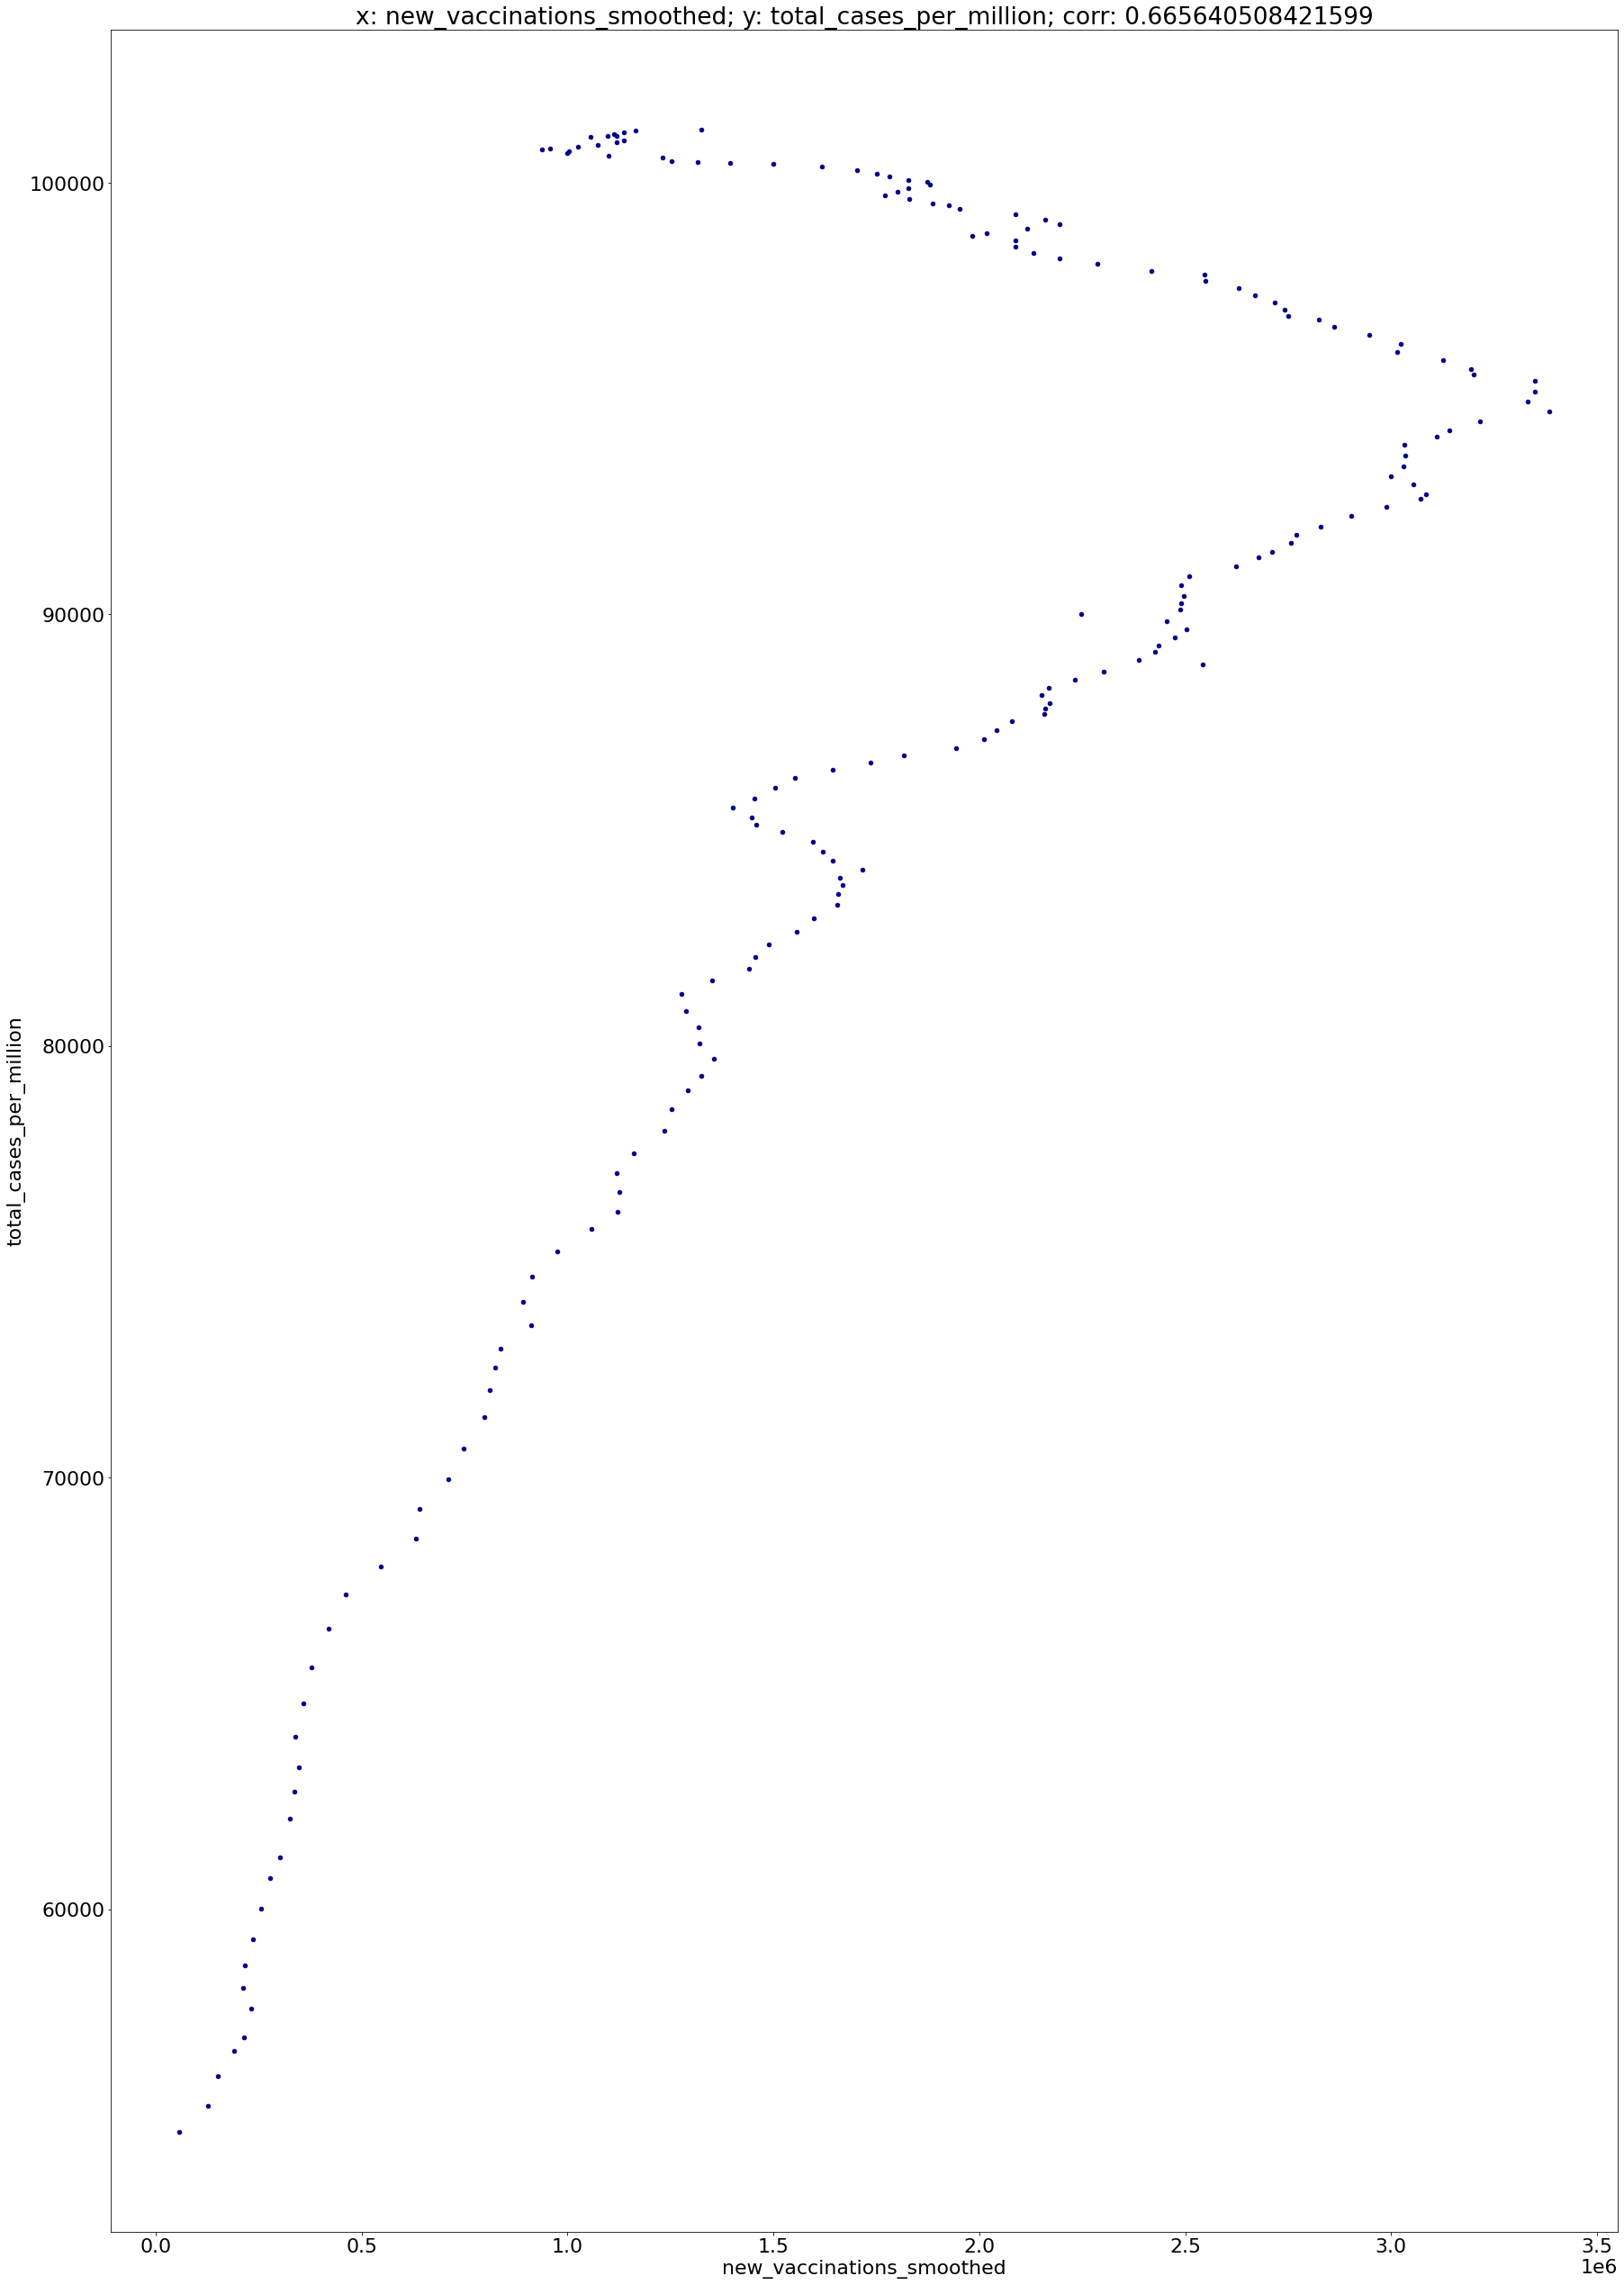

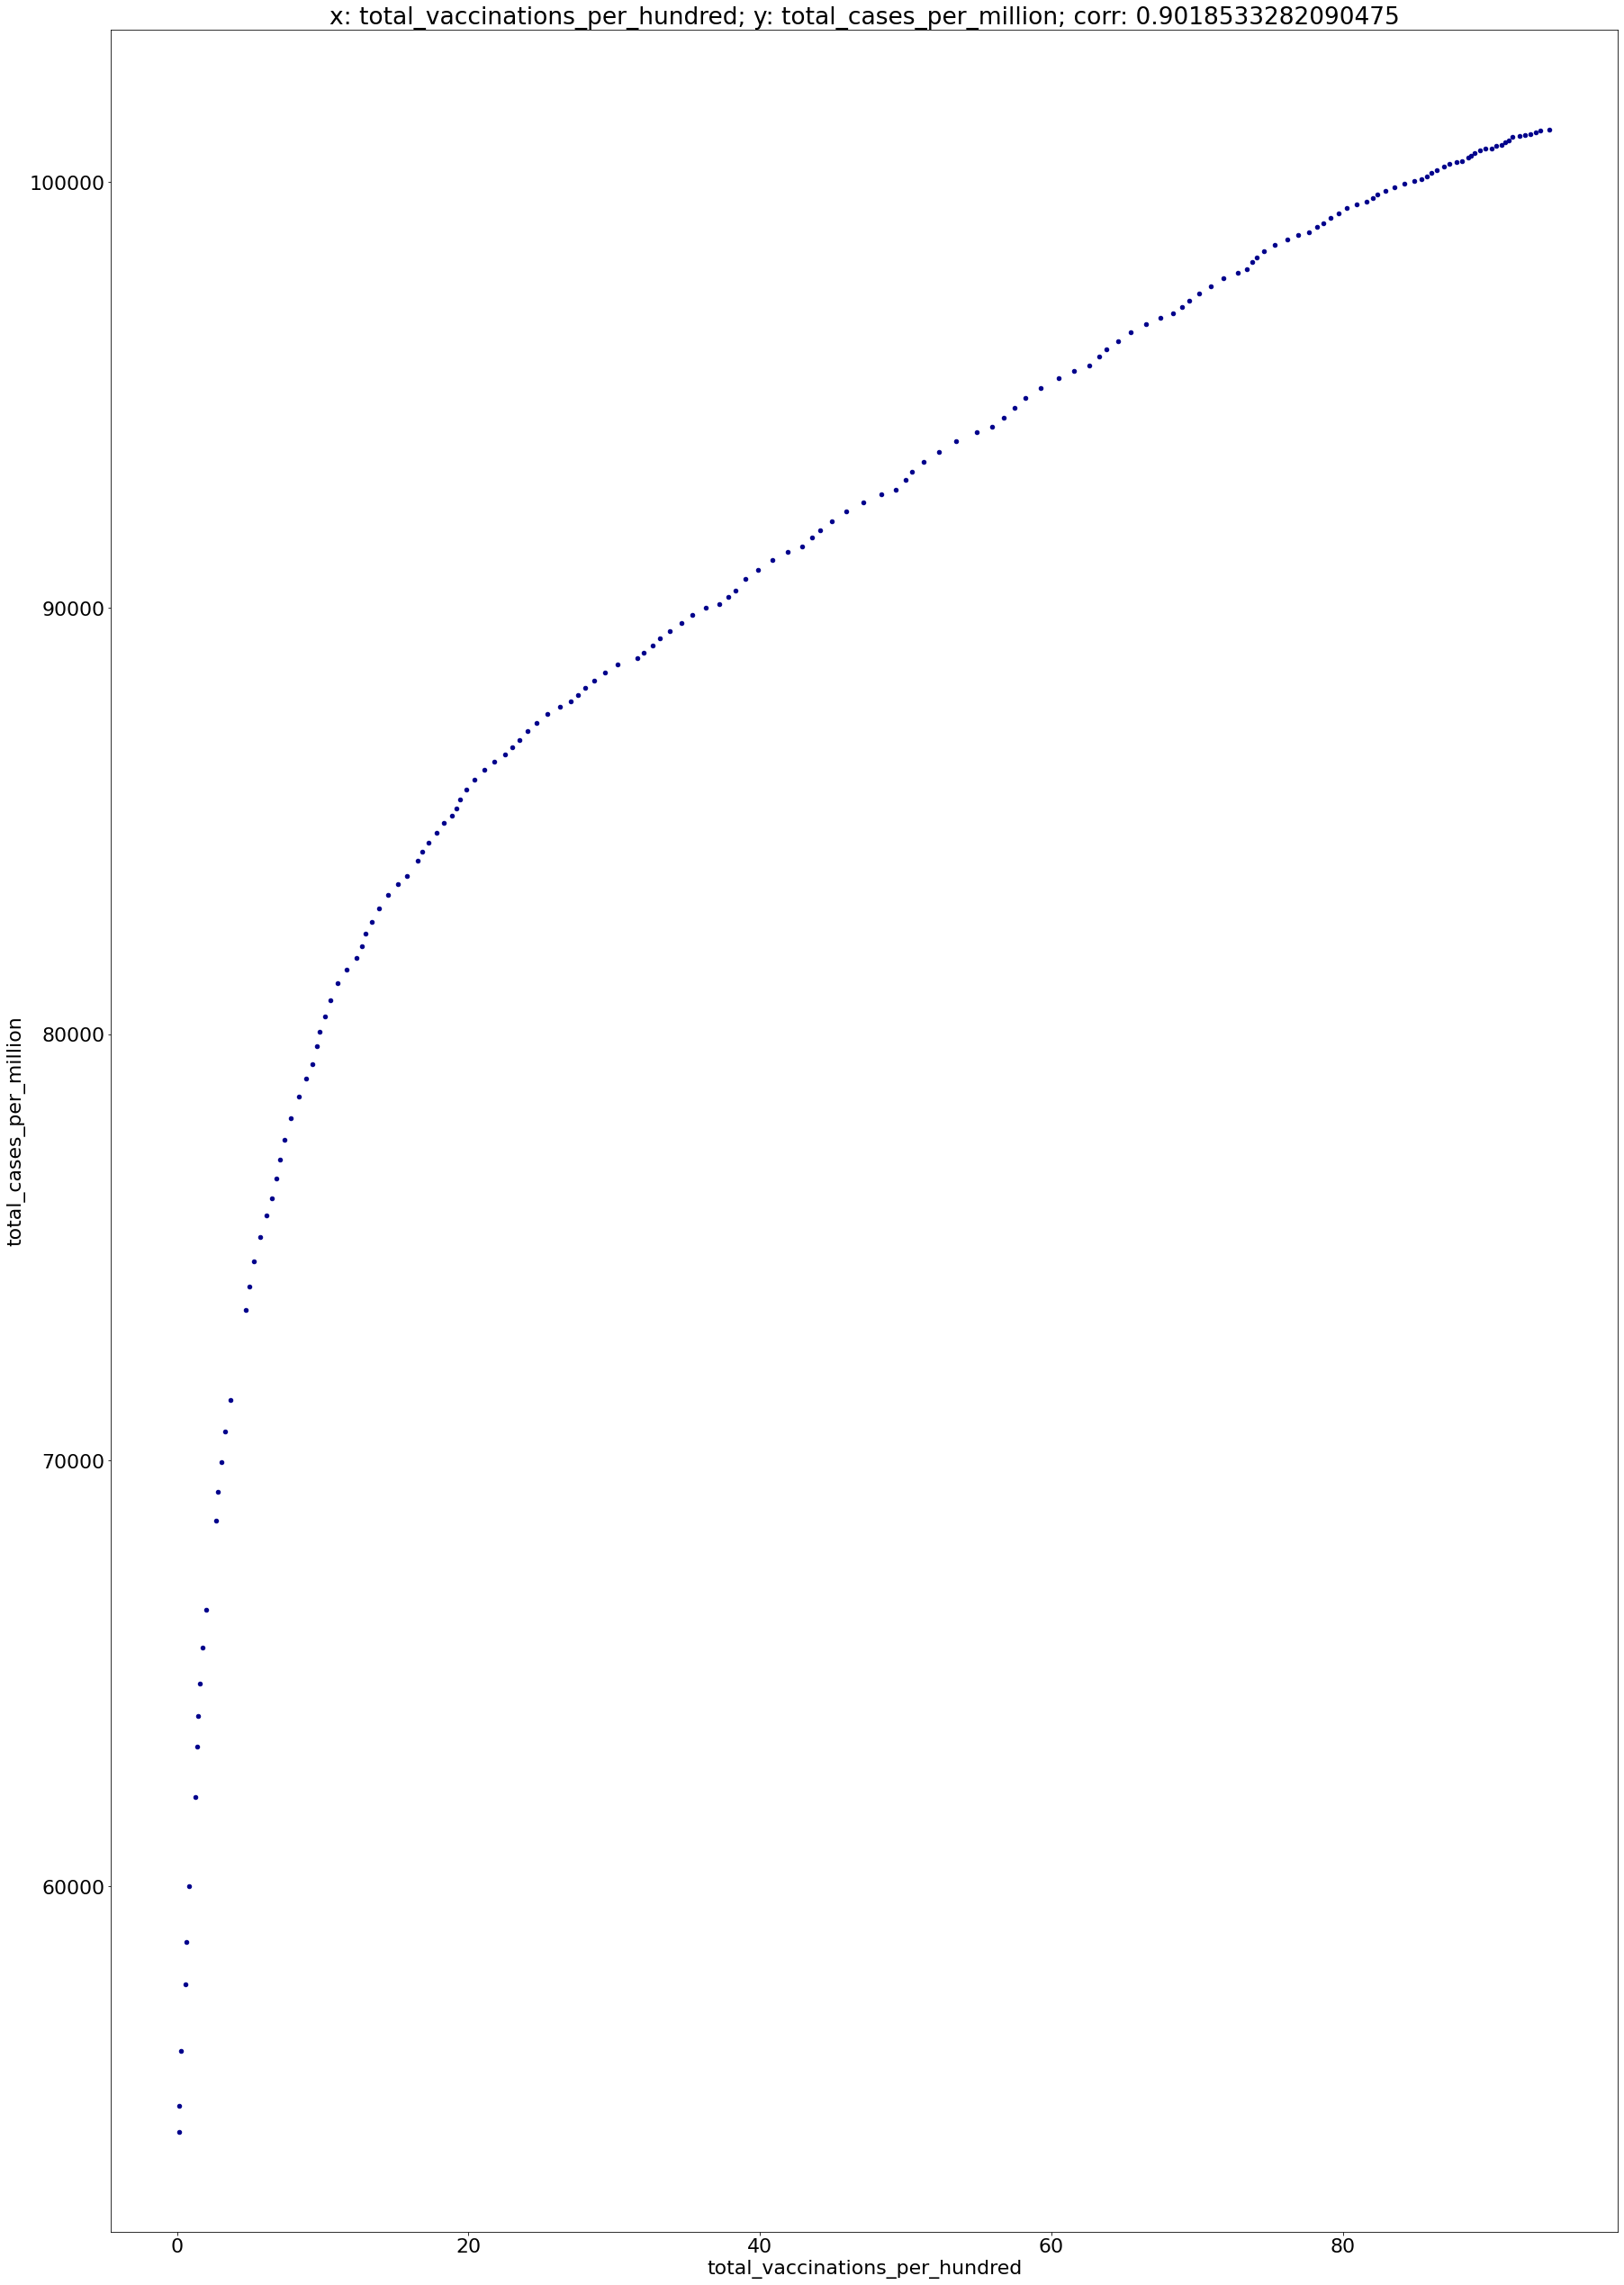

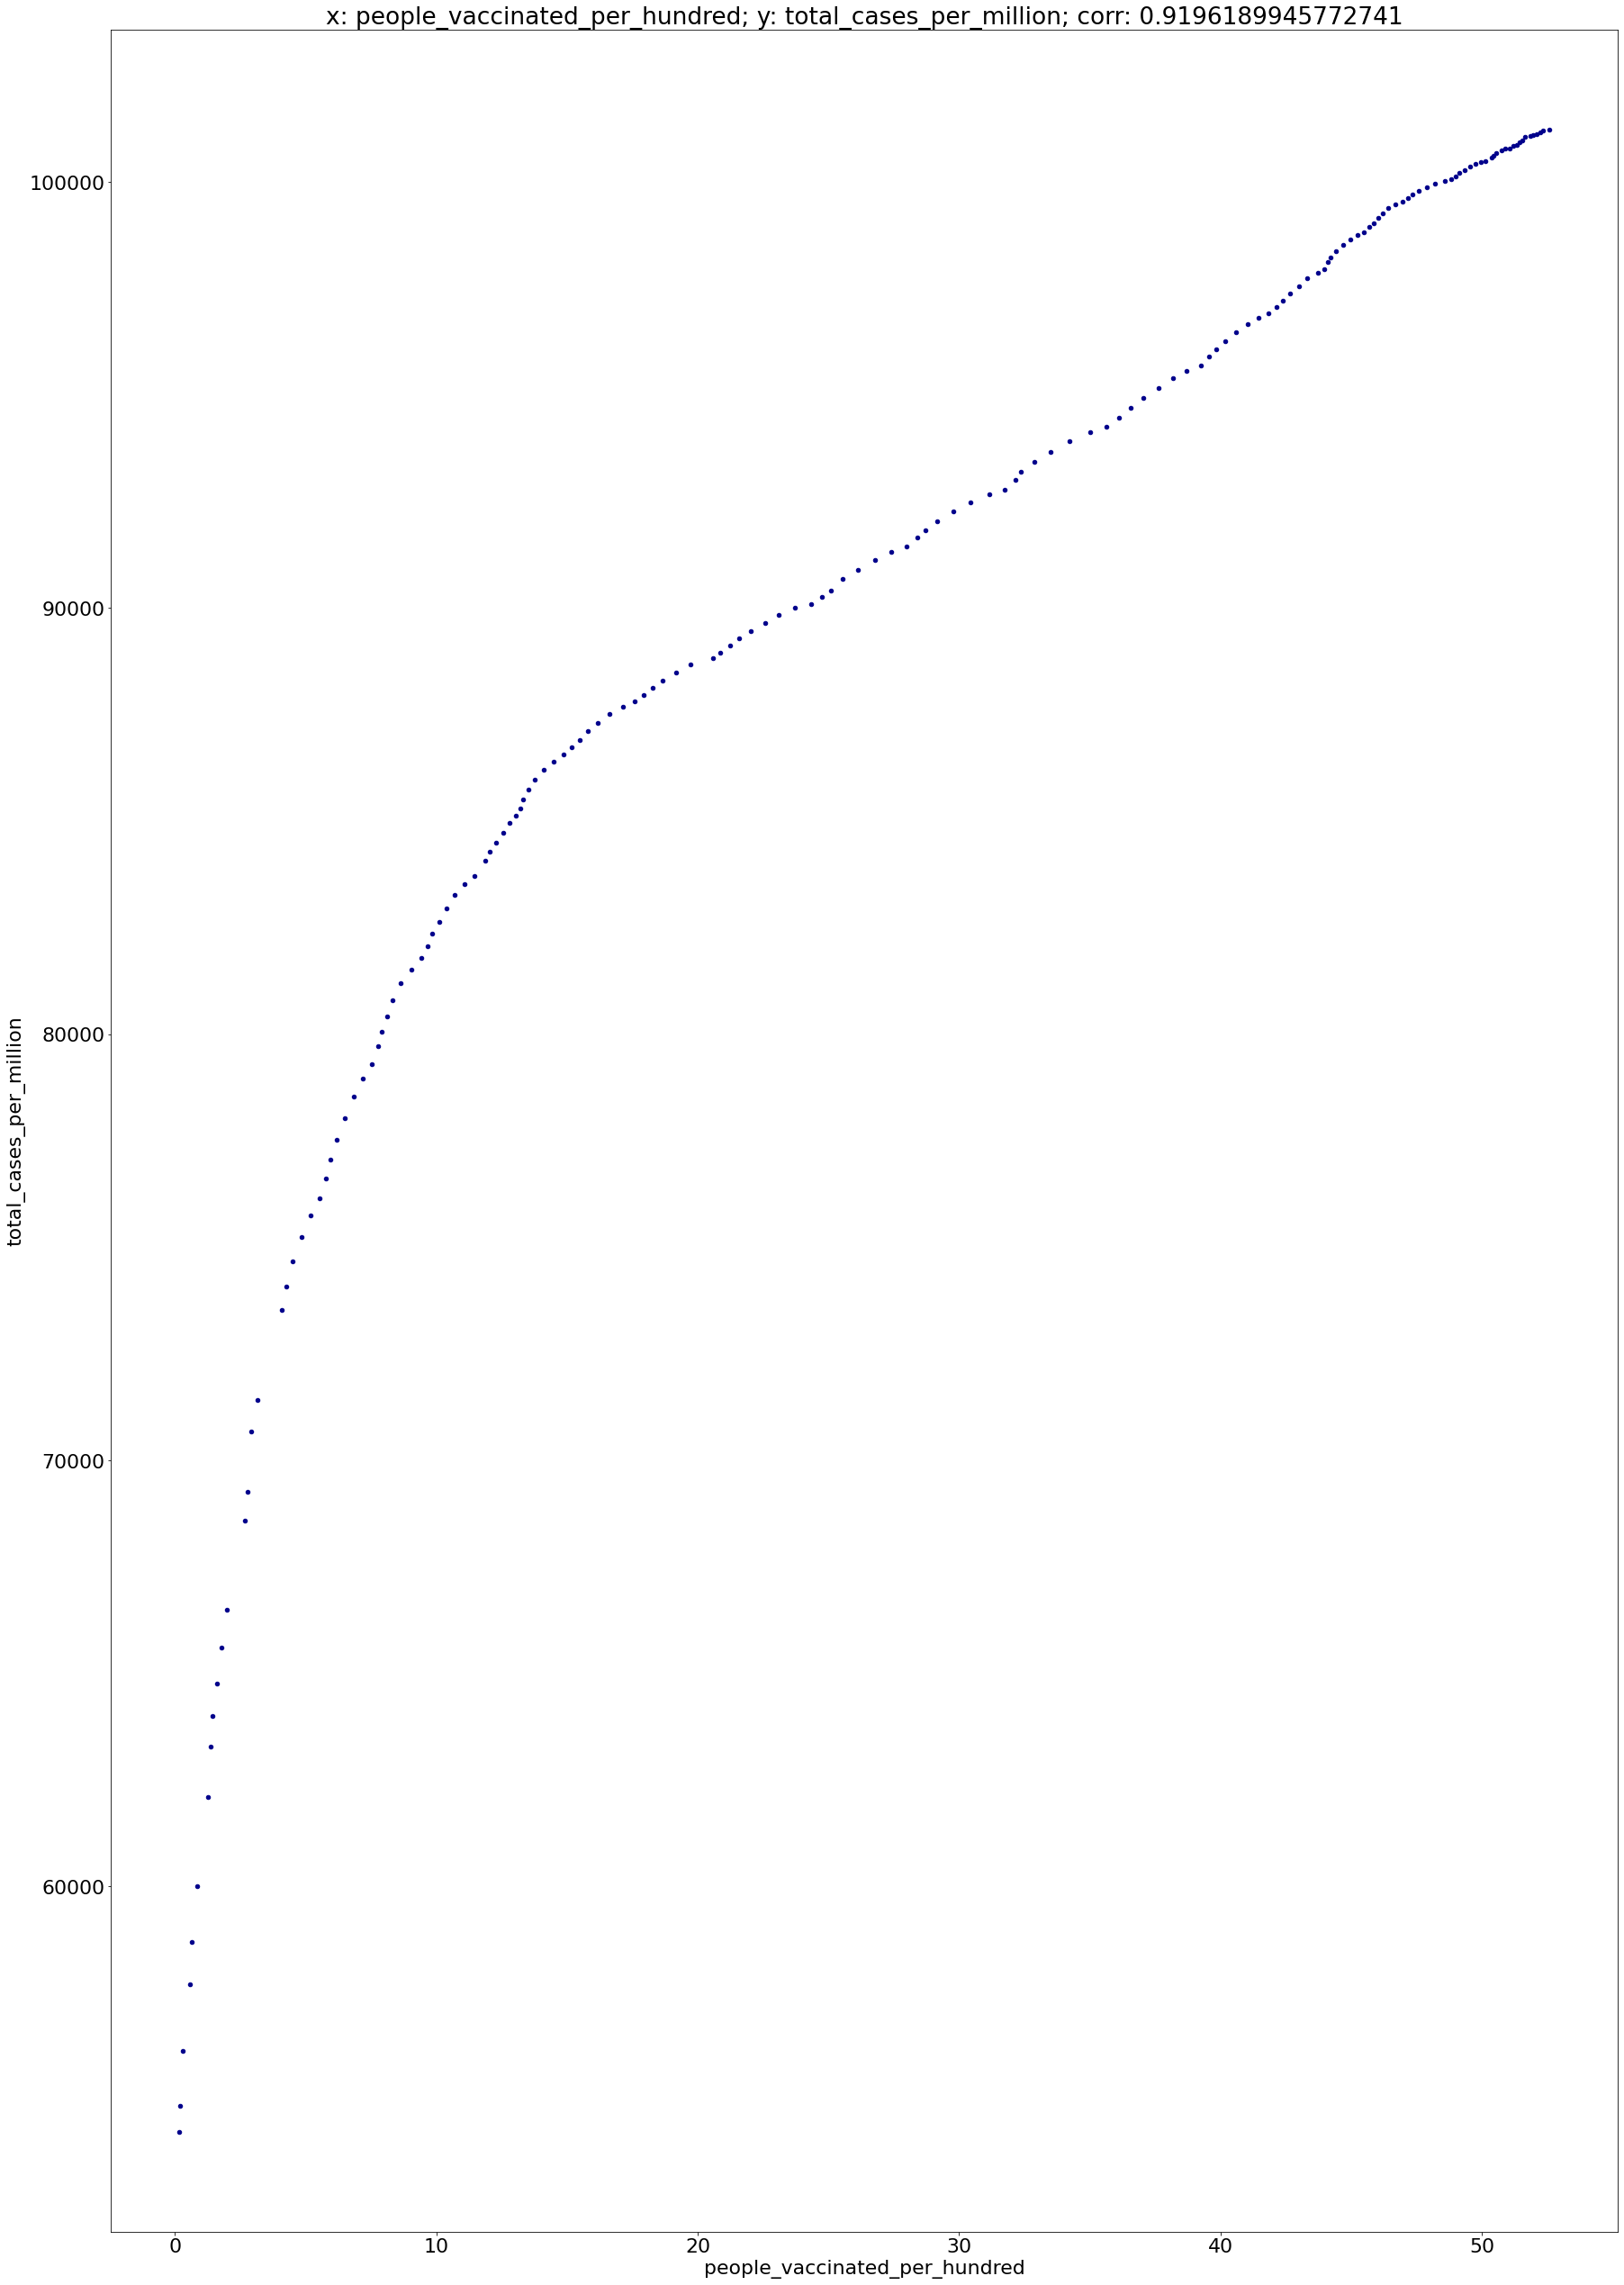

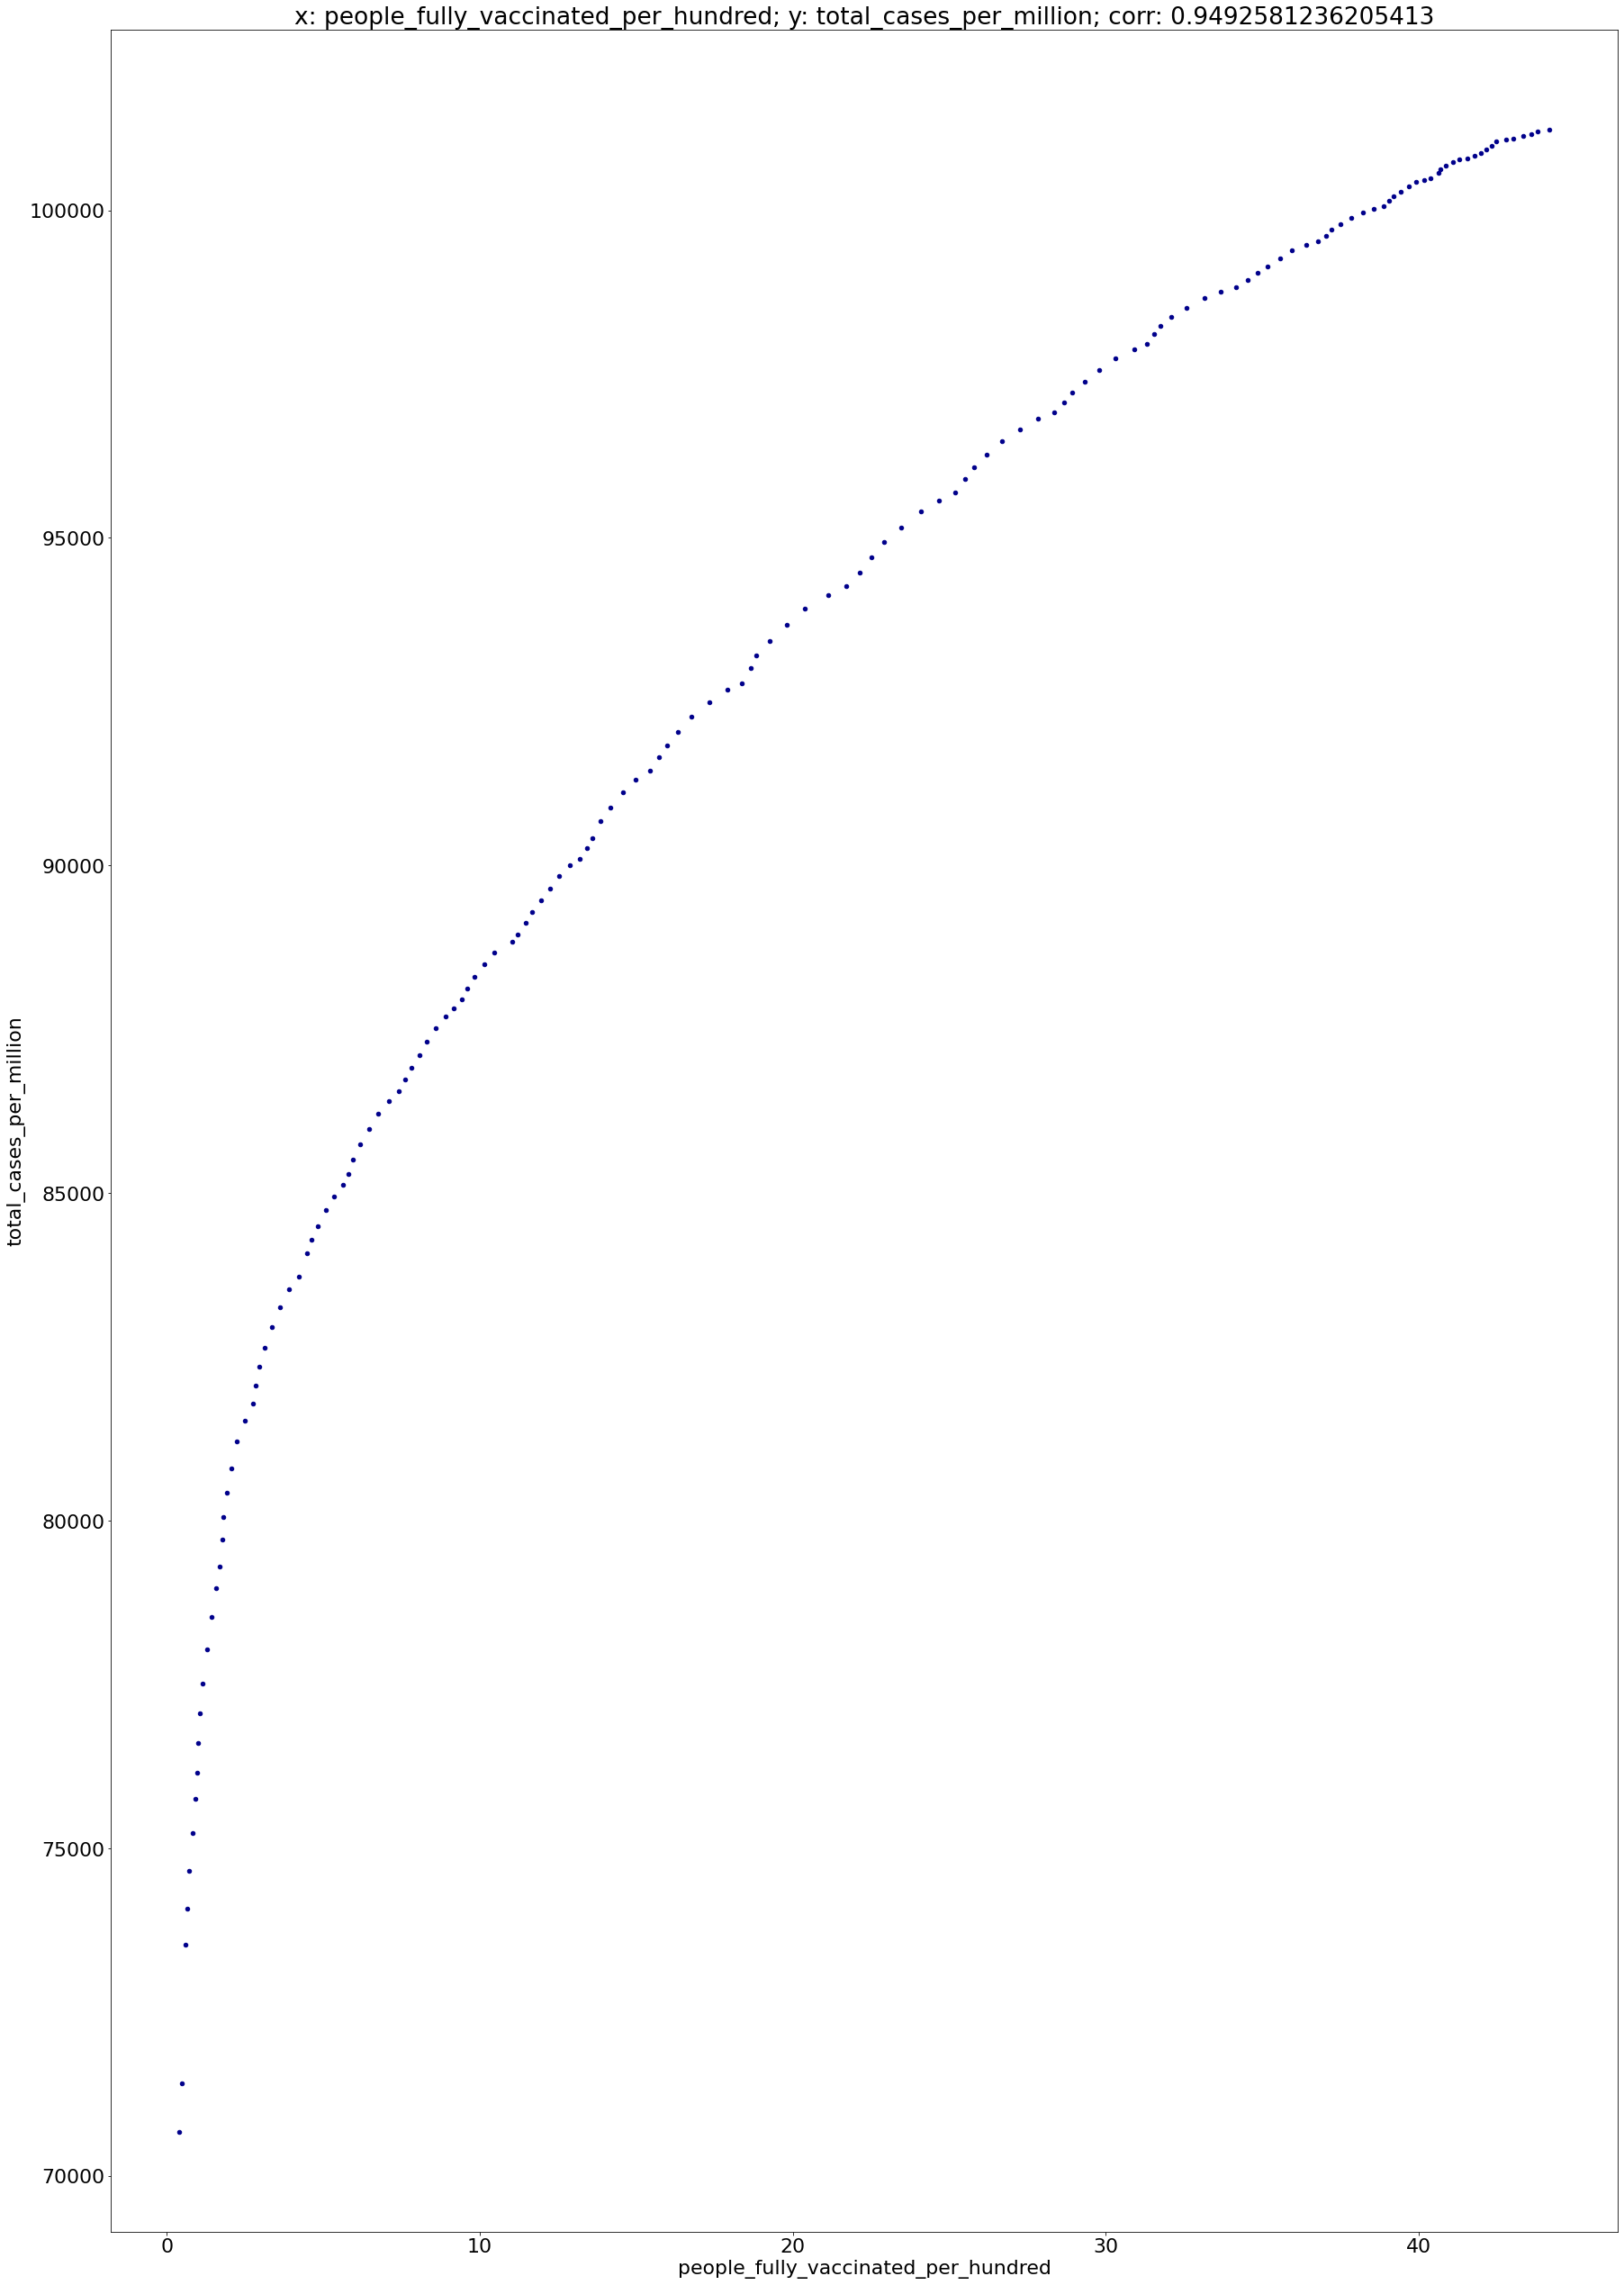

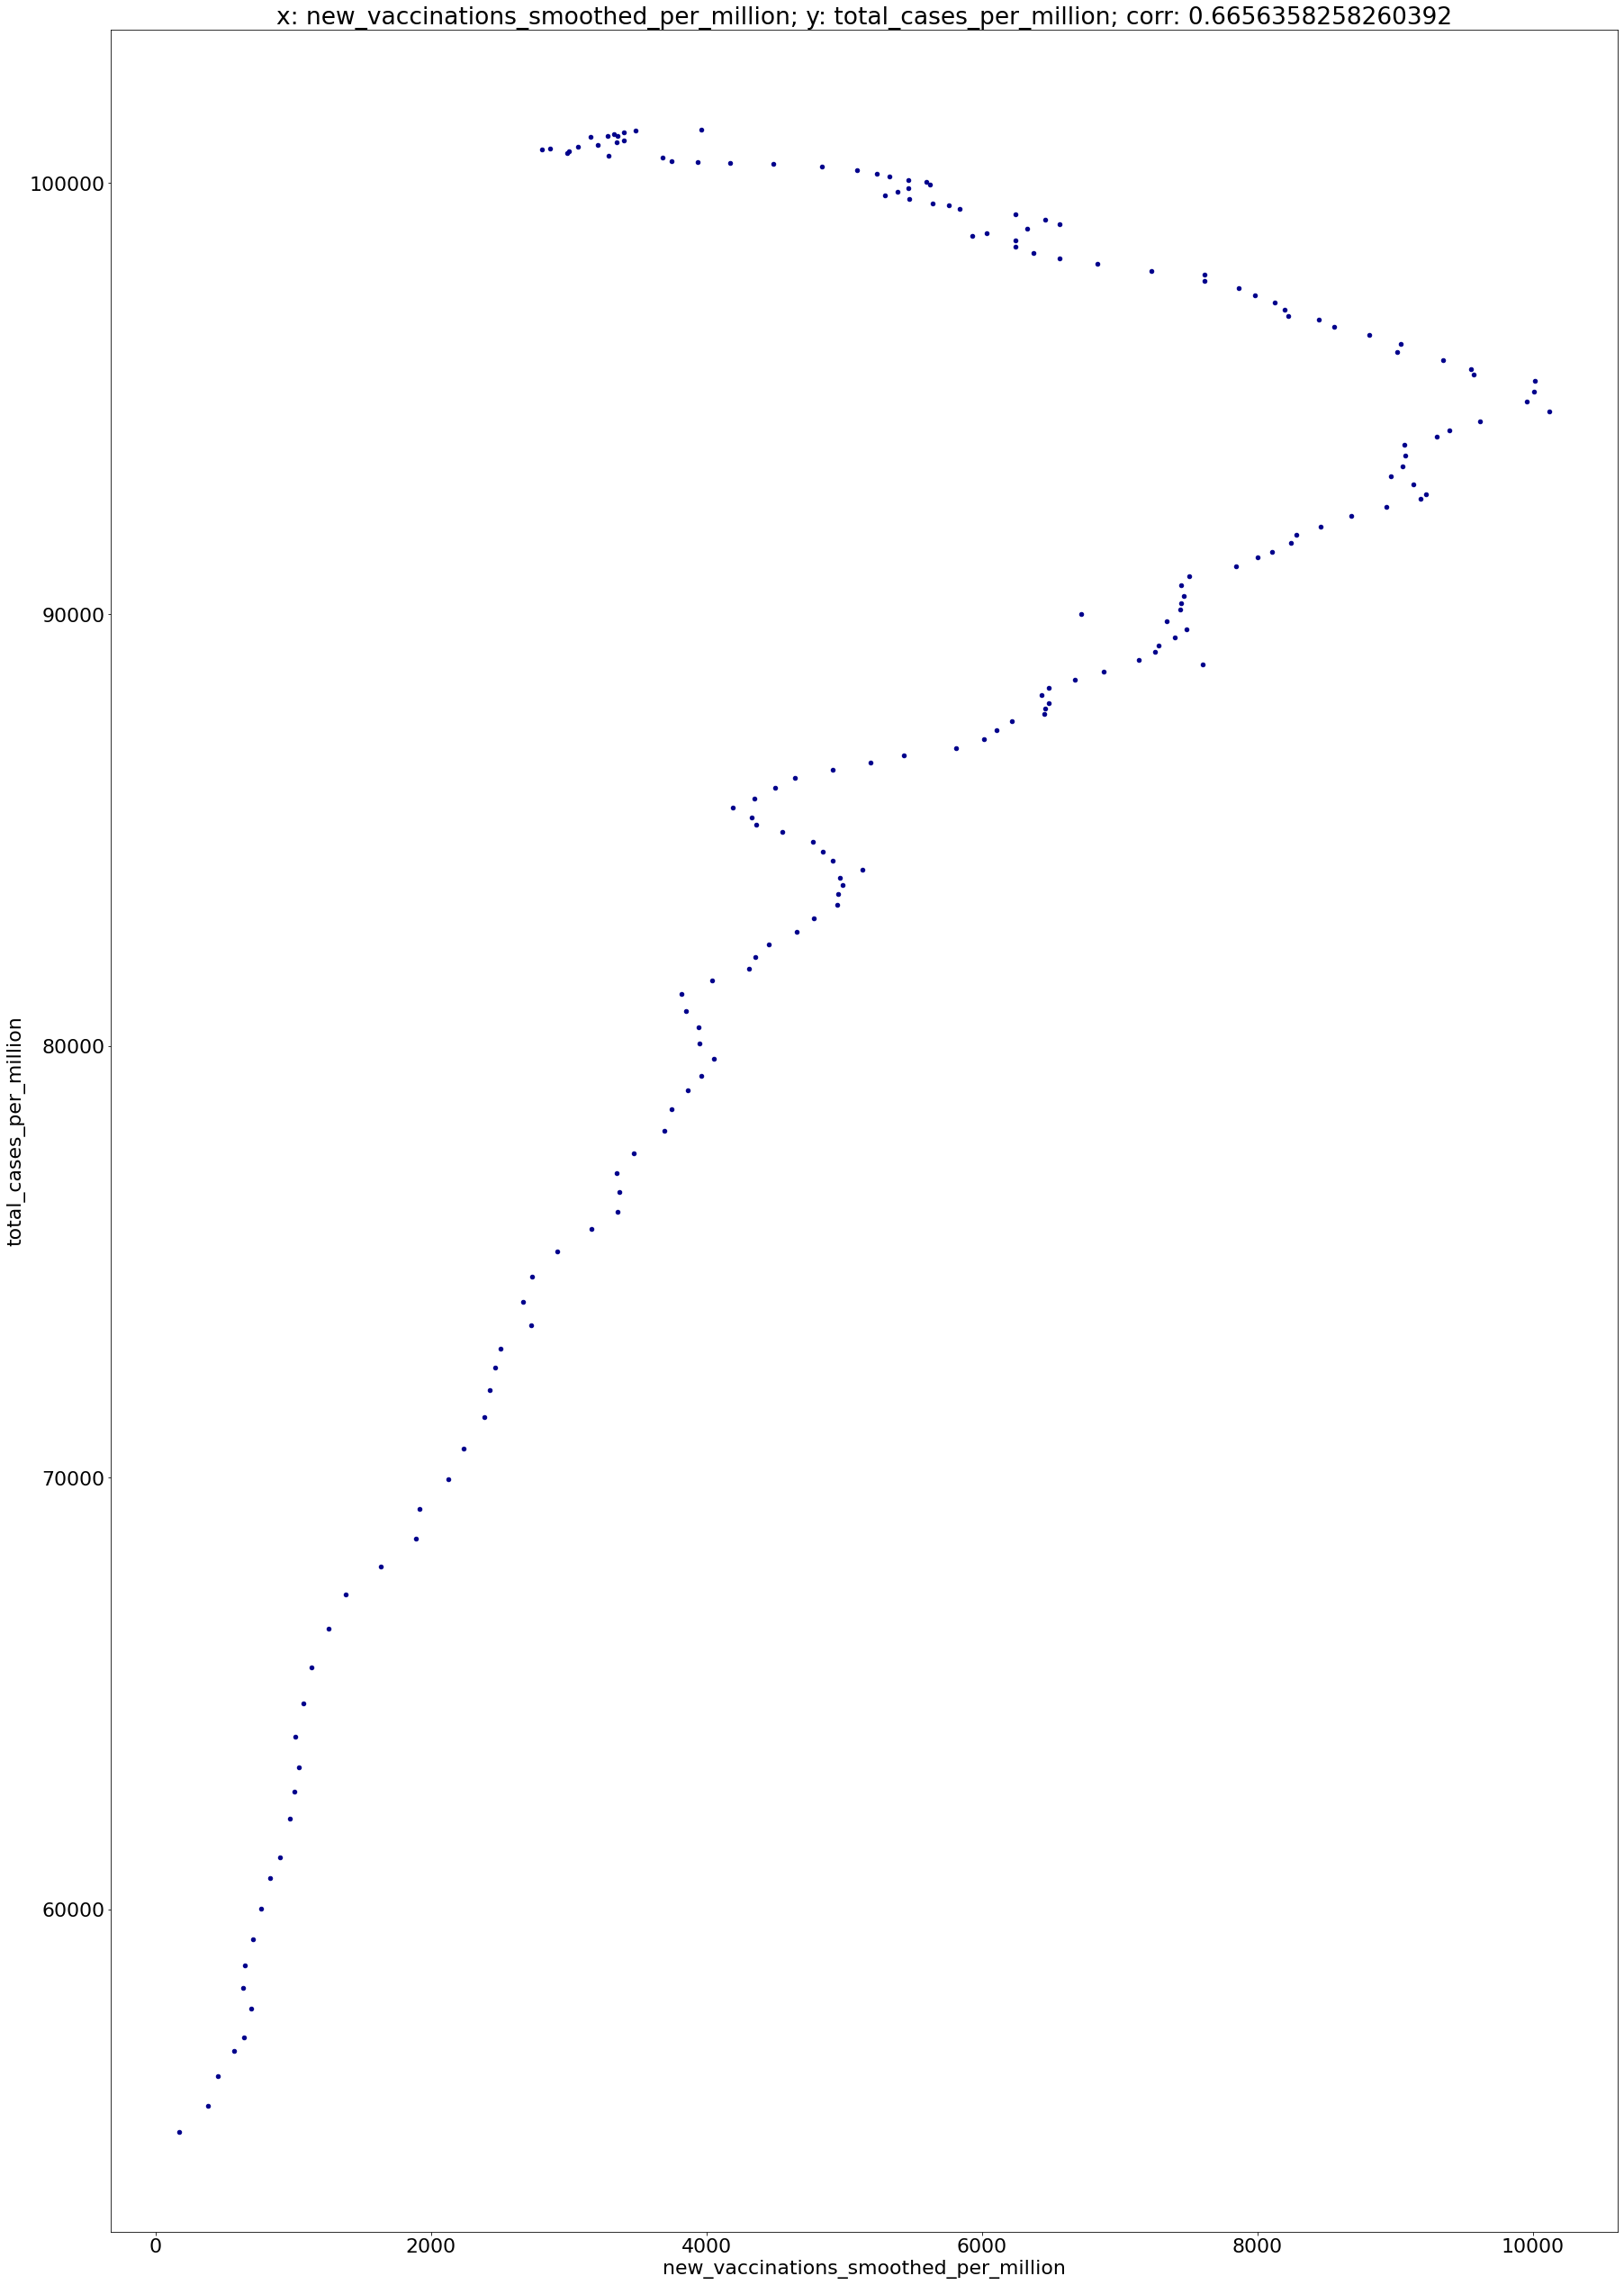

In [10]:
# Plotting scatter plots: vaccination variables against total_cases_per_million
plt.figure()
dep = 'total_cases_per_million'
ind = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million']
for i, j in enumerate(ind):
    correlation = df_us[j].corr(df_us[dep])
    ax = df_us.plot.scatter(x=j, y=dep, c='DarkBlue', title="x: {x_name}; y: {y_name}; corr: {corr}".format(x_name = j, y_name = dep, corr = correlation), figsize=(30,45), fontsize=22)

<Figure size 432x288 with 0 Axes>

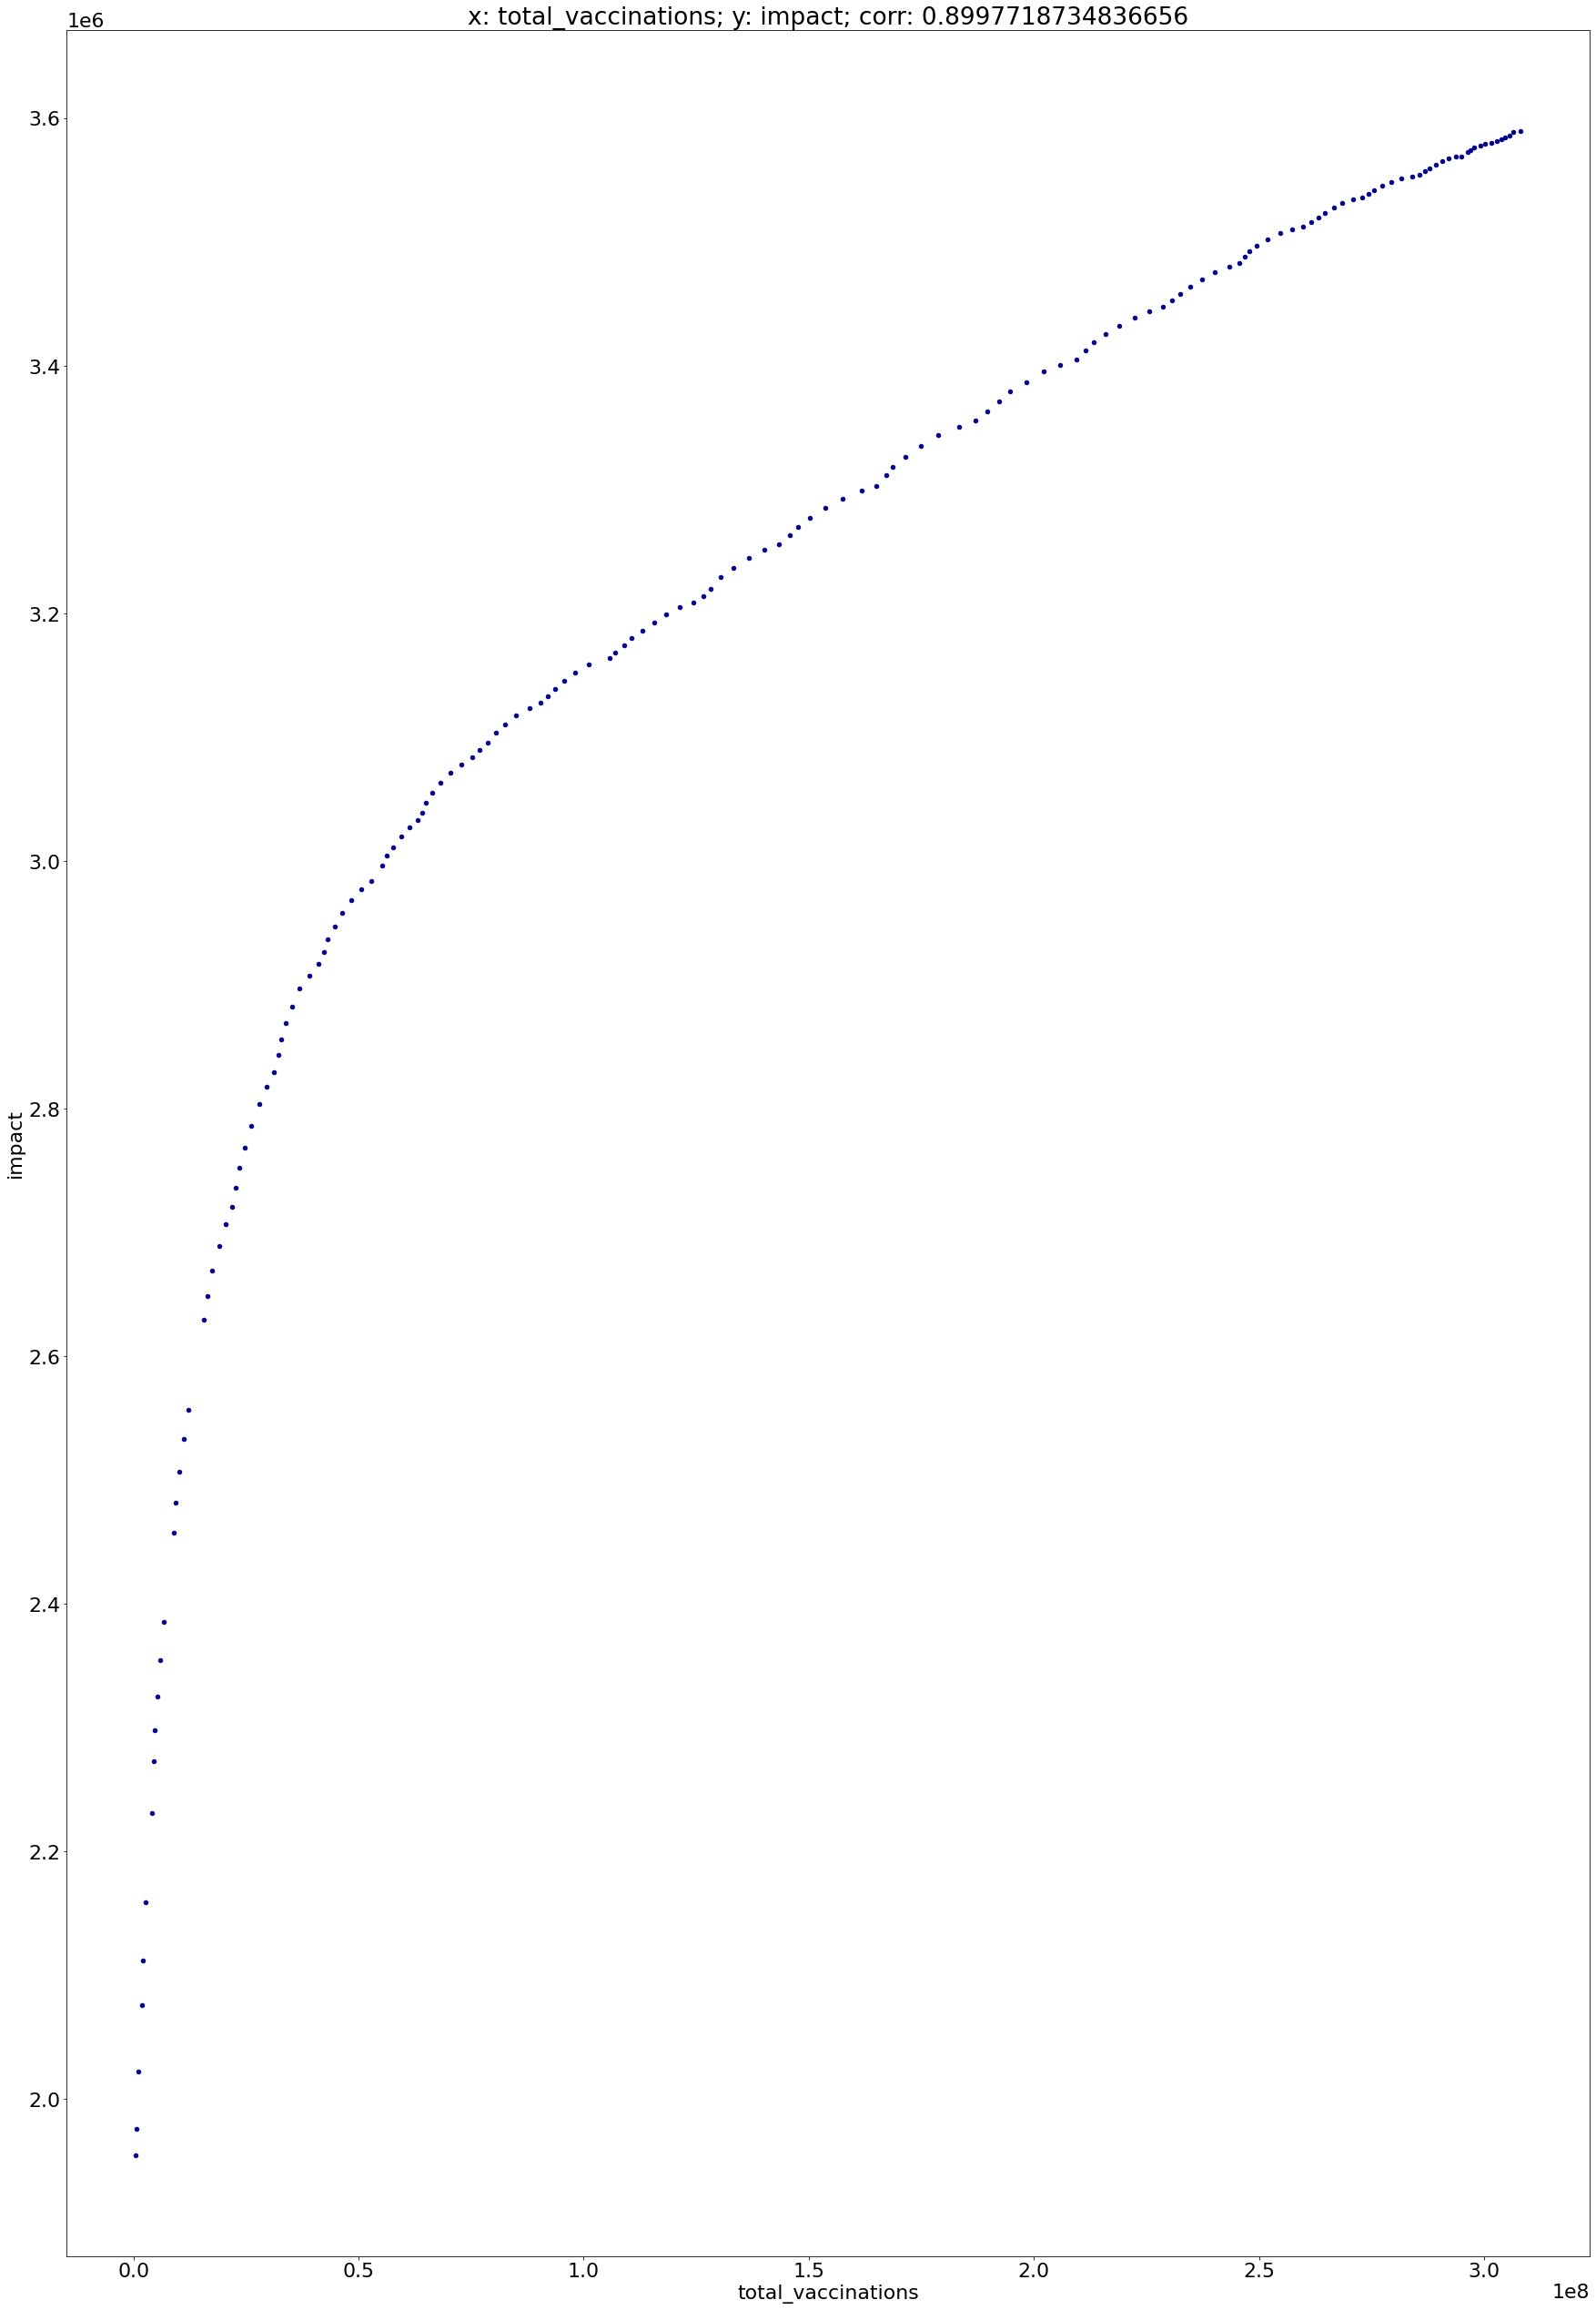

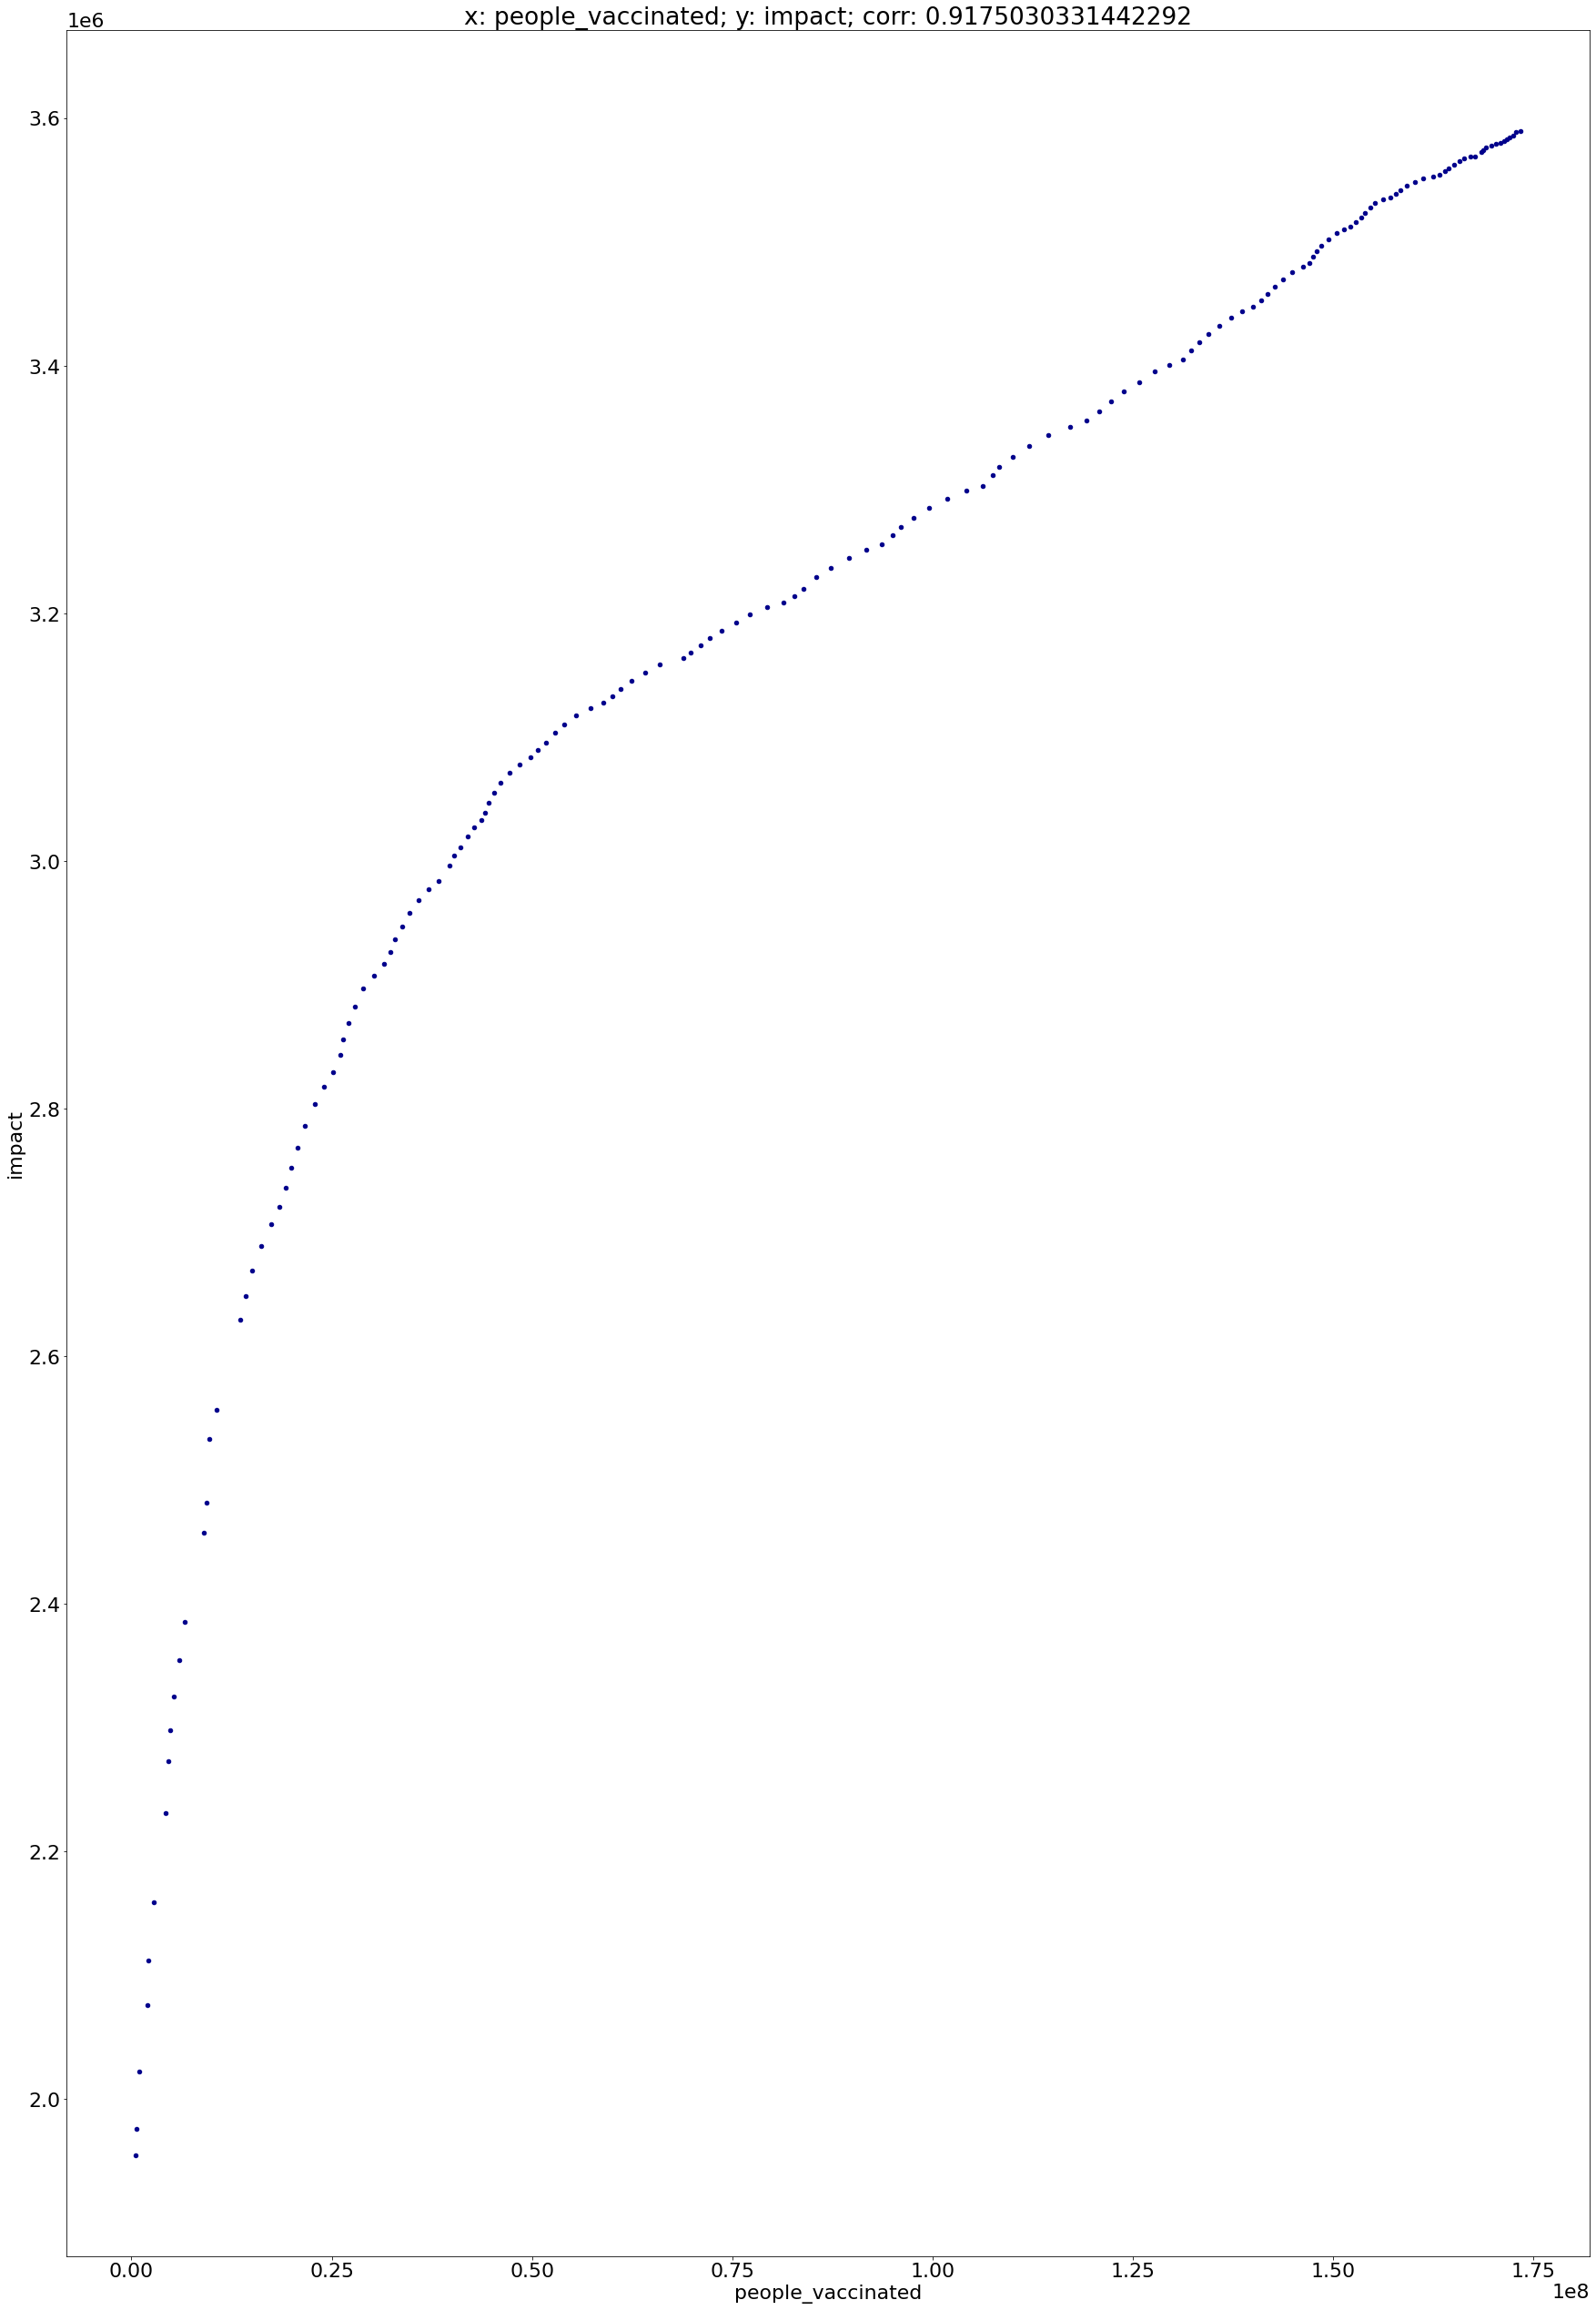

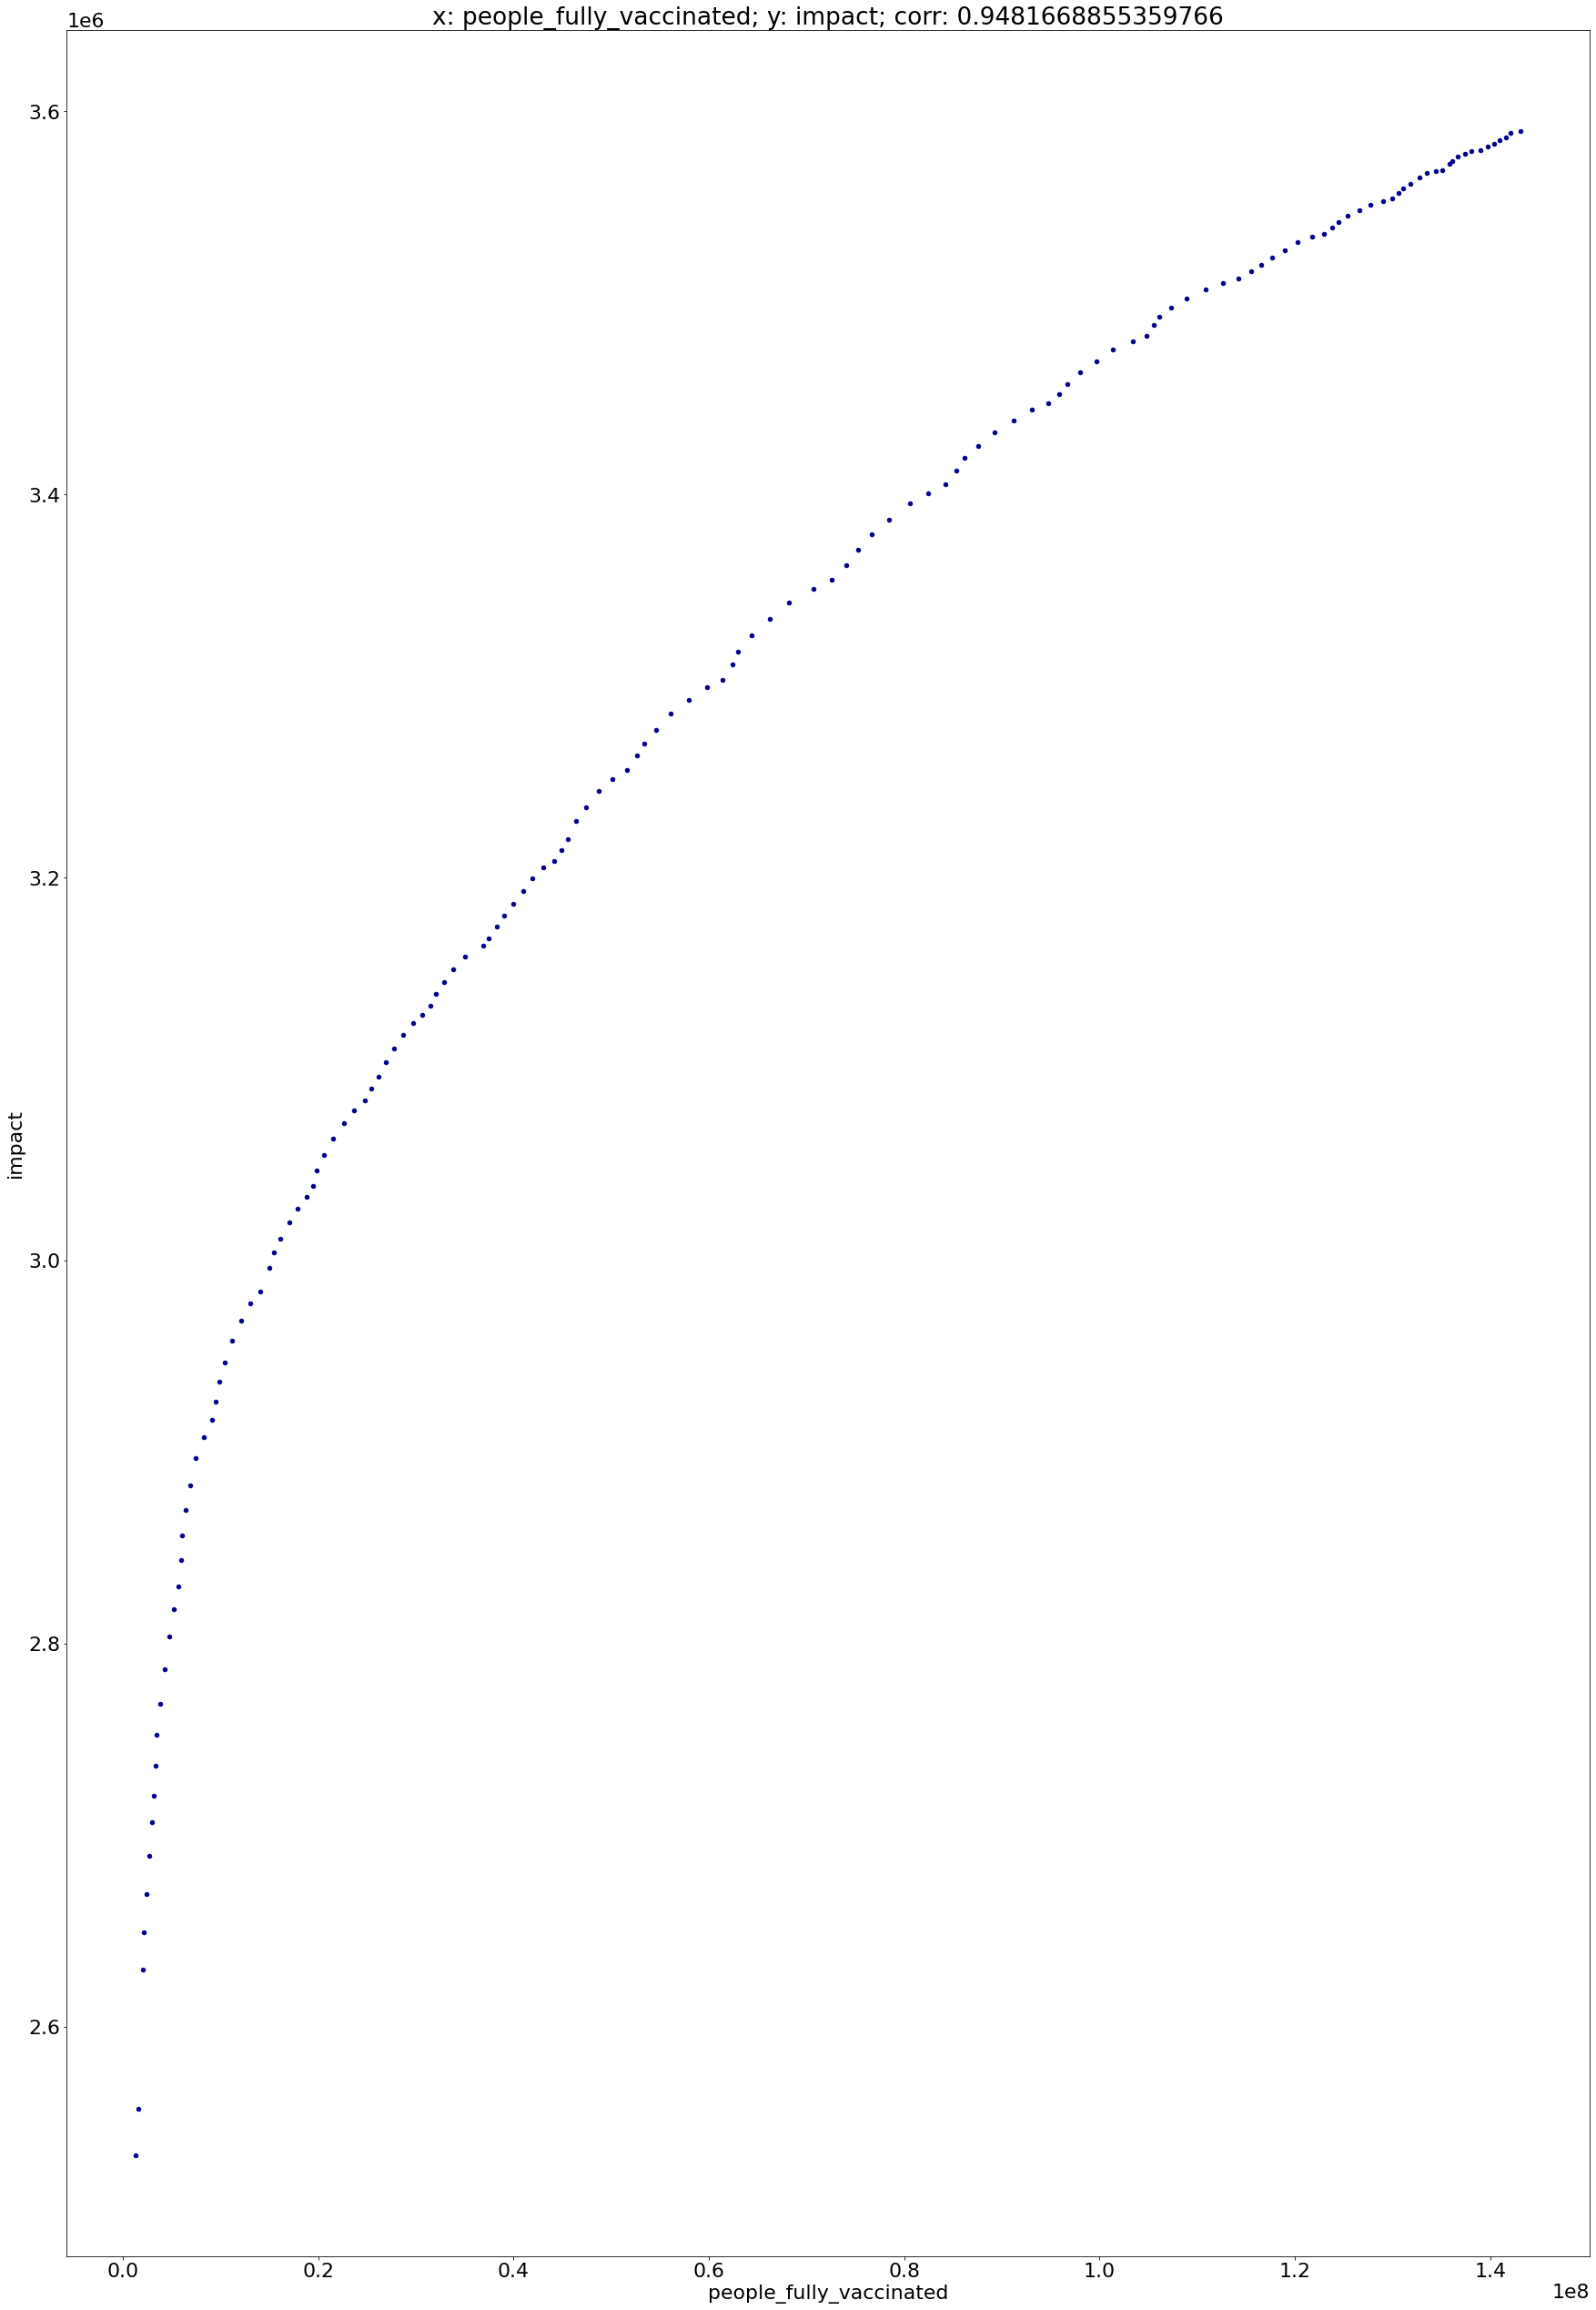

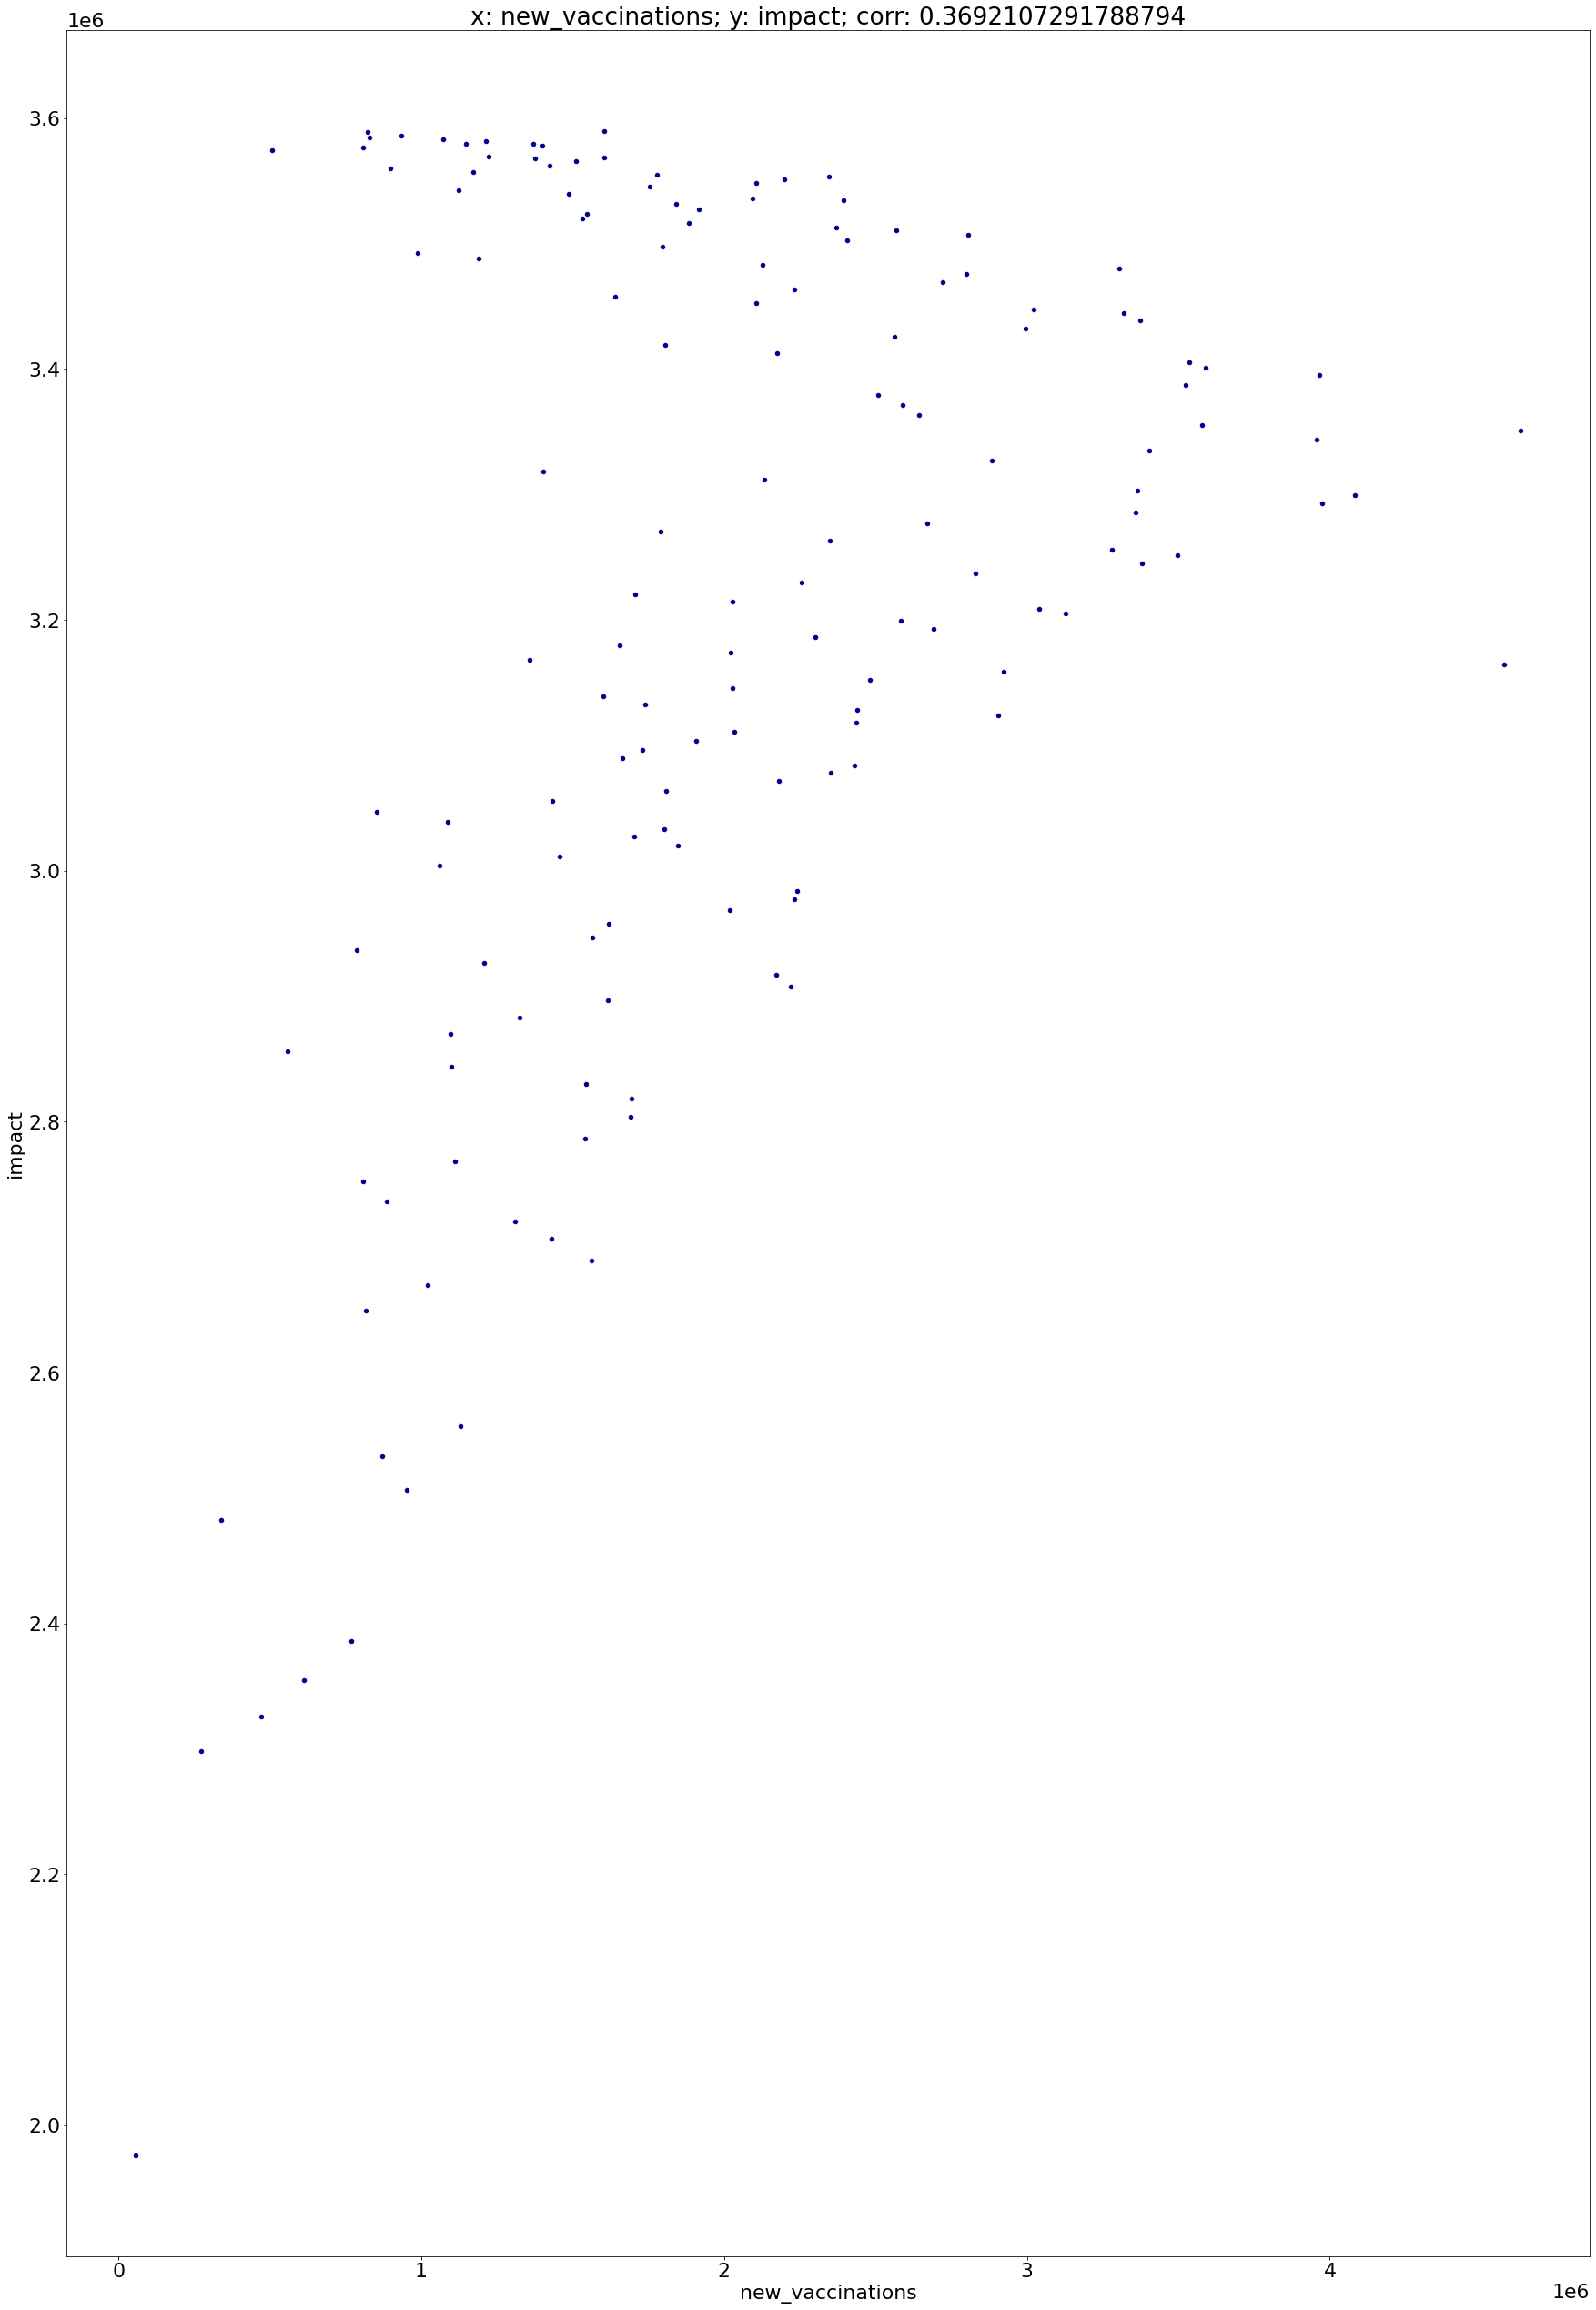

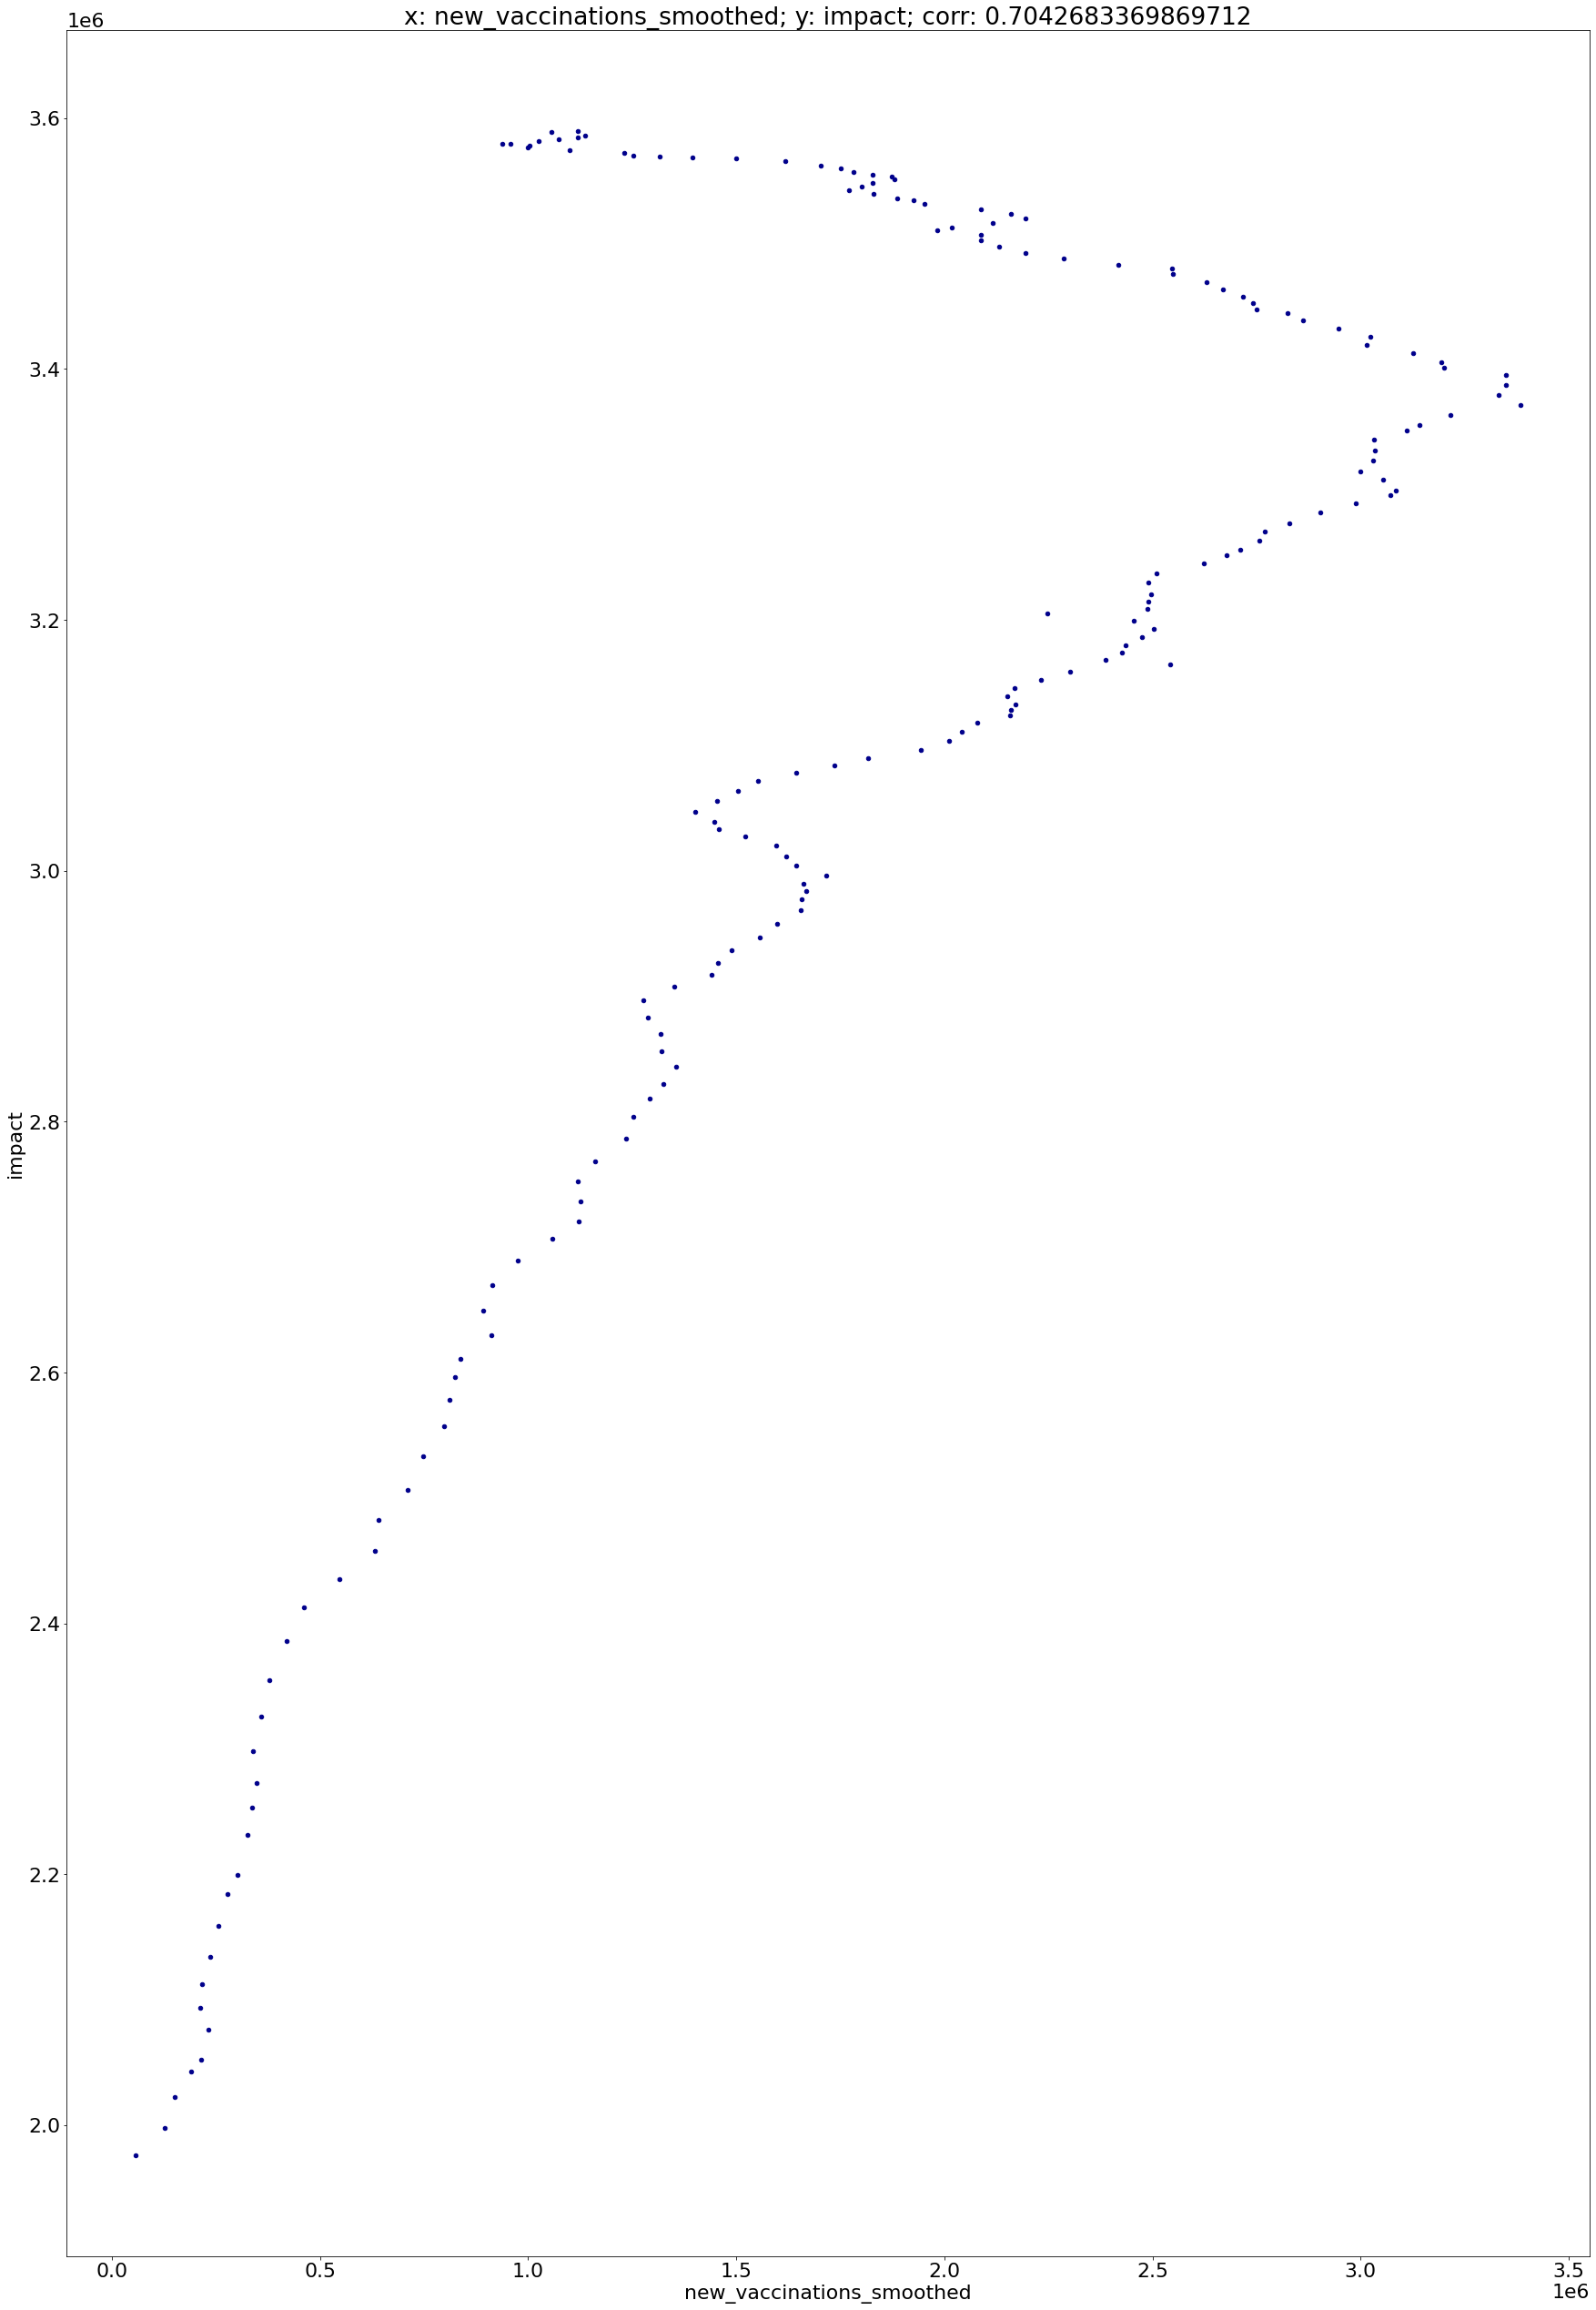

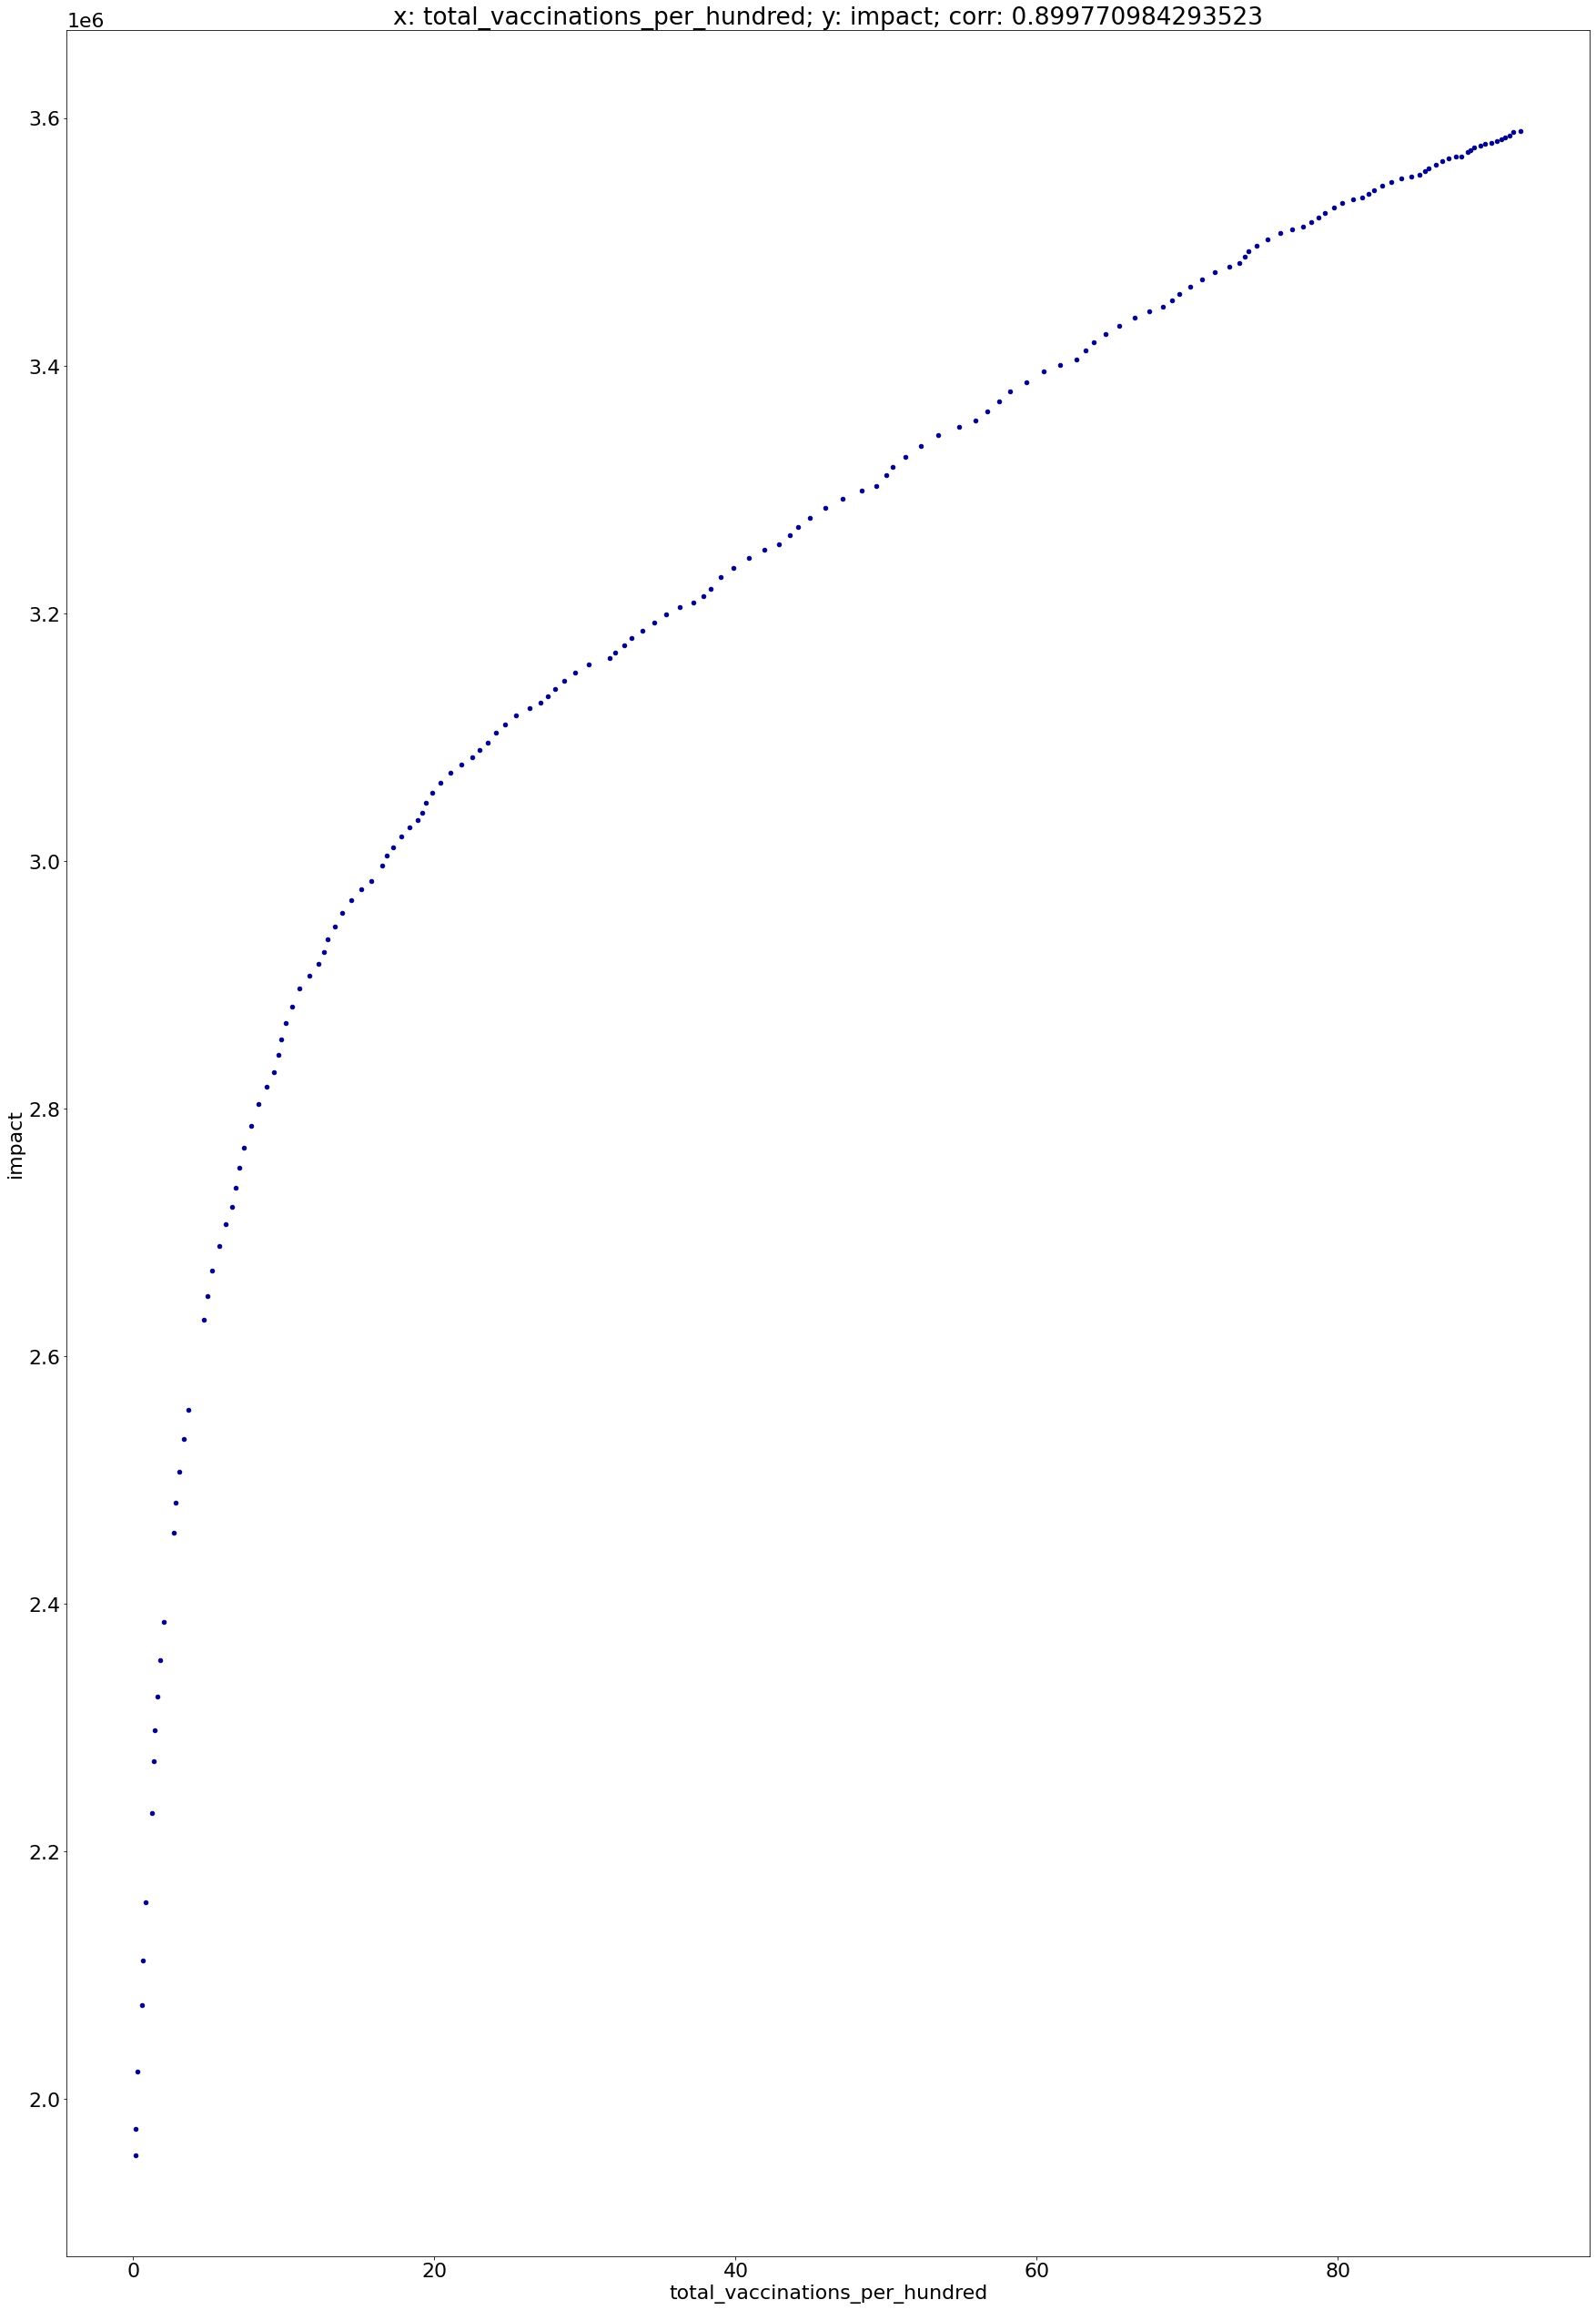

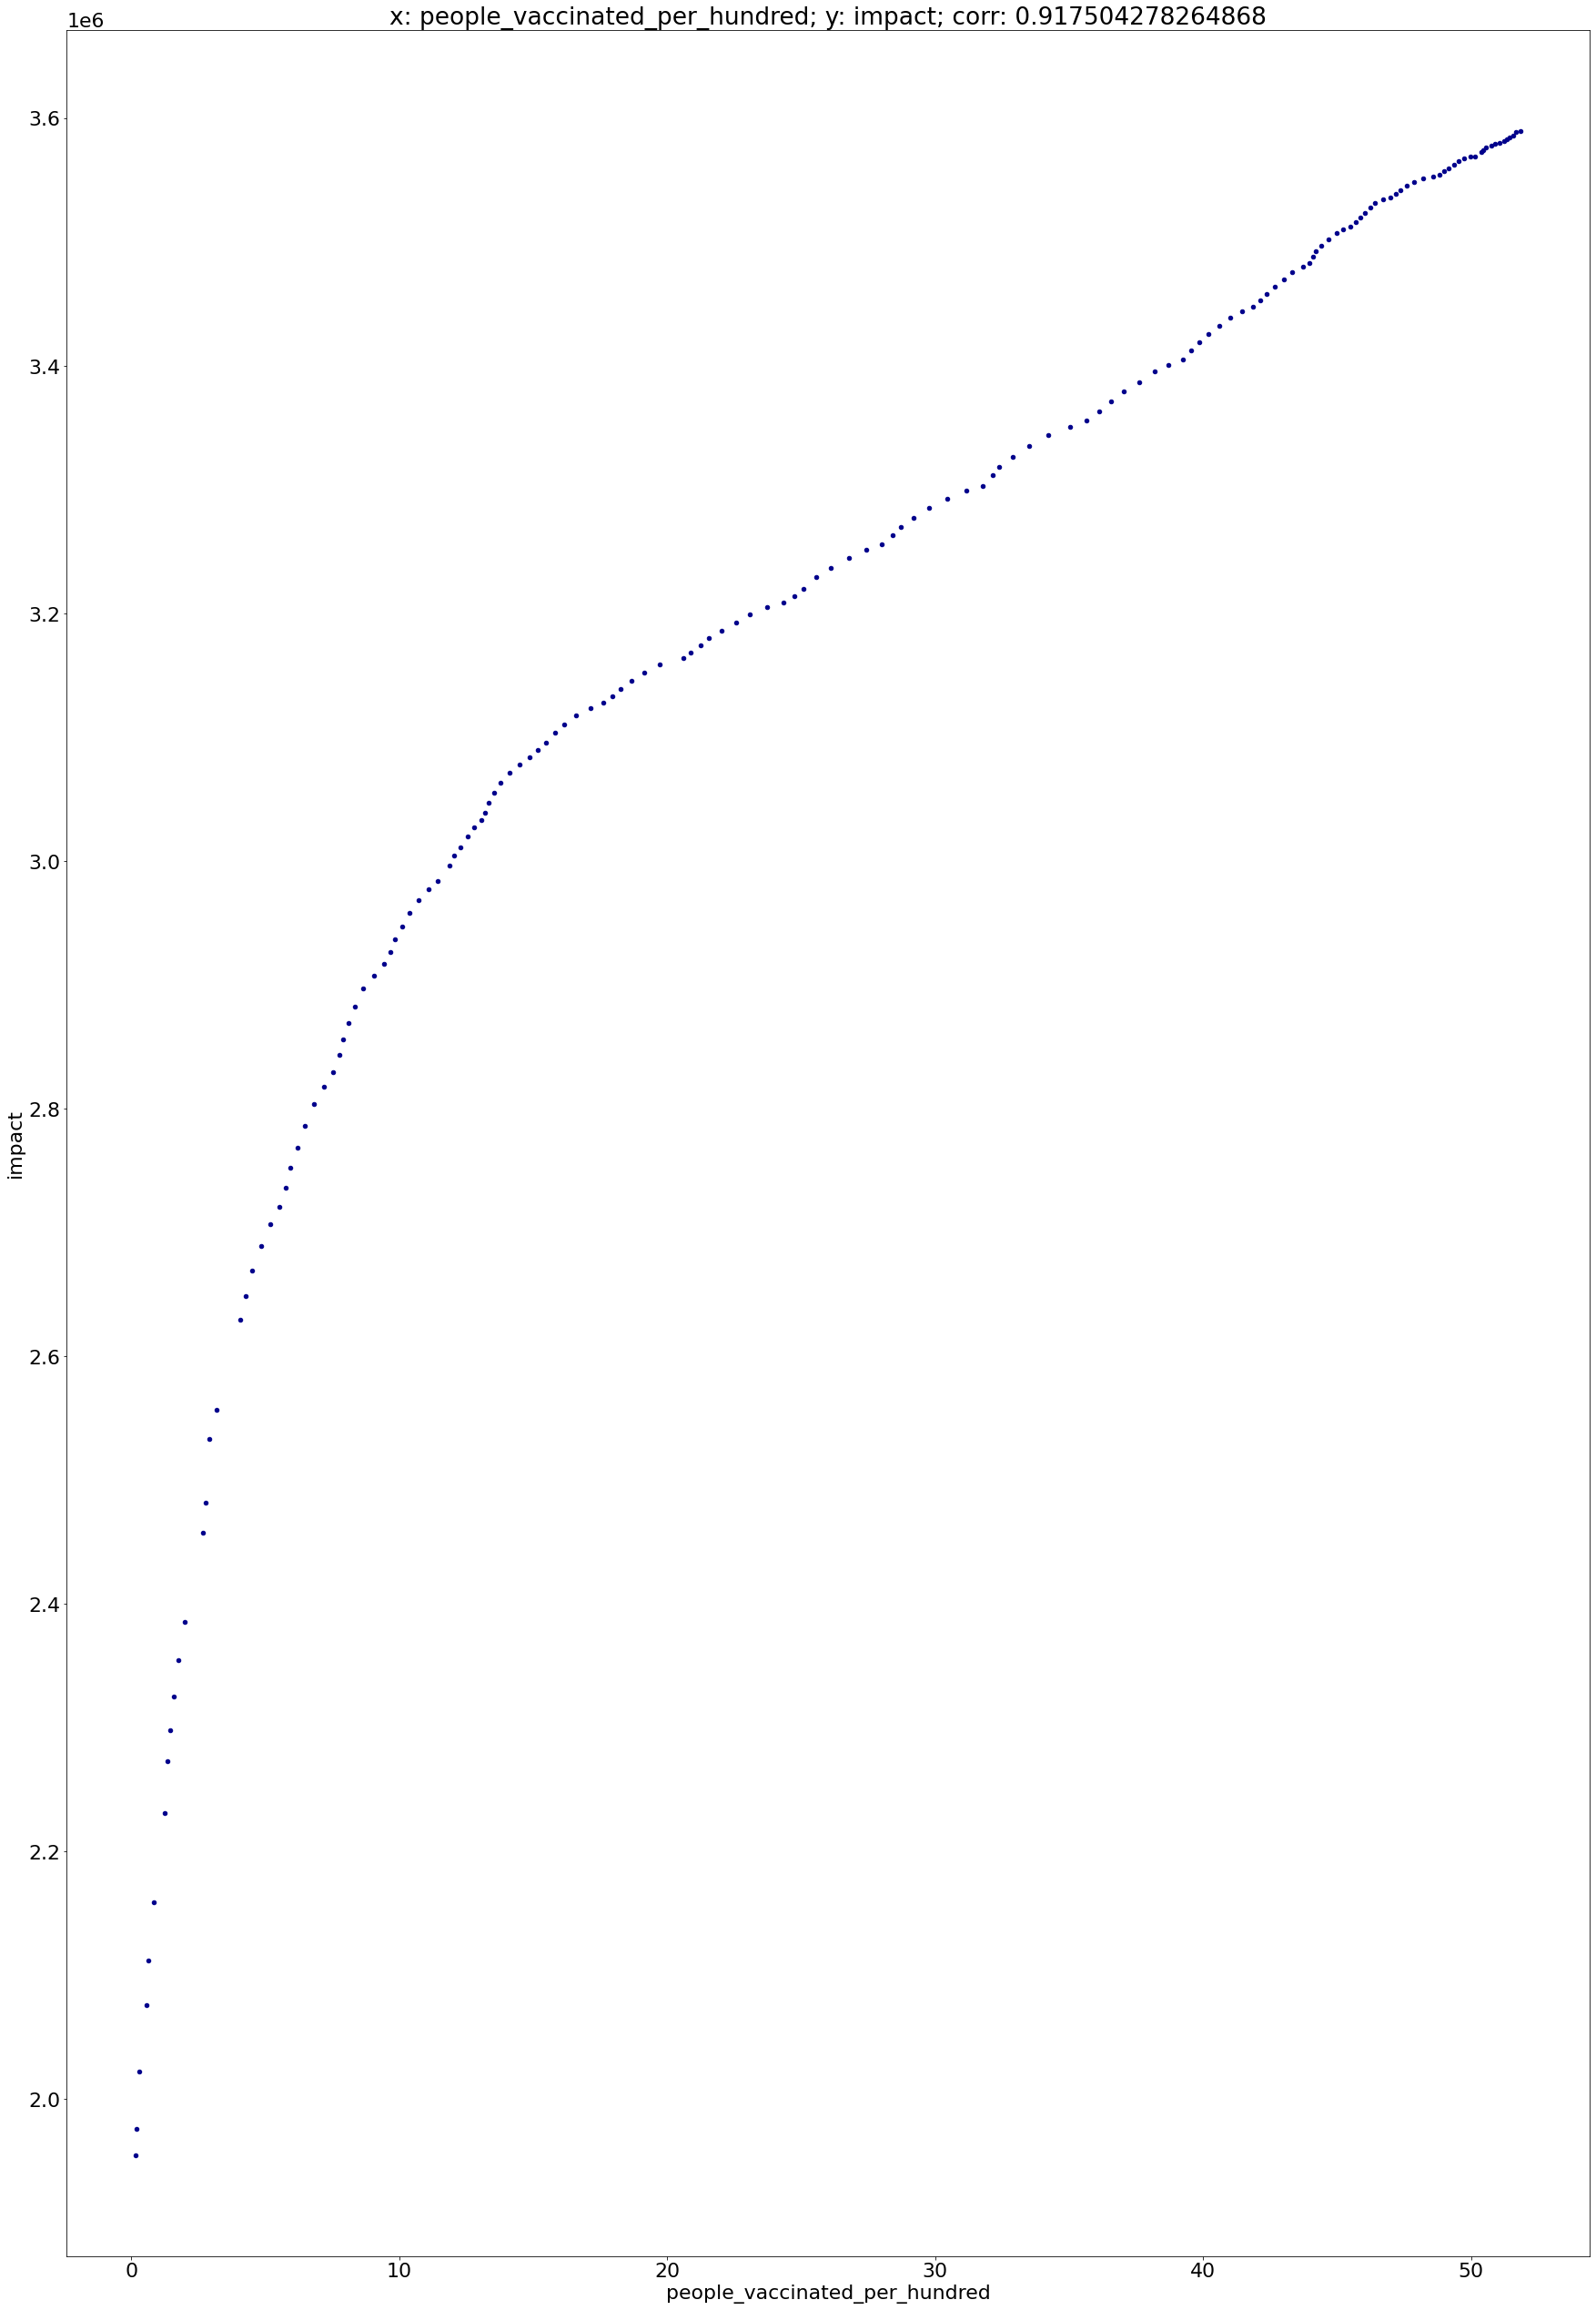

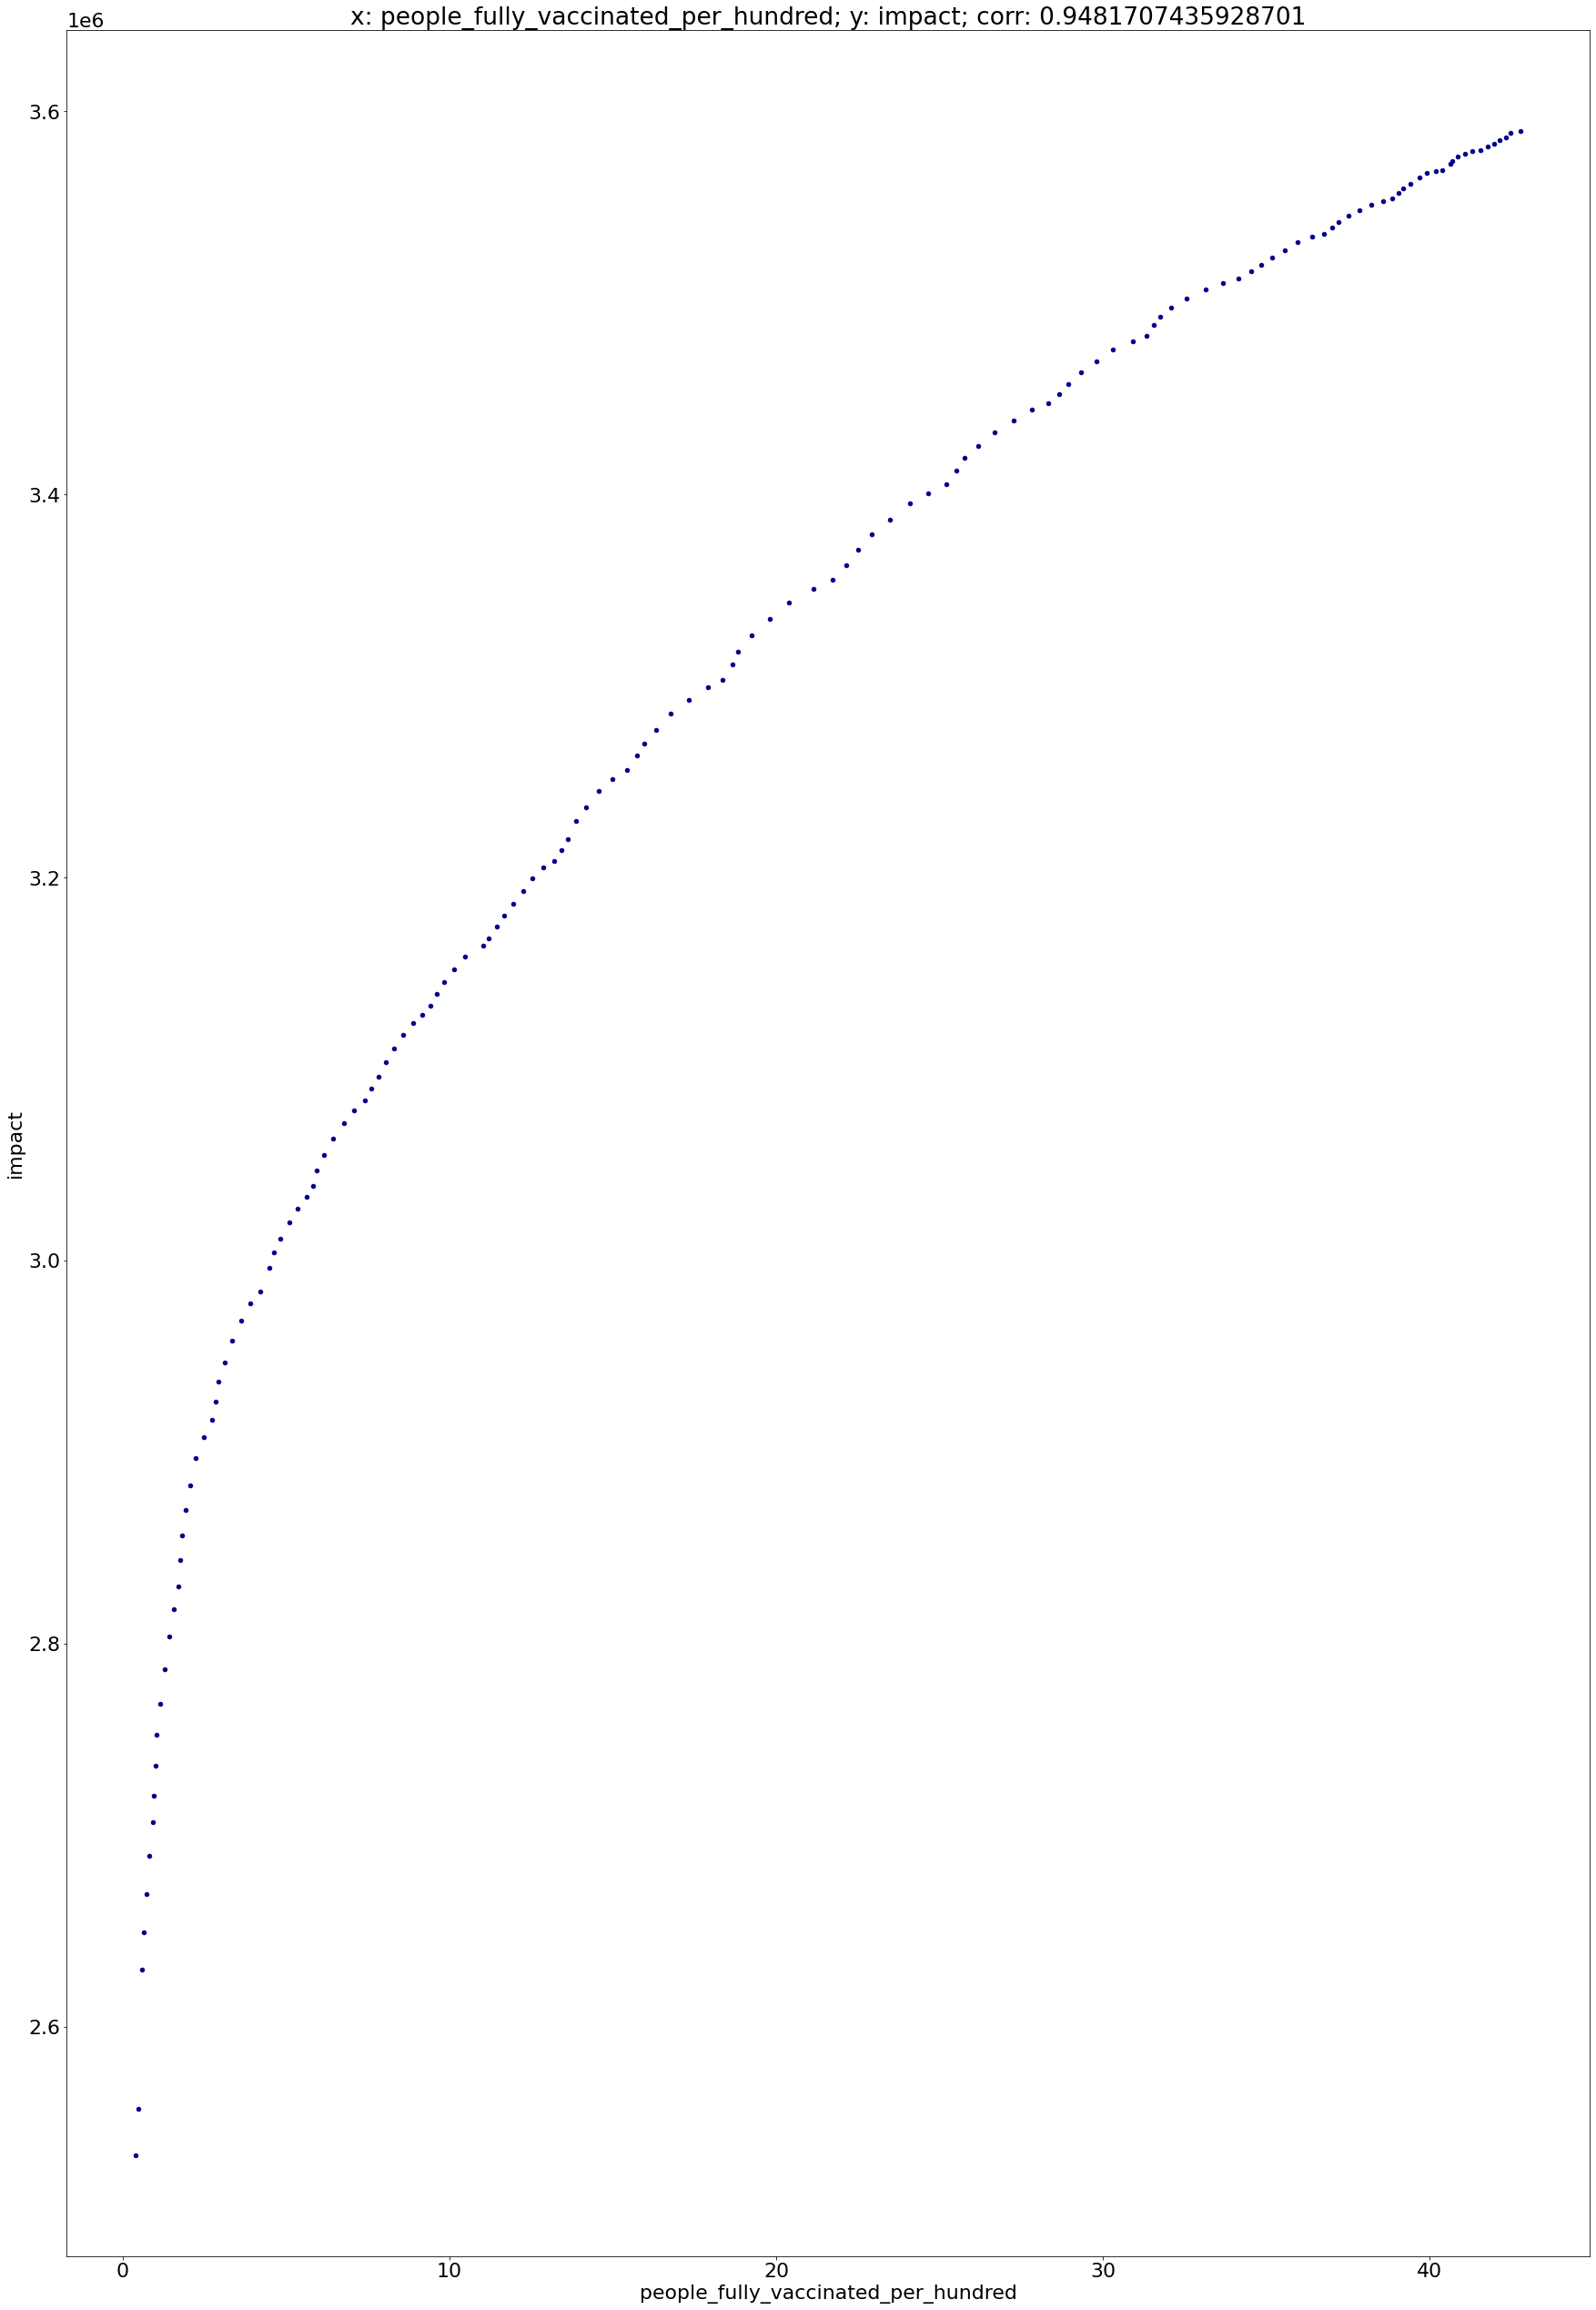

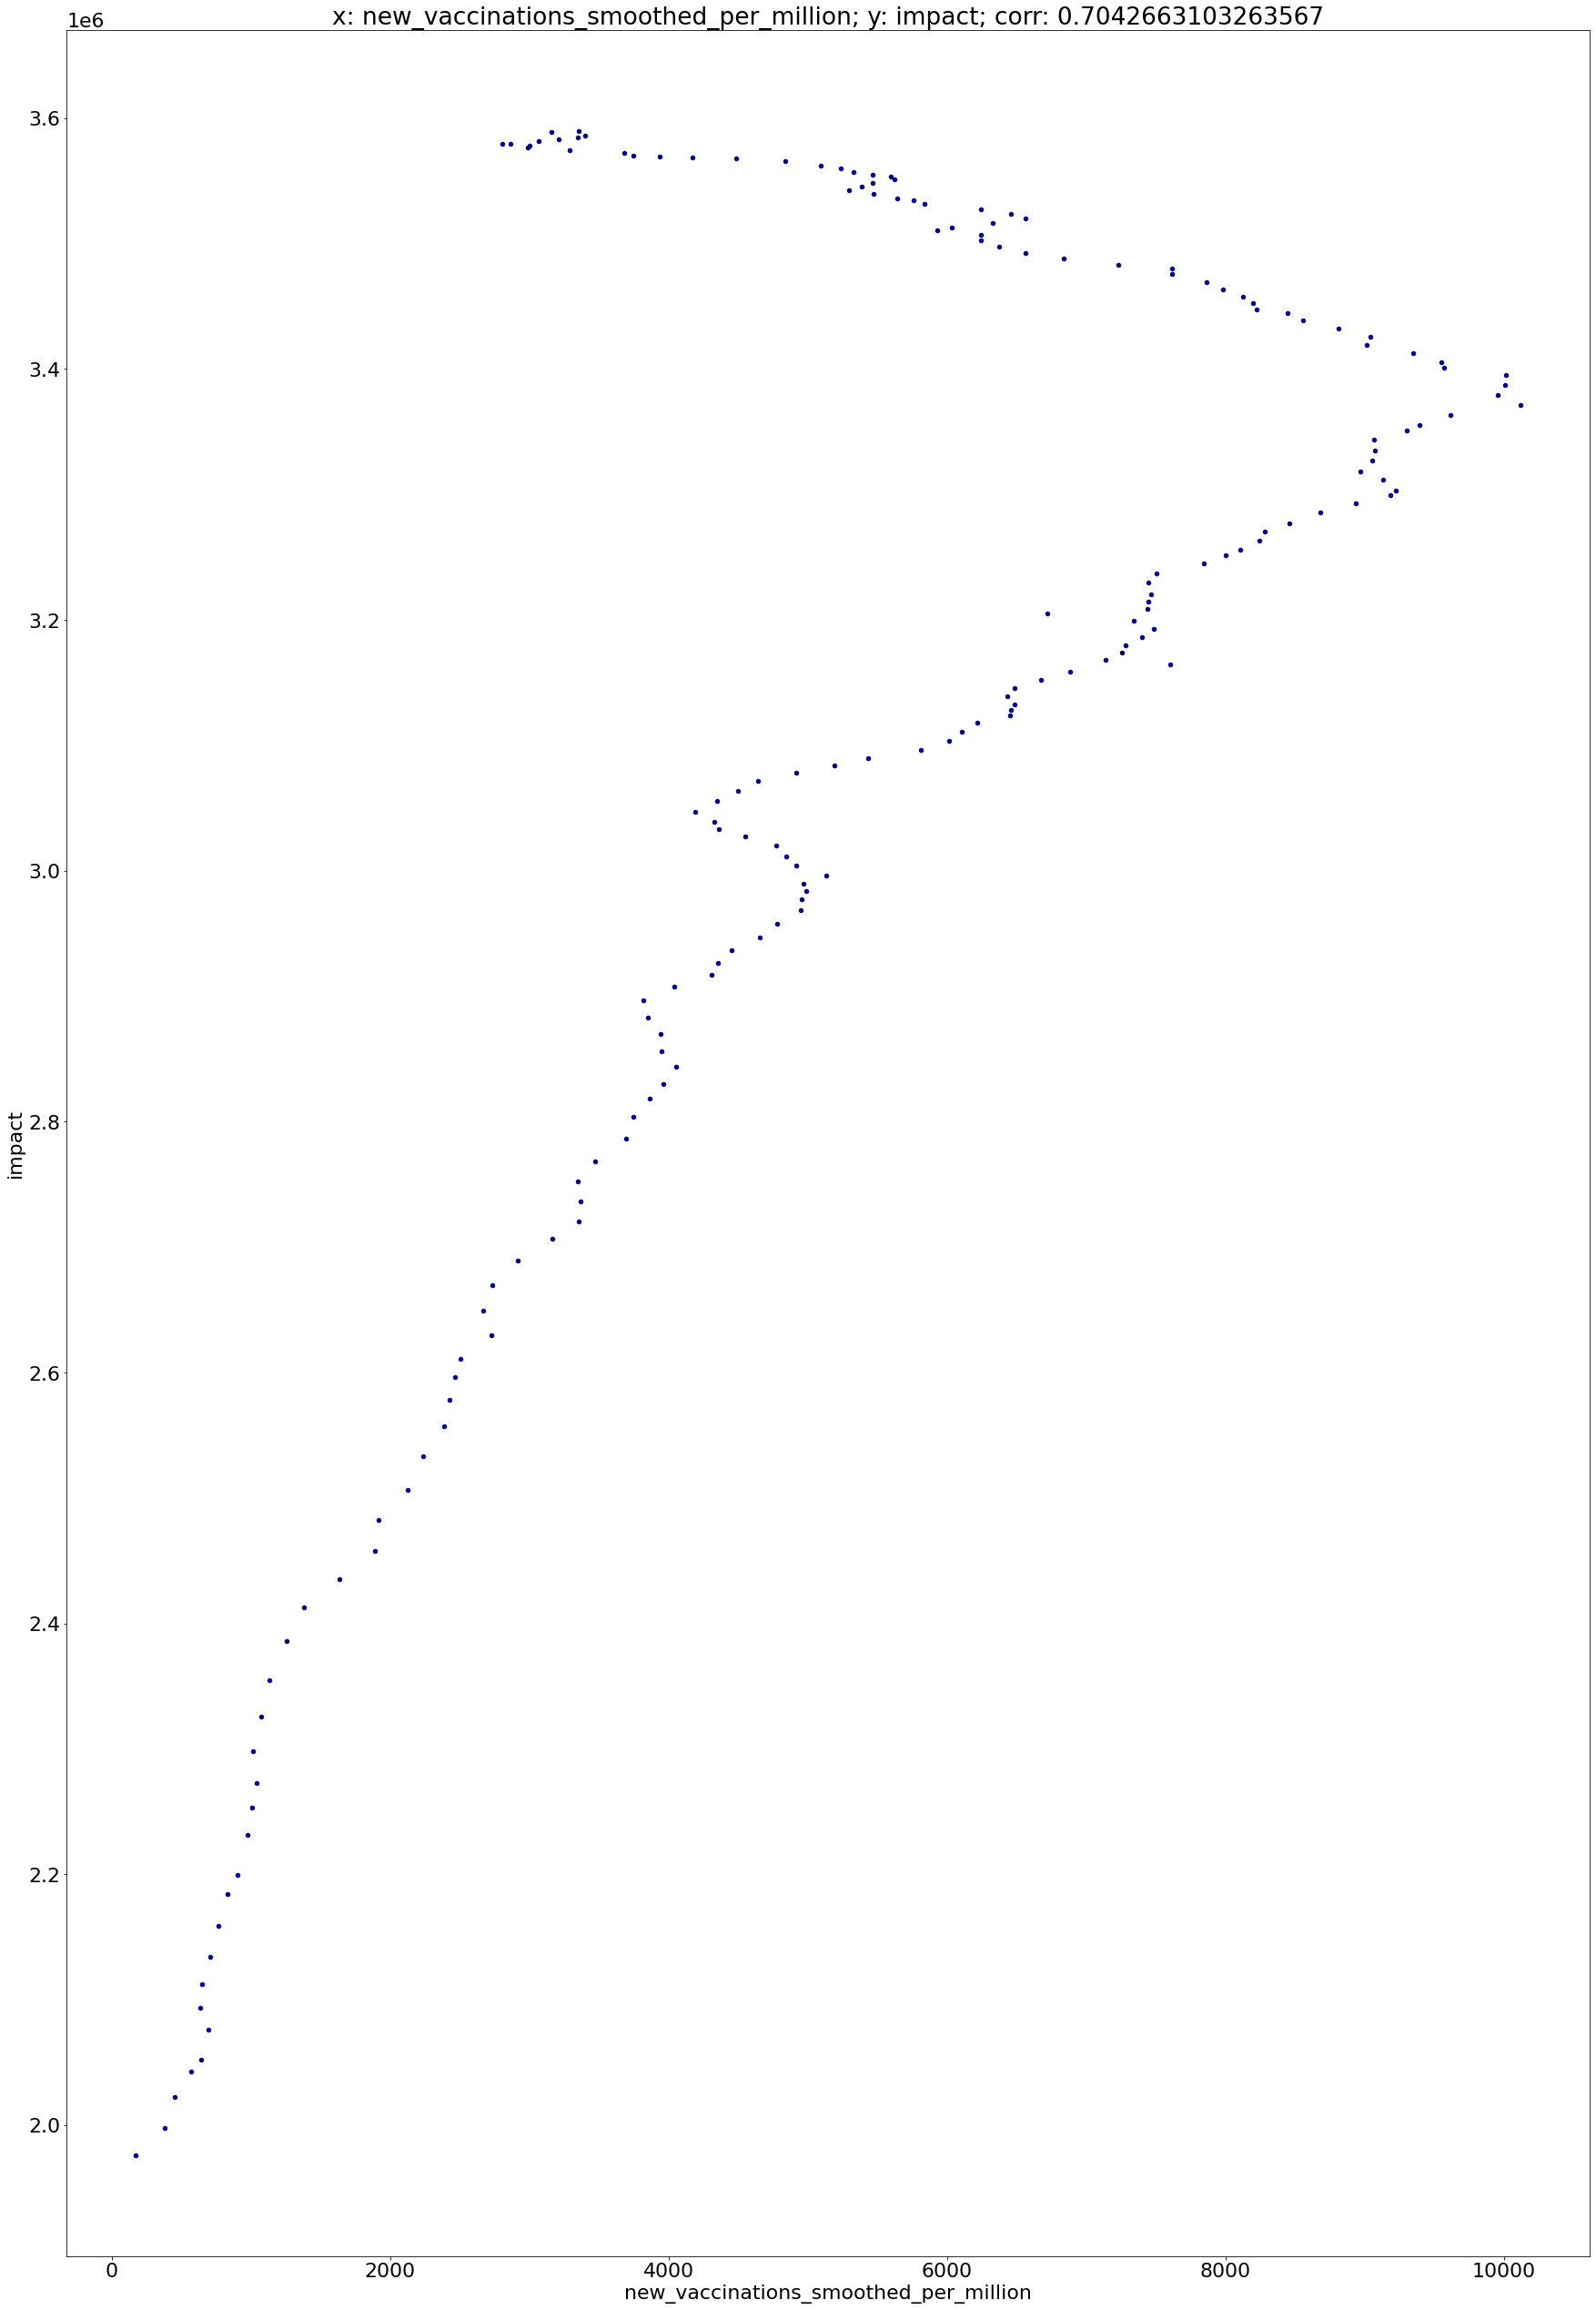

In [11]:
# Plotting scatter plots: impact against vaccination variables
# impact = total_cases * 0.1 + hosp_patients * 0.2 + icu_patients * 0.3 + total_deaths * 0.4
plt.figure()
dep = 'impact'
ind = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million']
for i, j in enumerate(ind):
    correlation = df_us[j].corr(df_us[dep])
    ax = df_us.plot.scatter(x=j, y=dep, c='DarkBlue', title="x: {x_name}; y: {y_name}; corr: {corr}".format(x_name = j, y_name = dep, corr = correlation), figsize=(30,45), fontsize=22)

<Figure size 432x288 with 0 Axes>

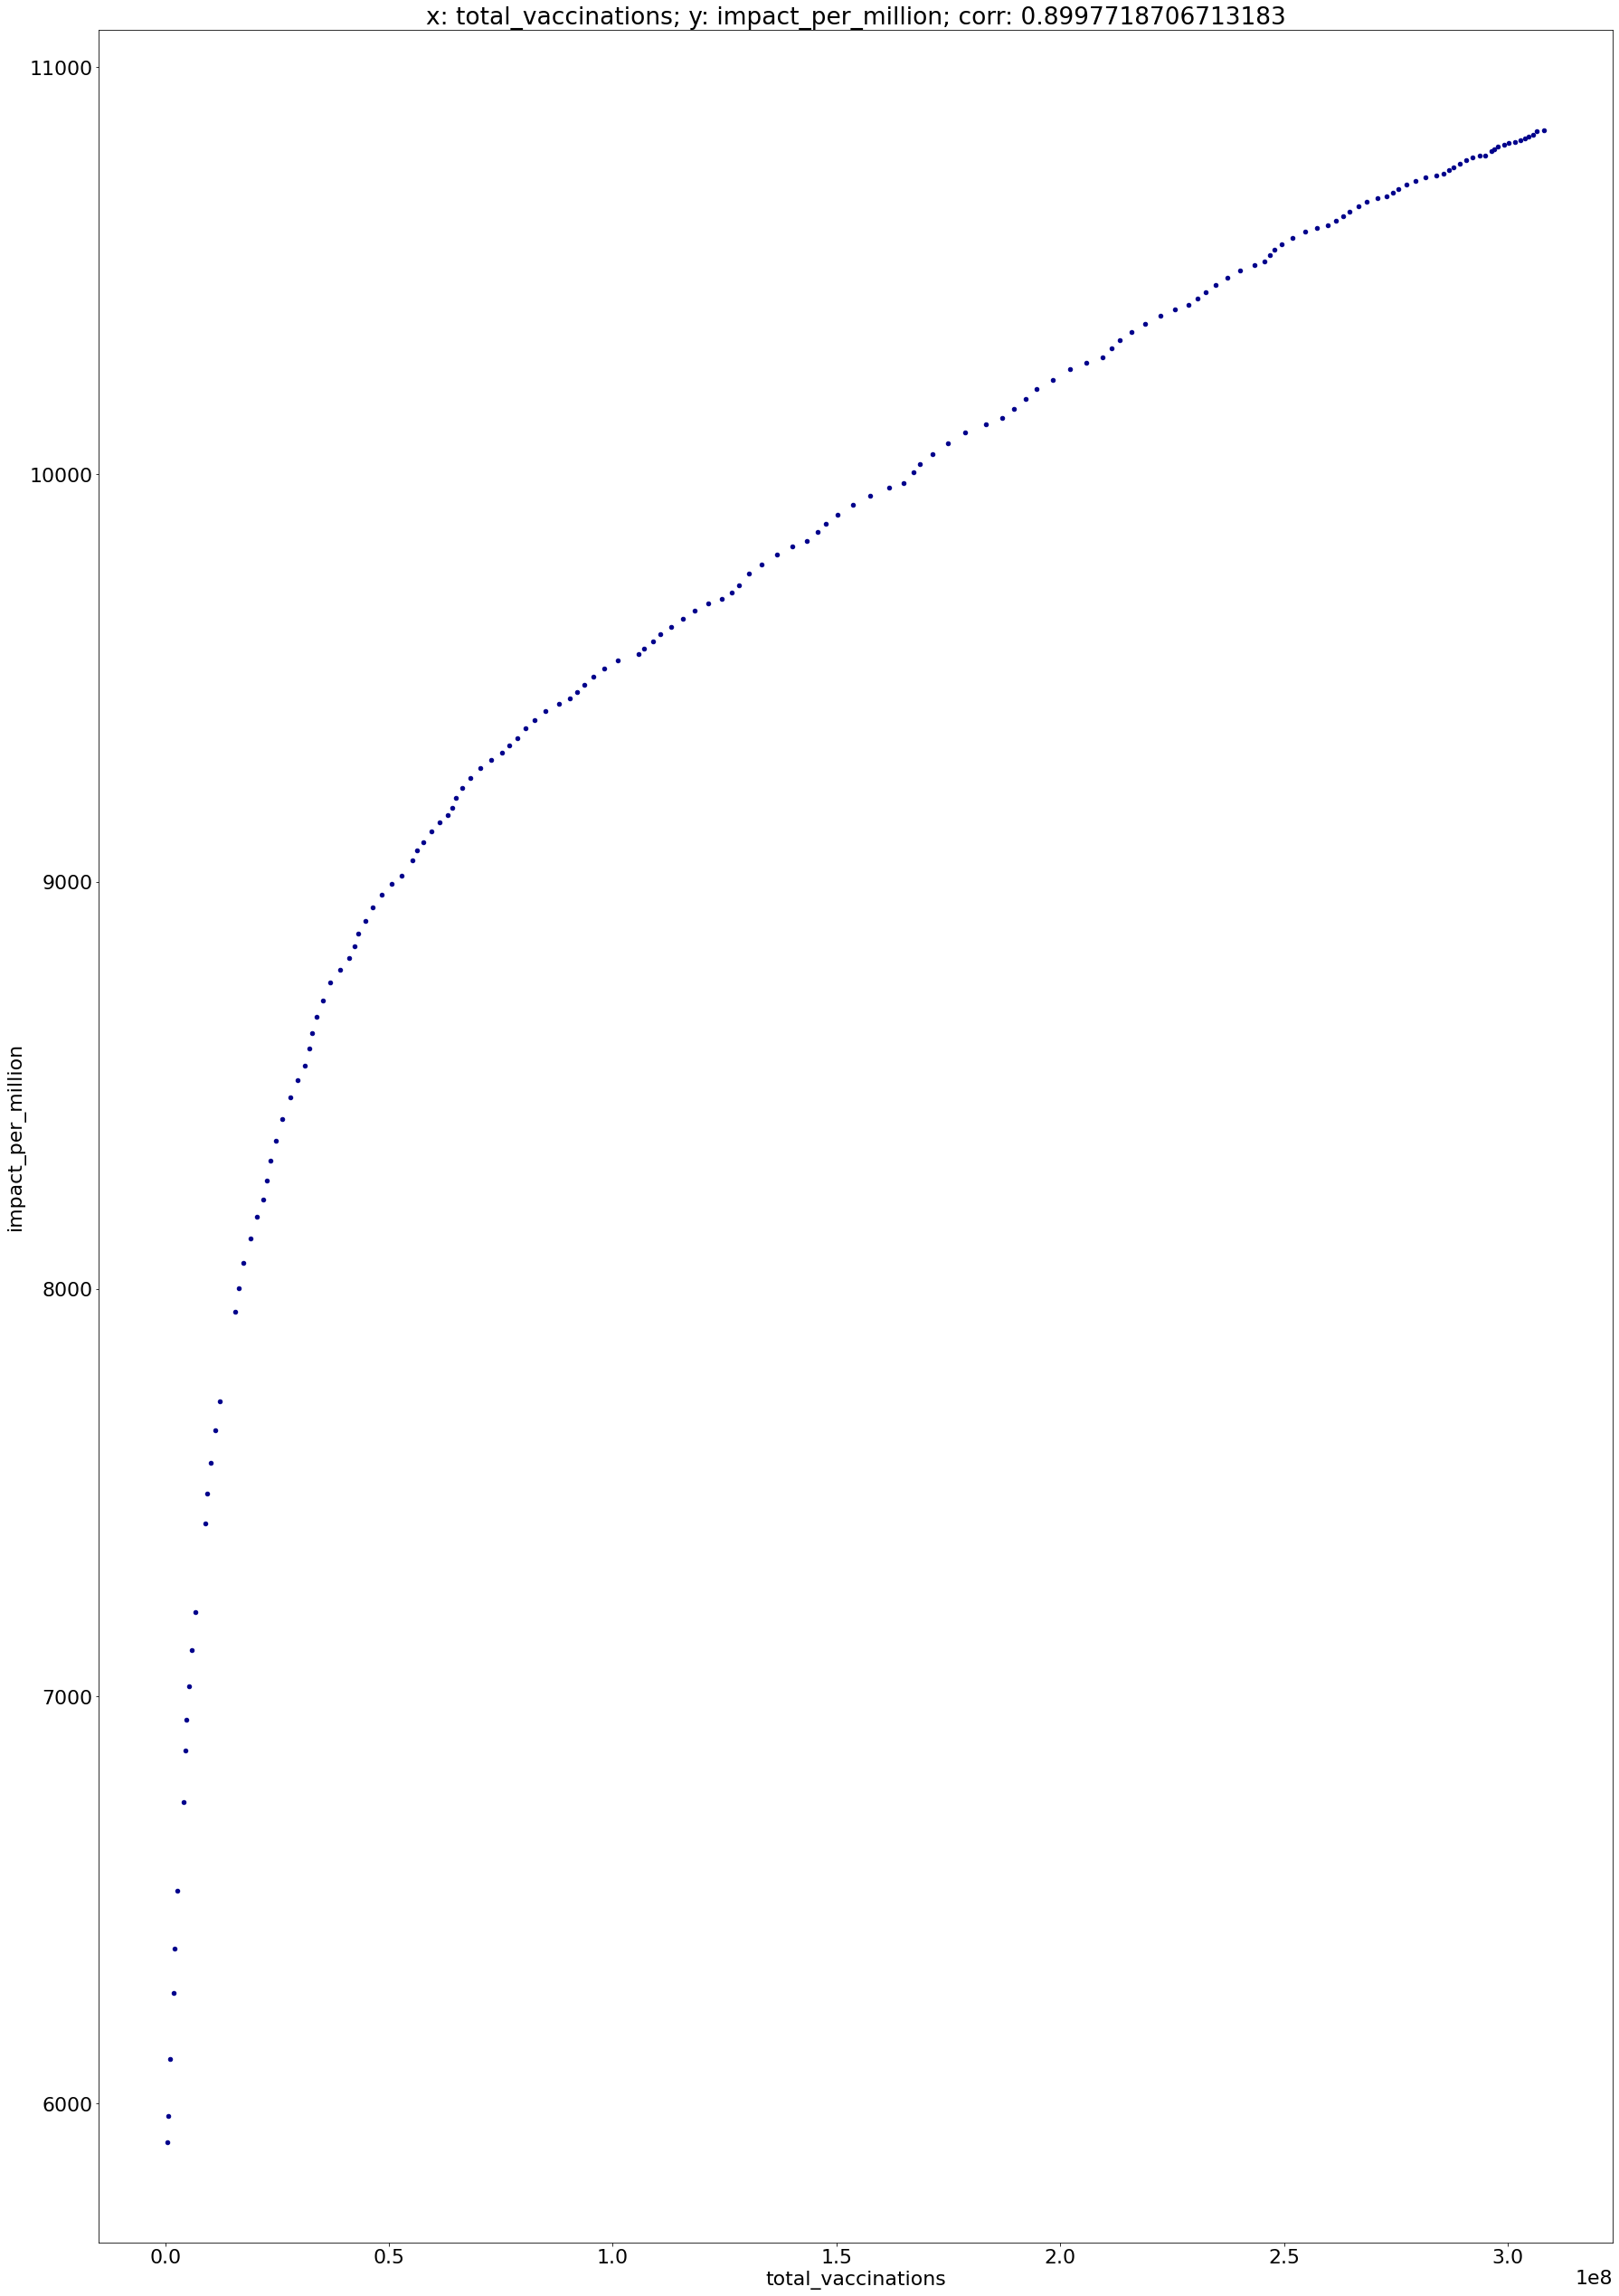

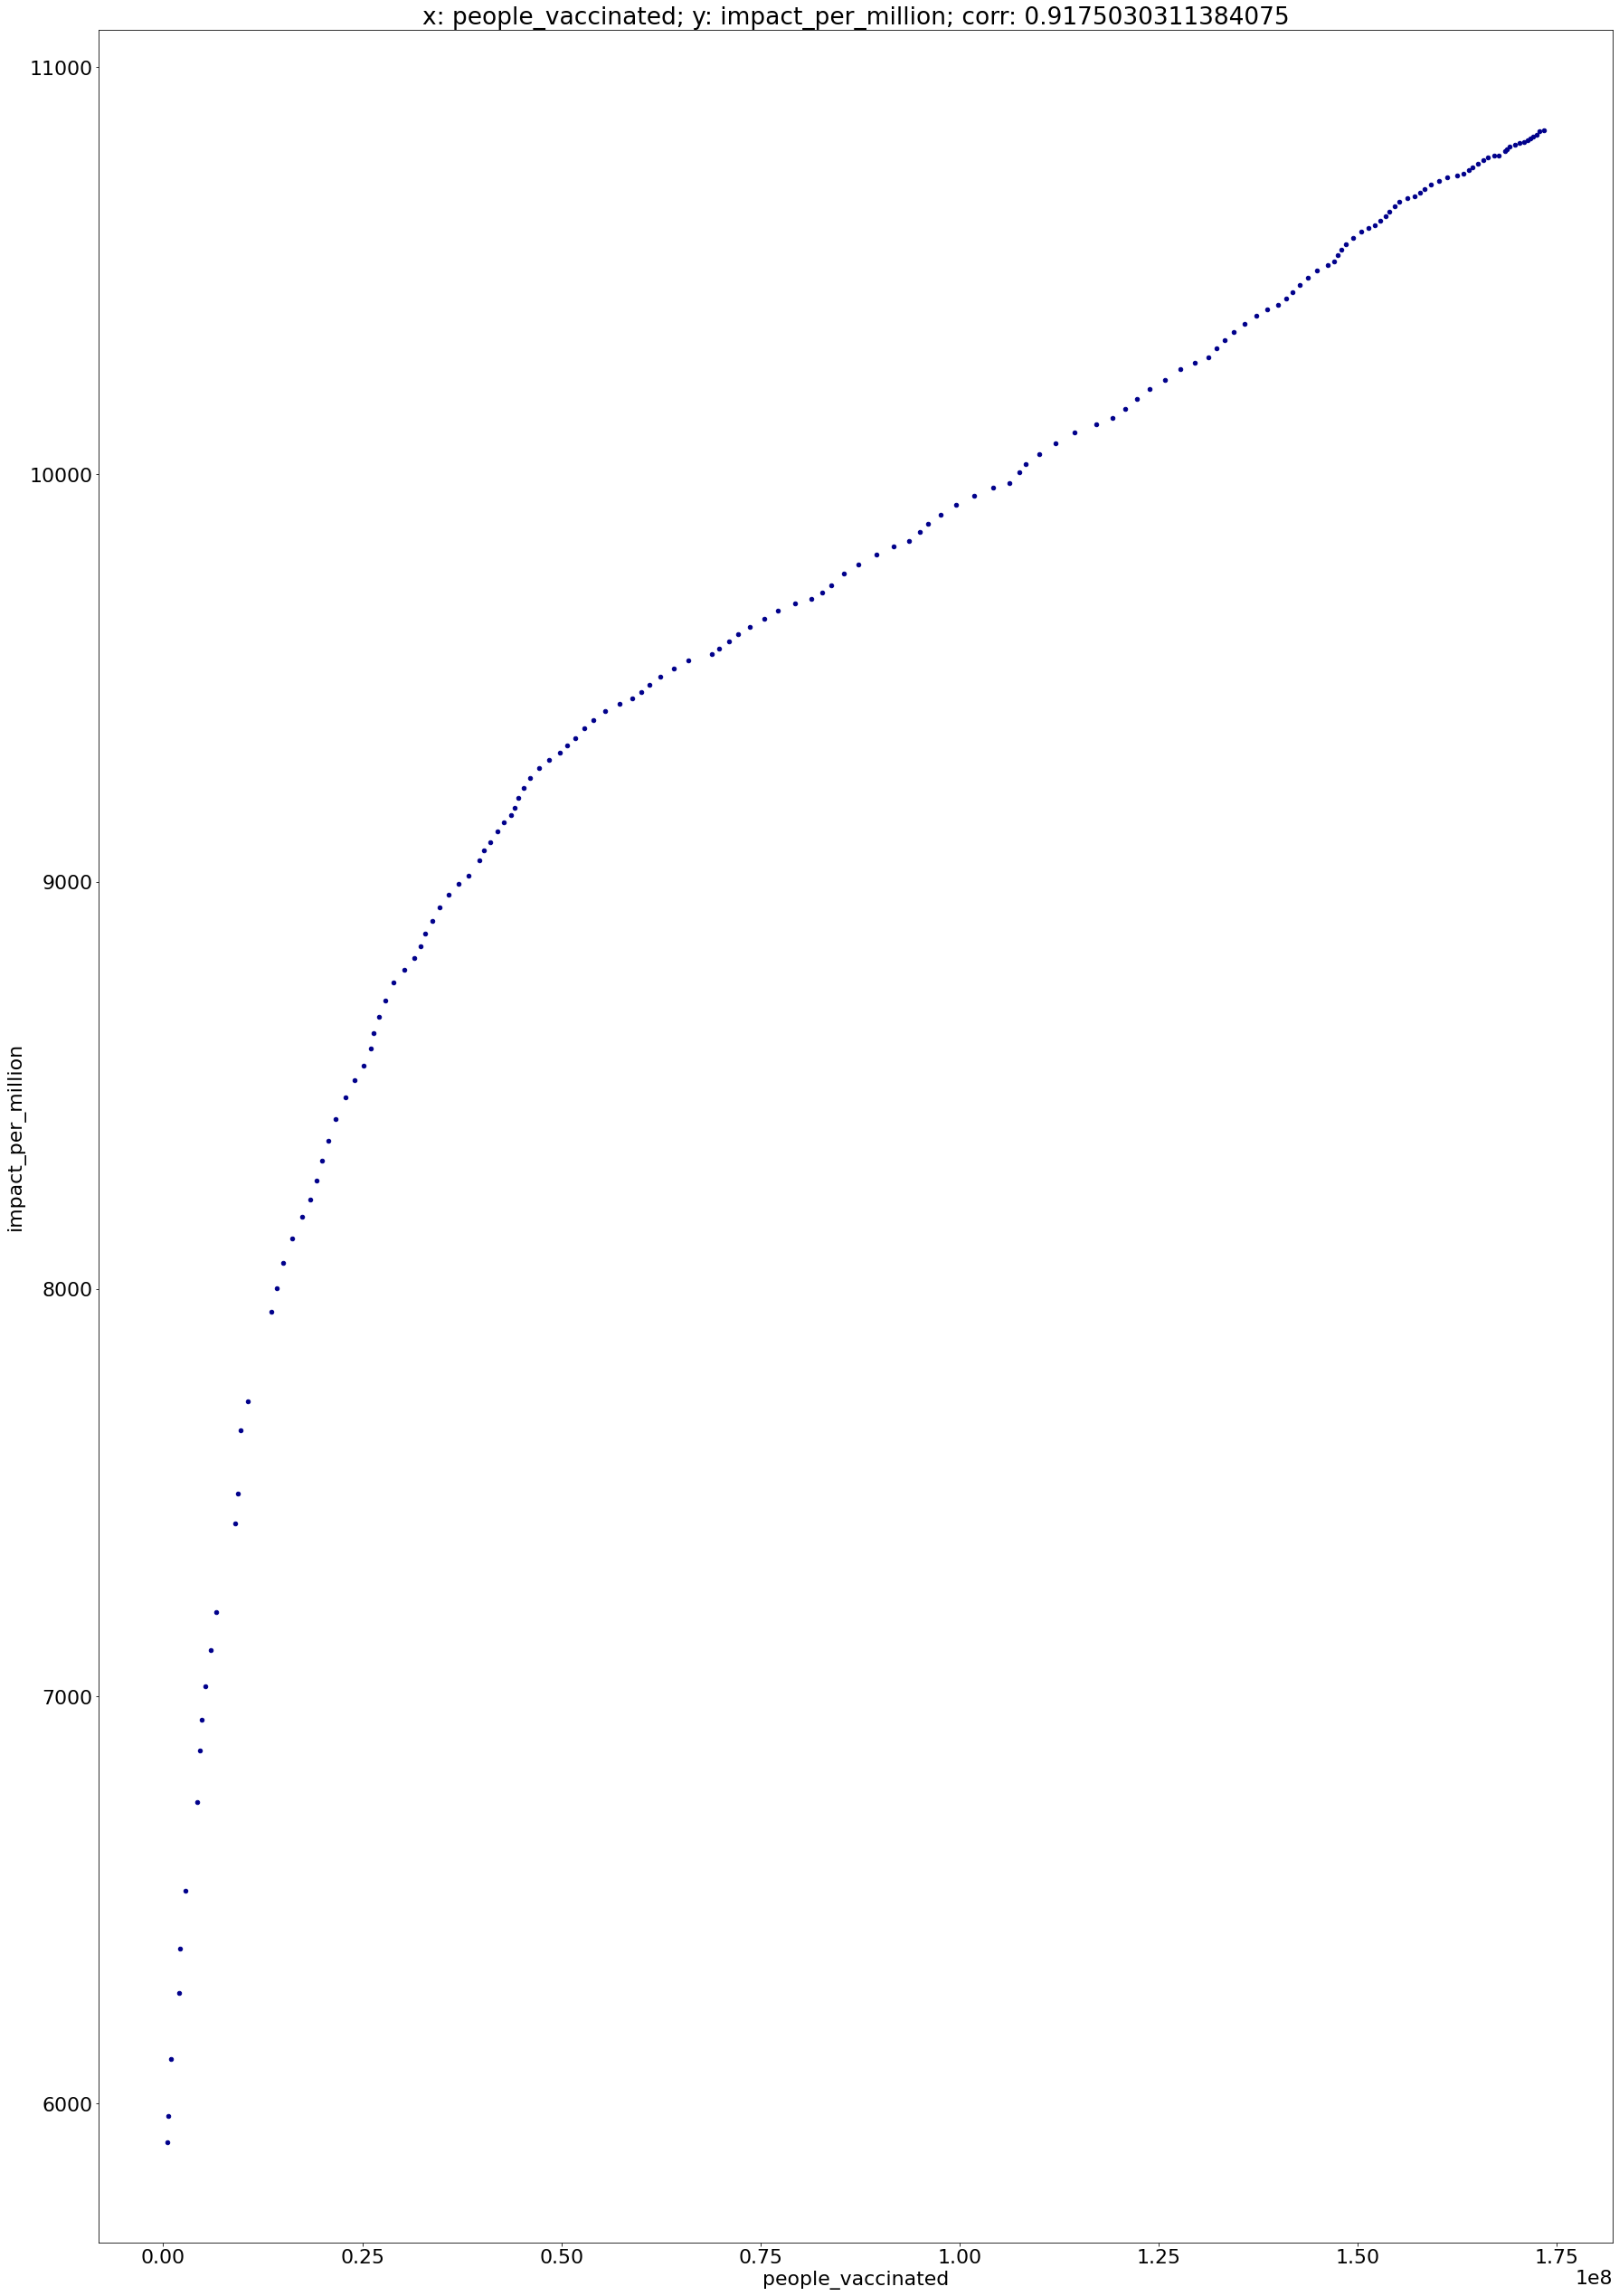

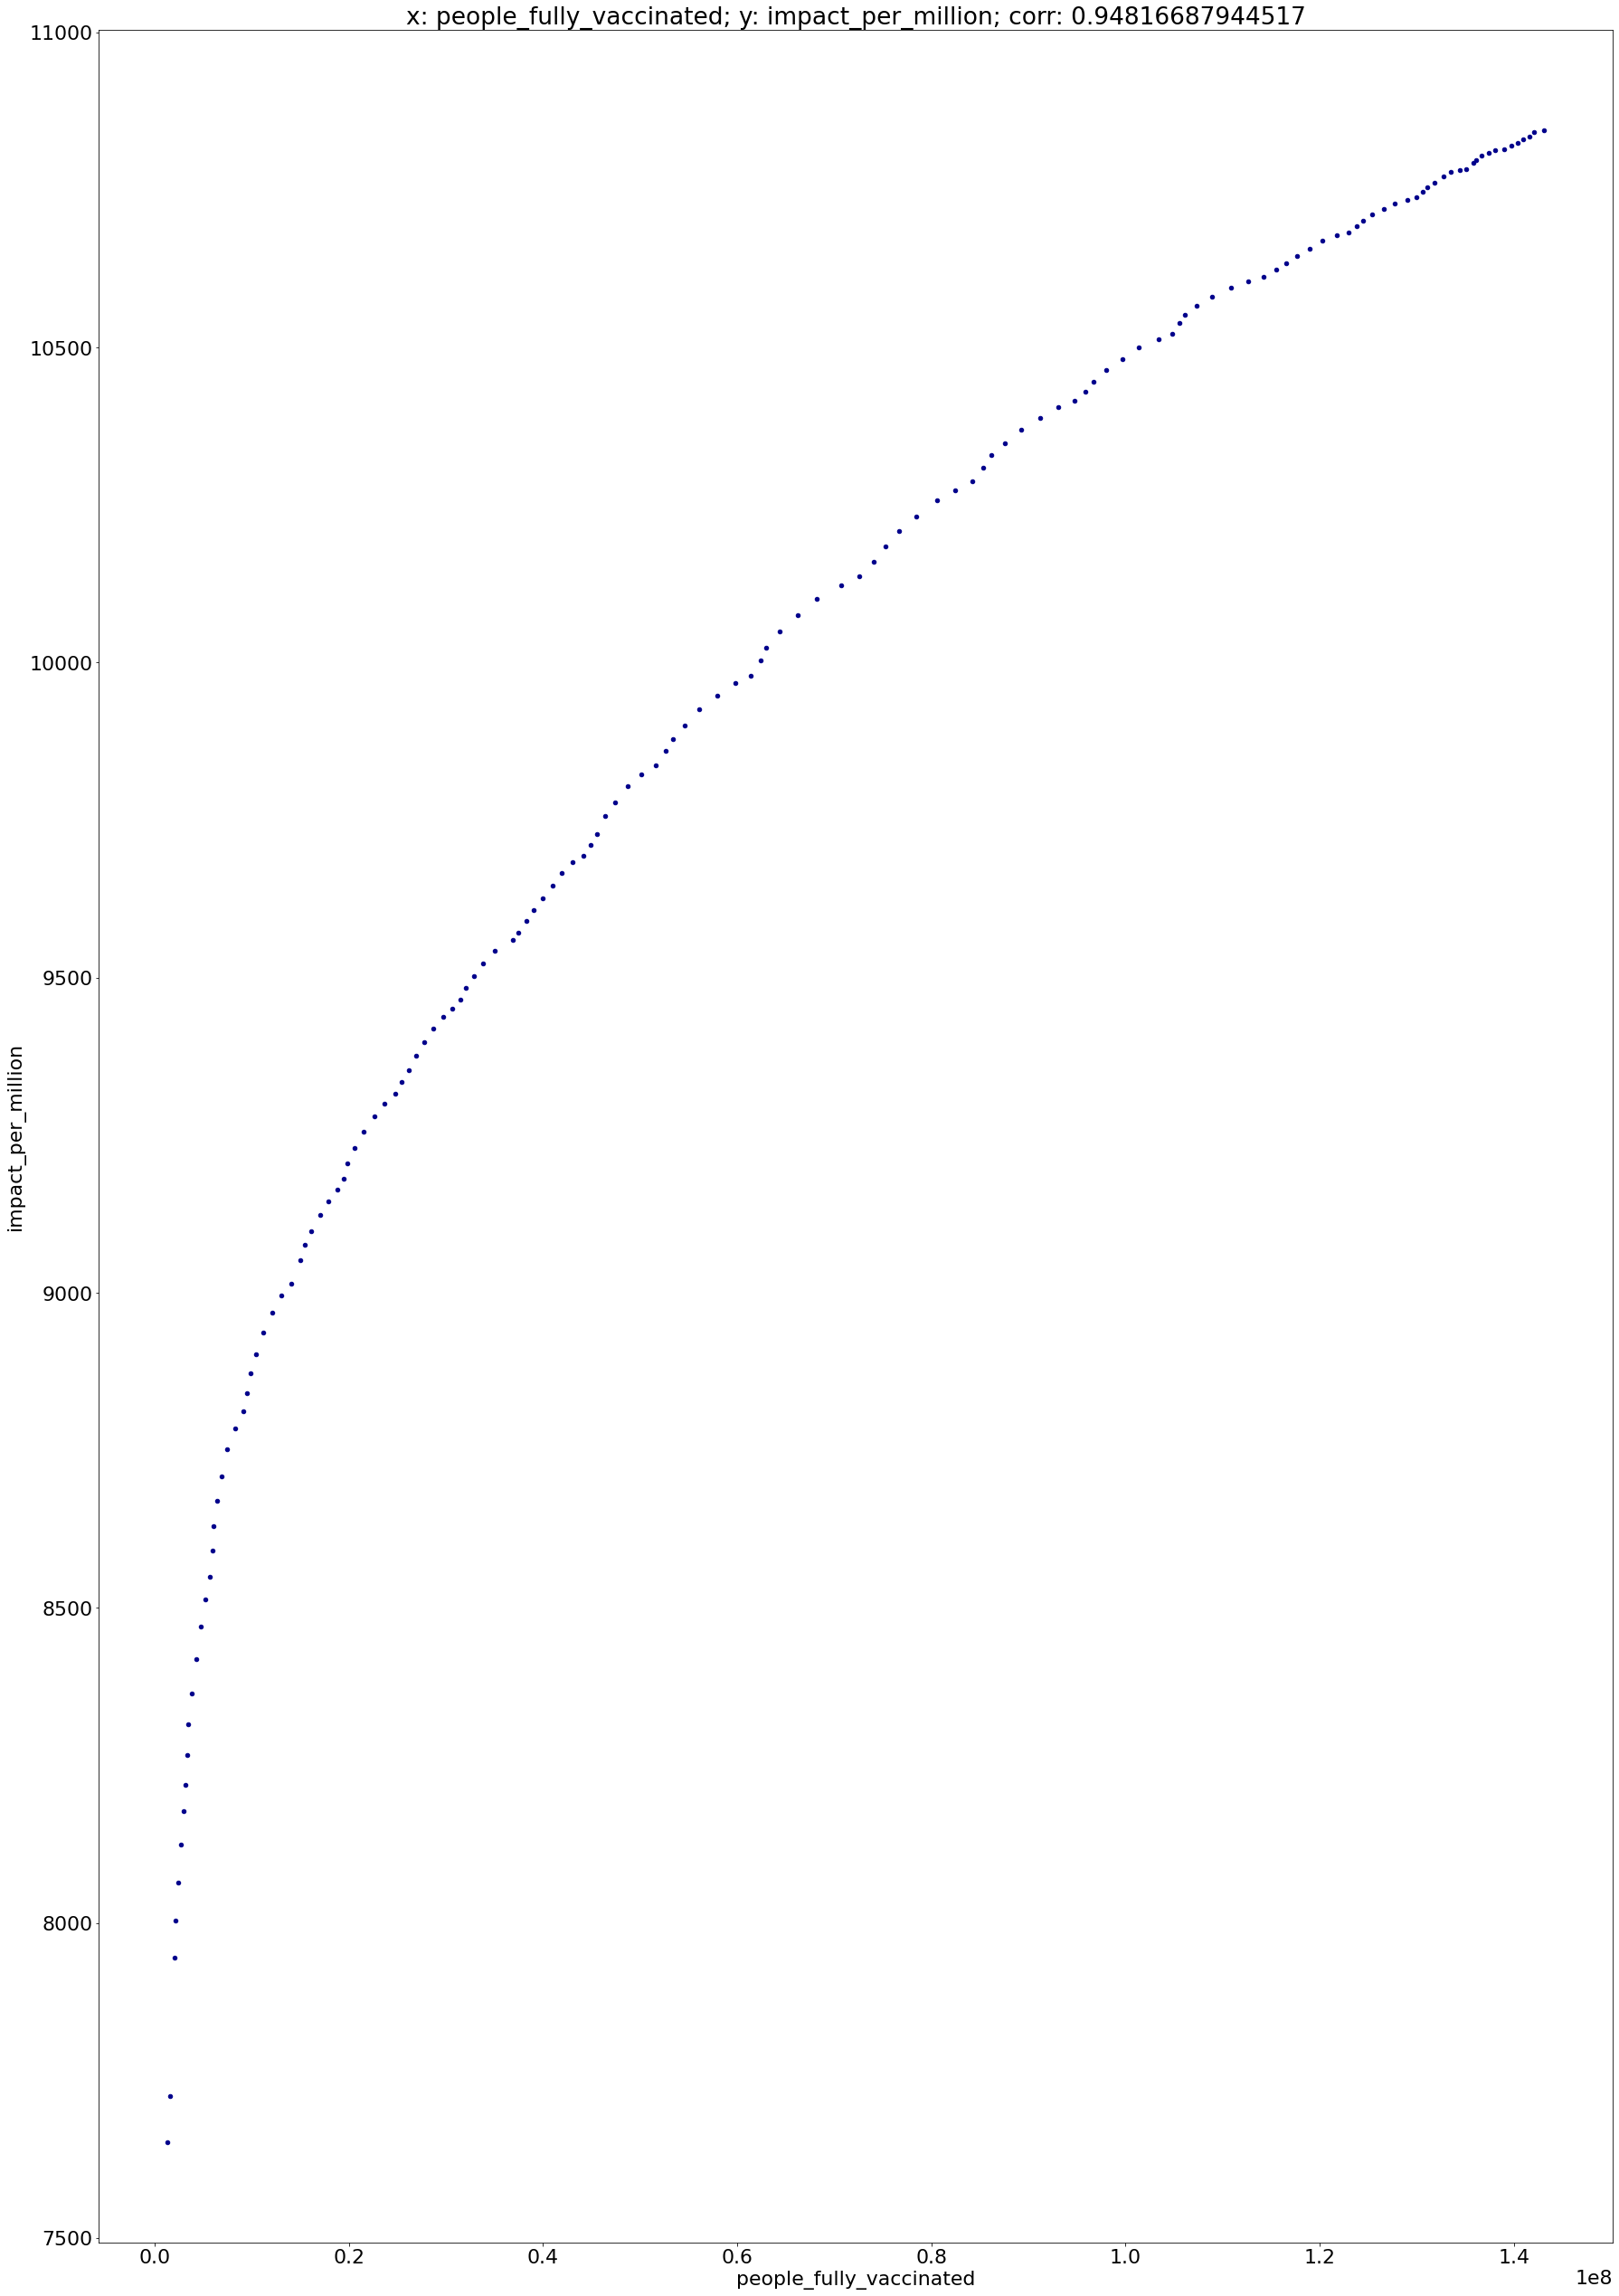

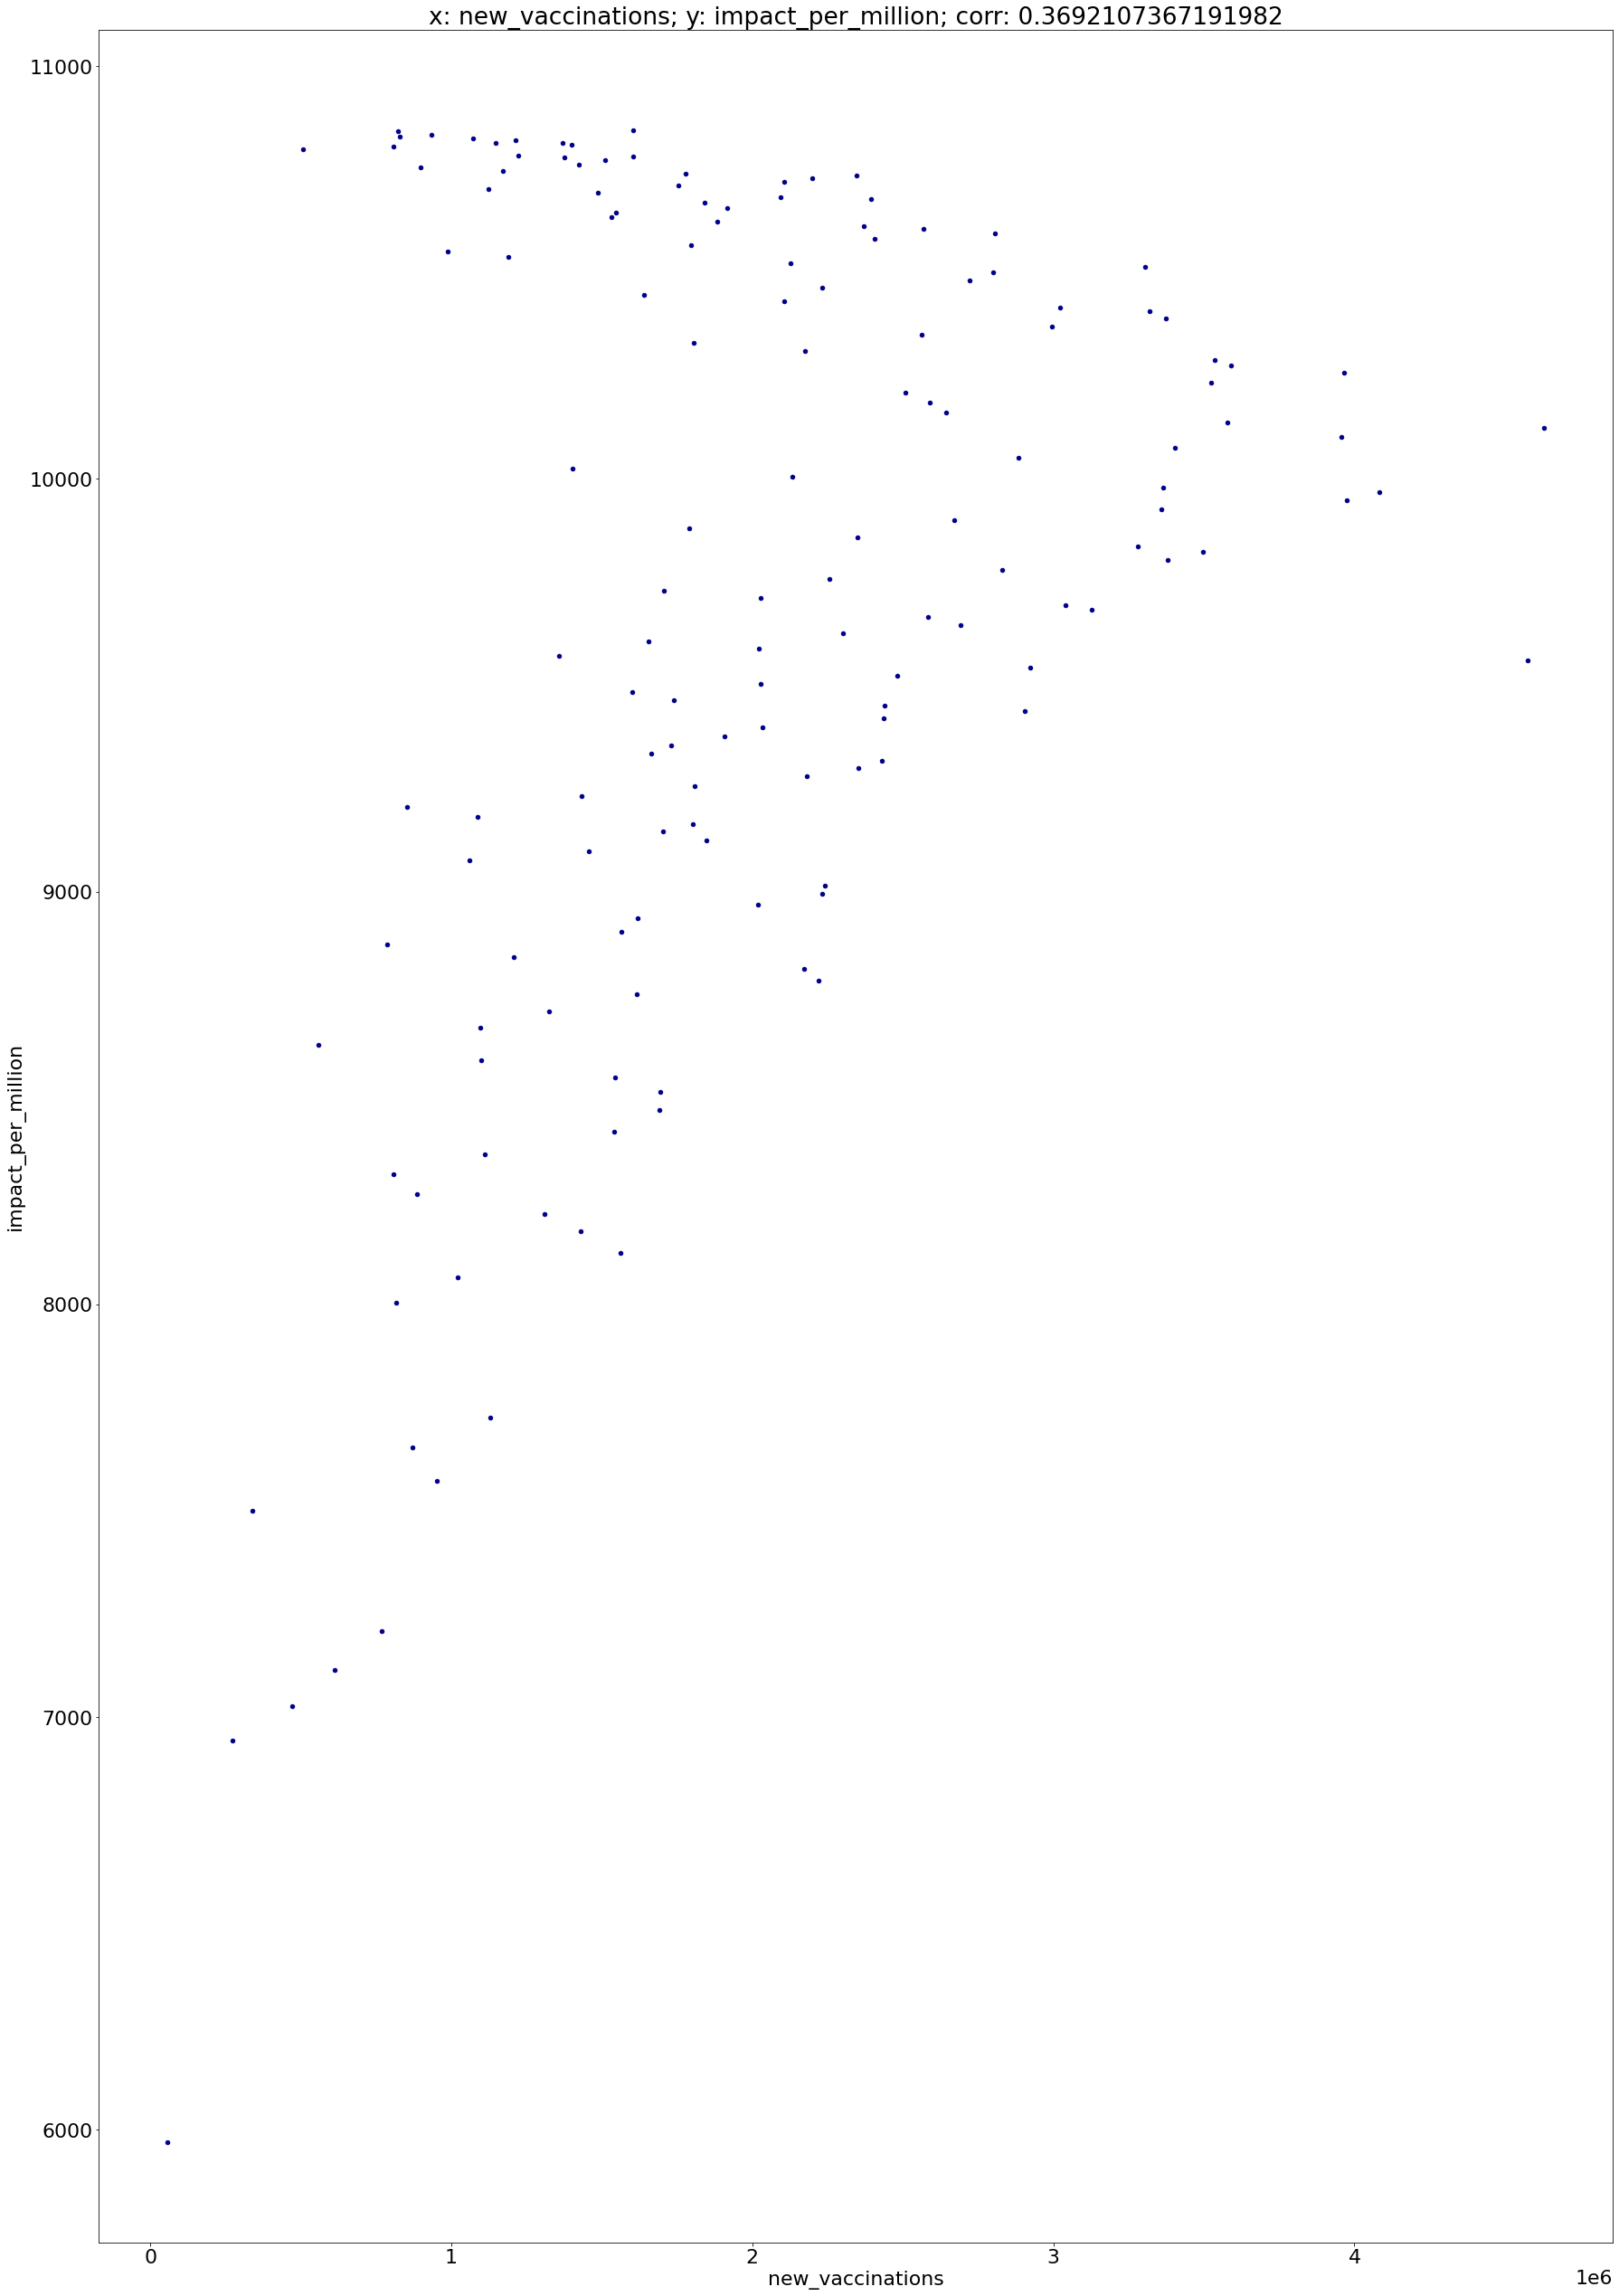

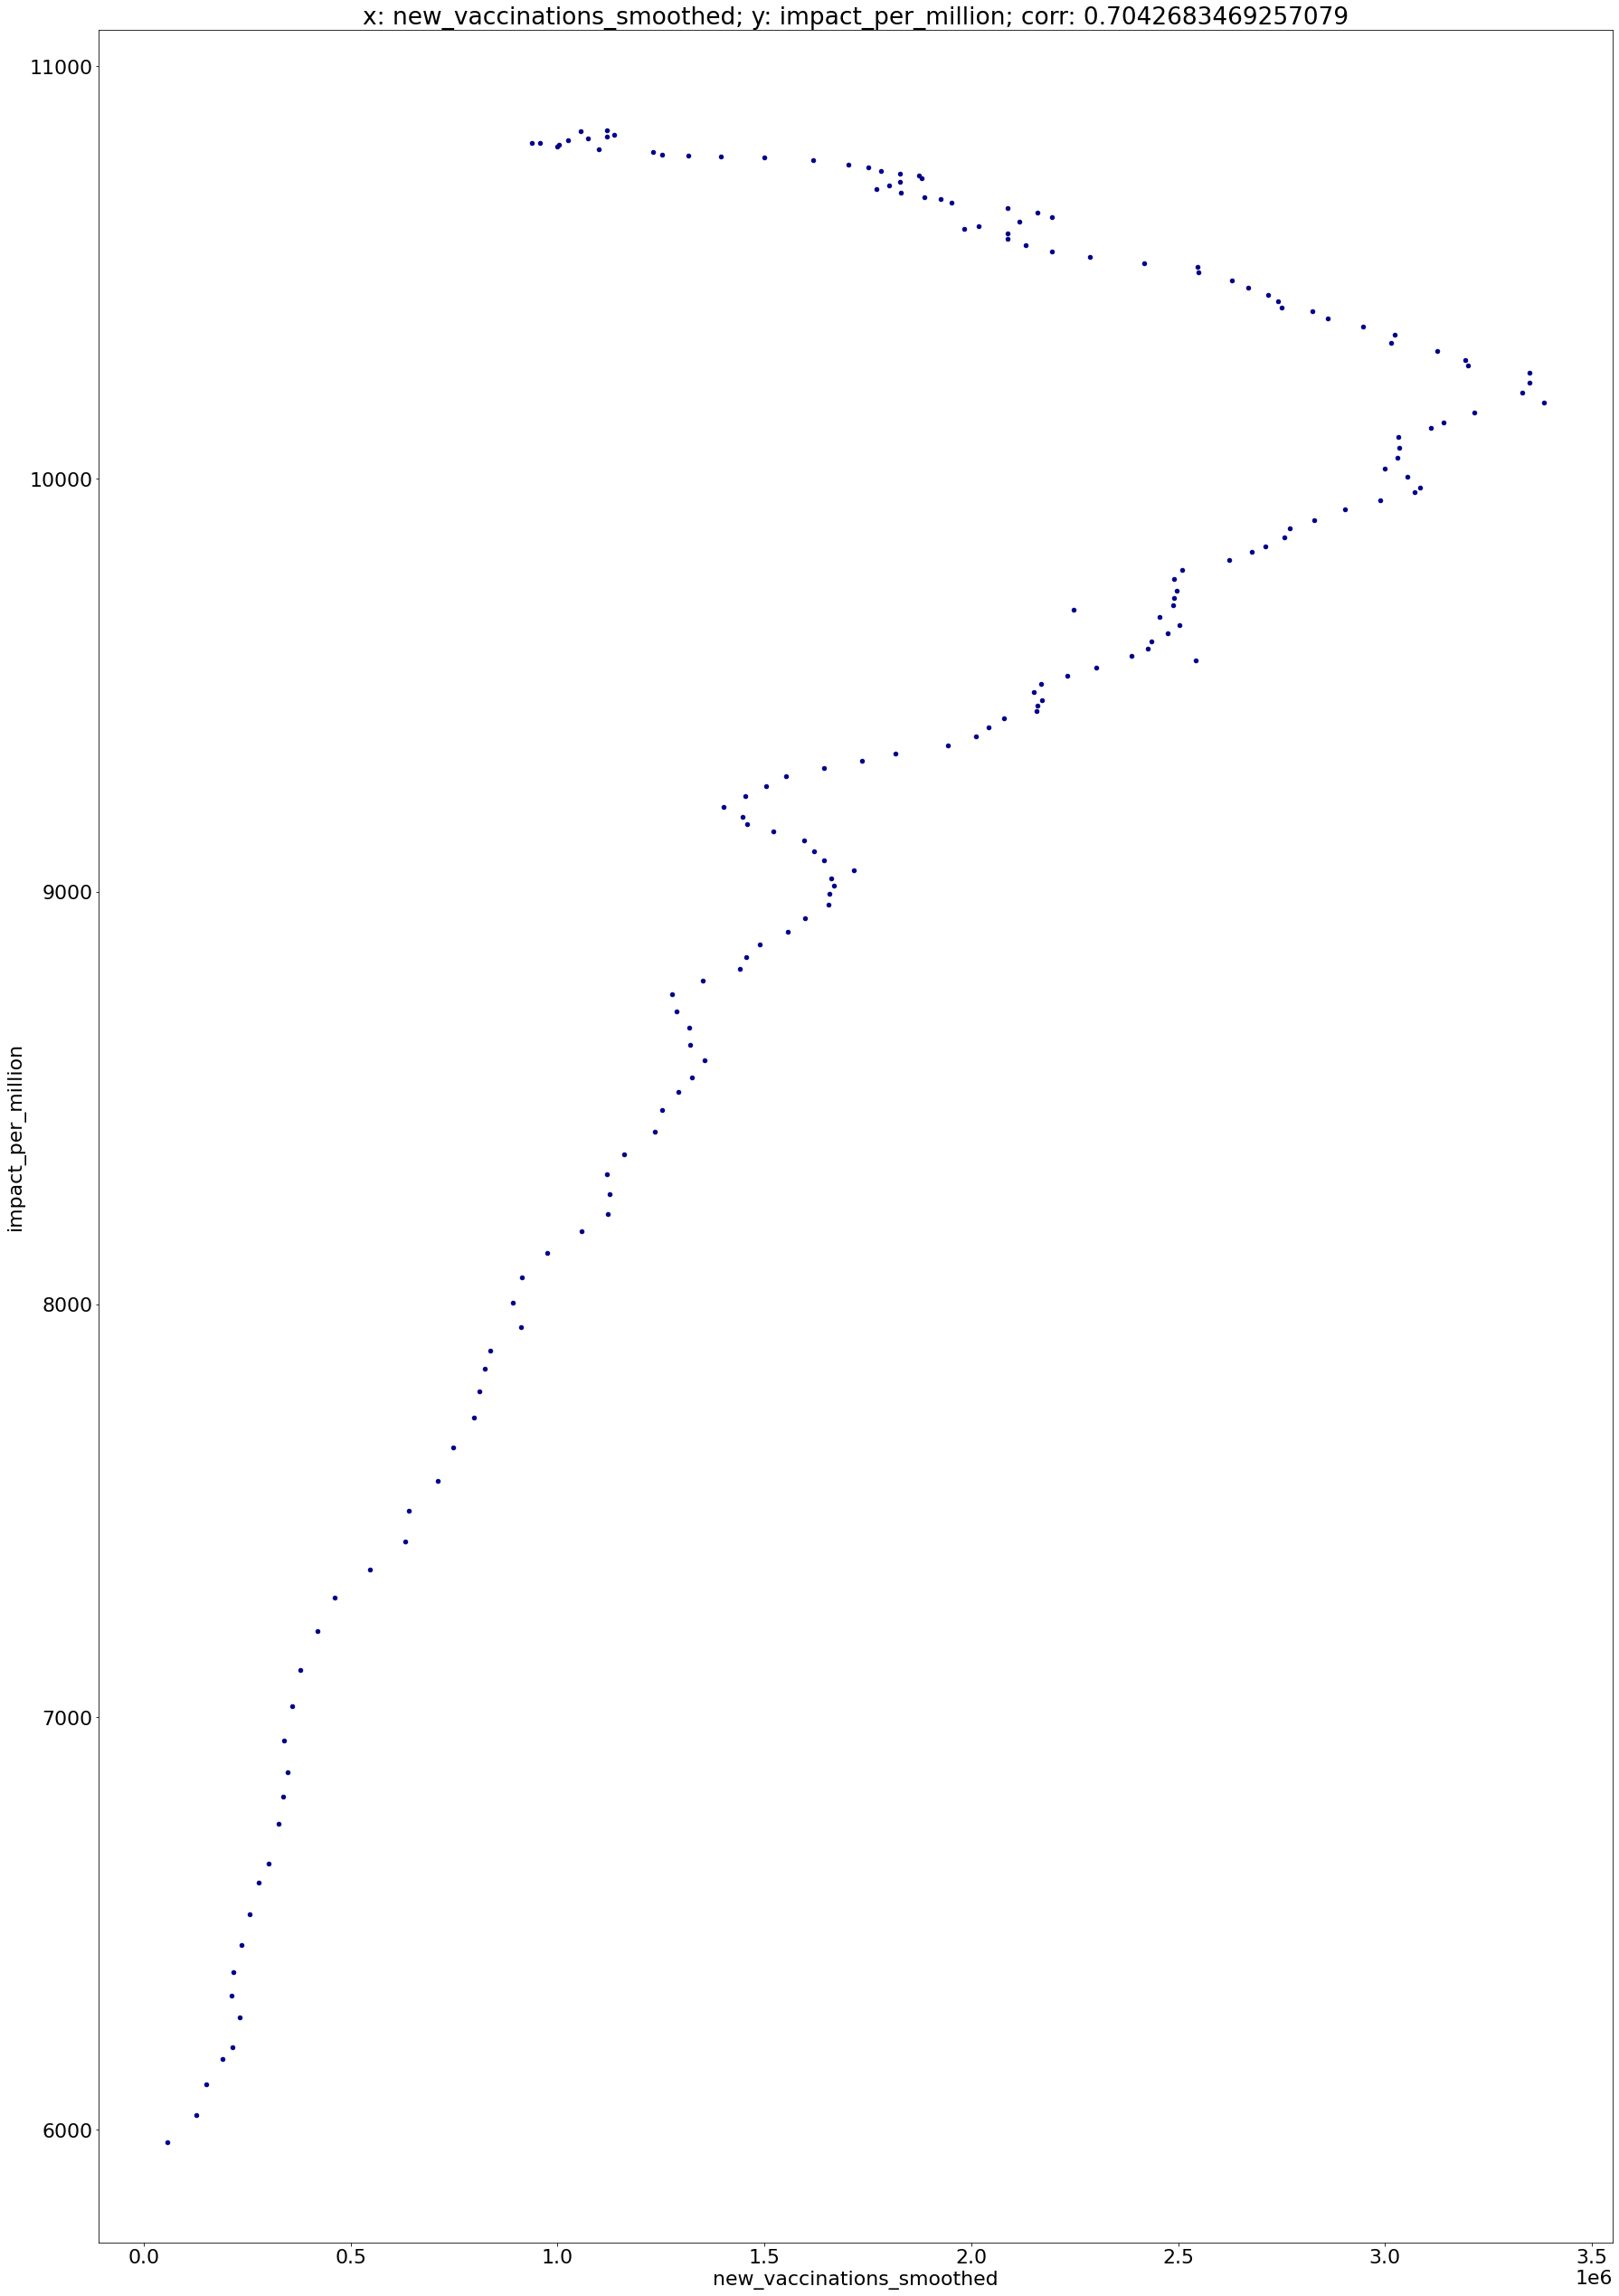

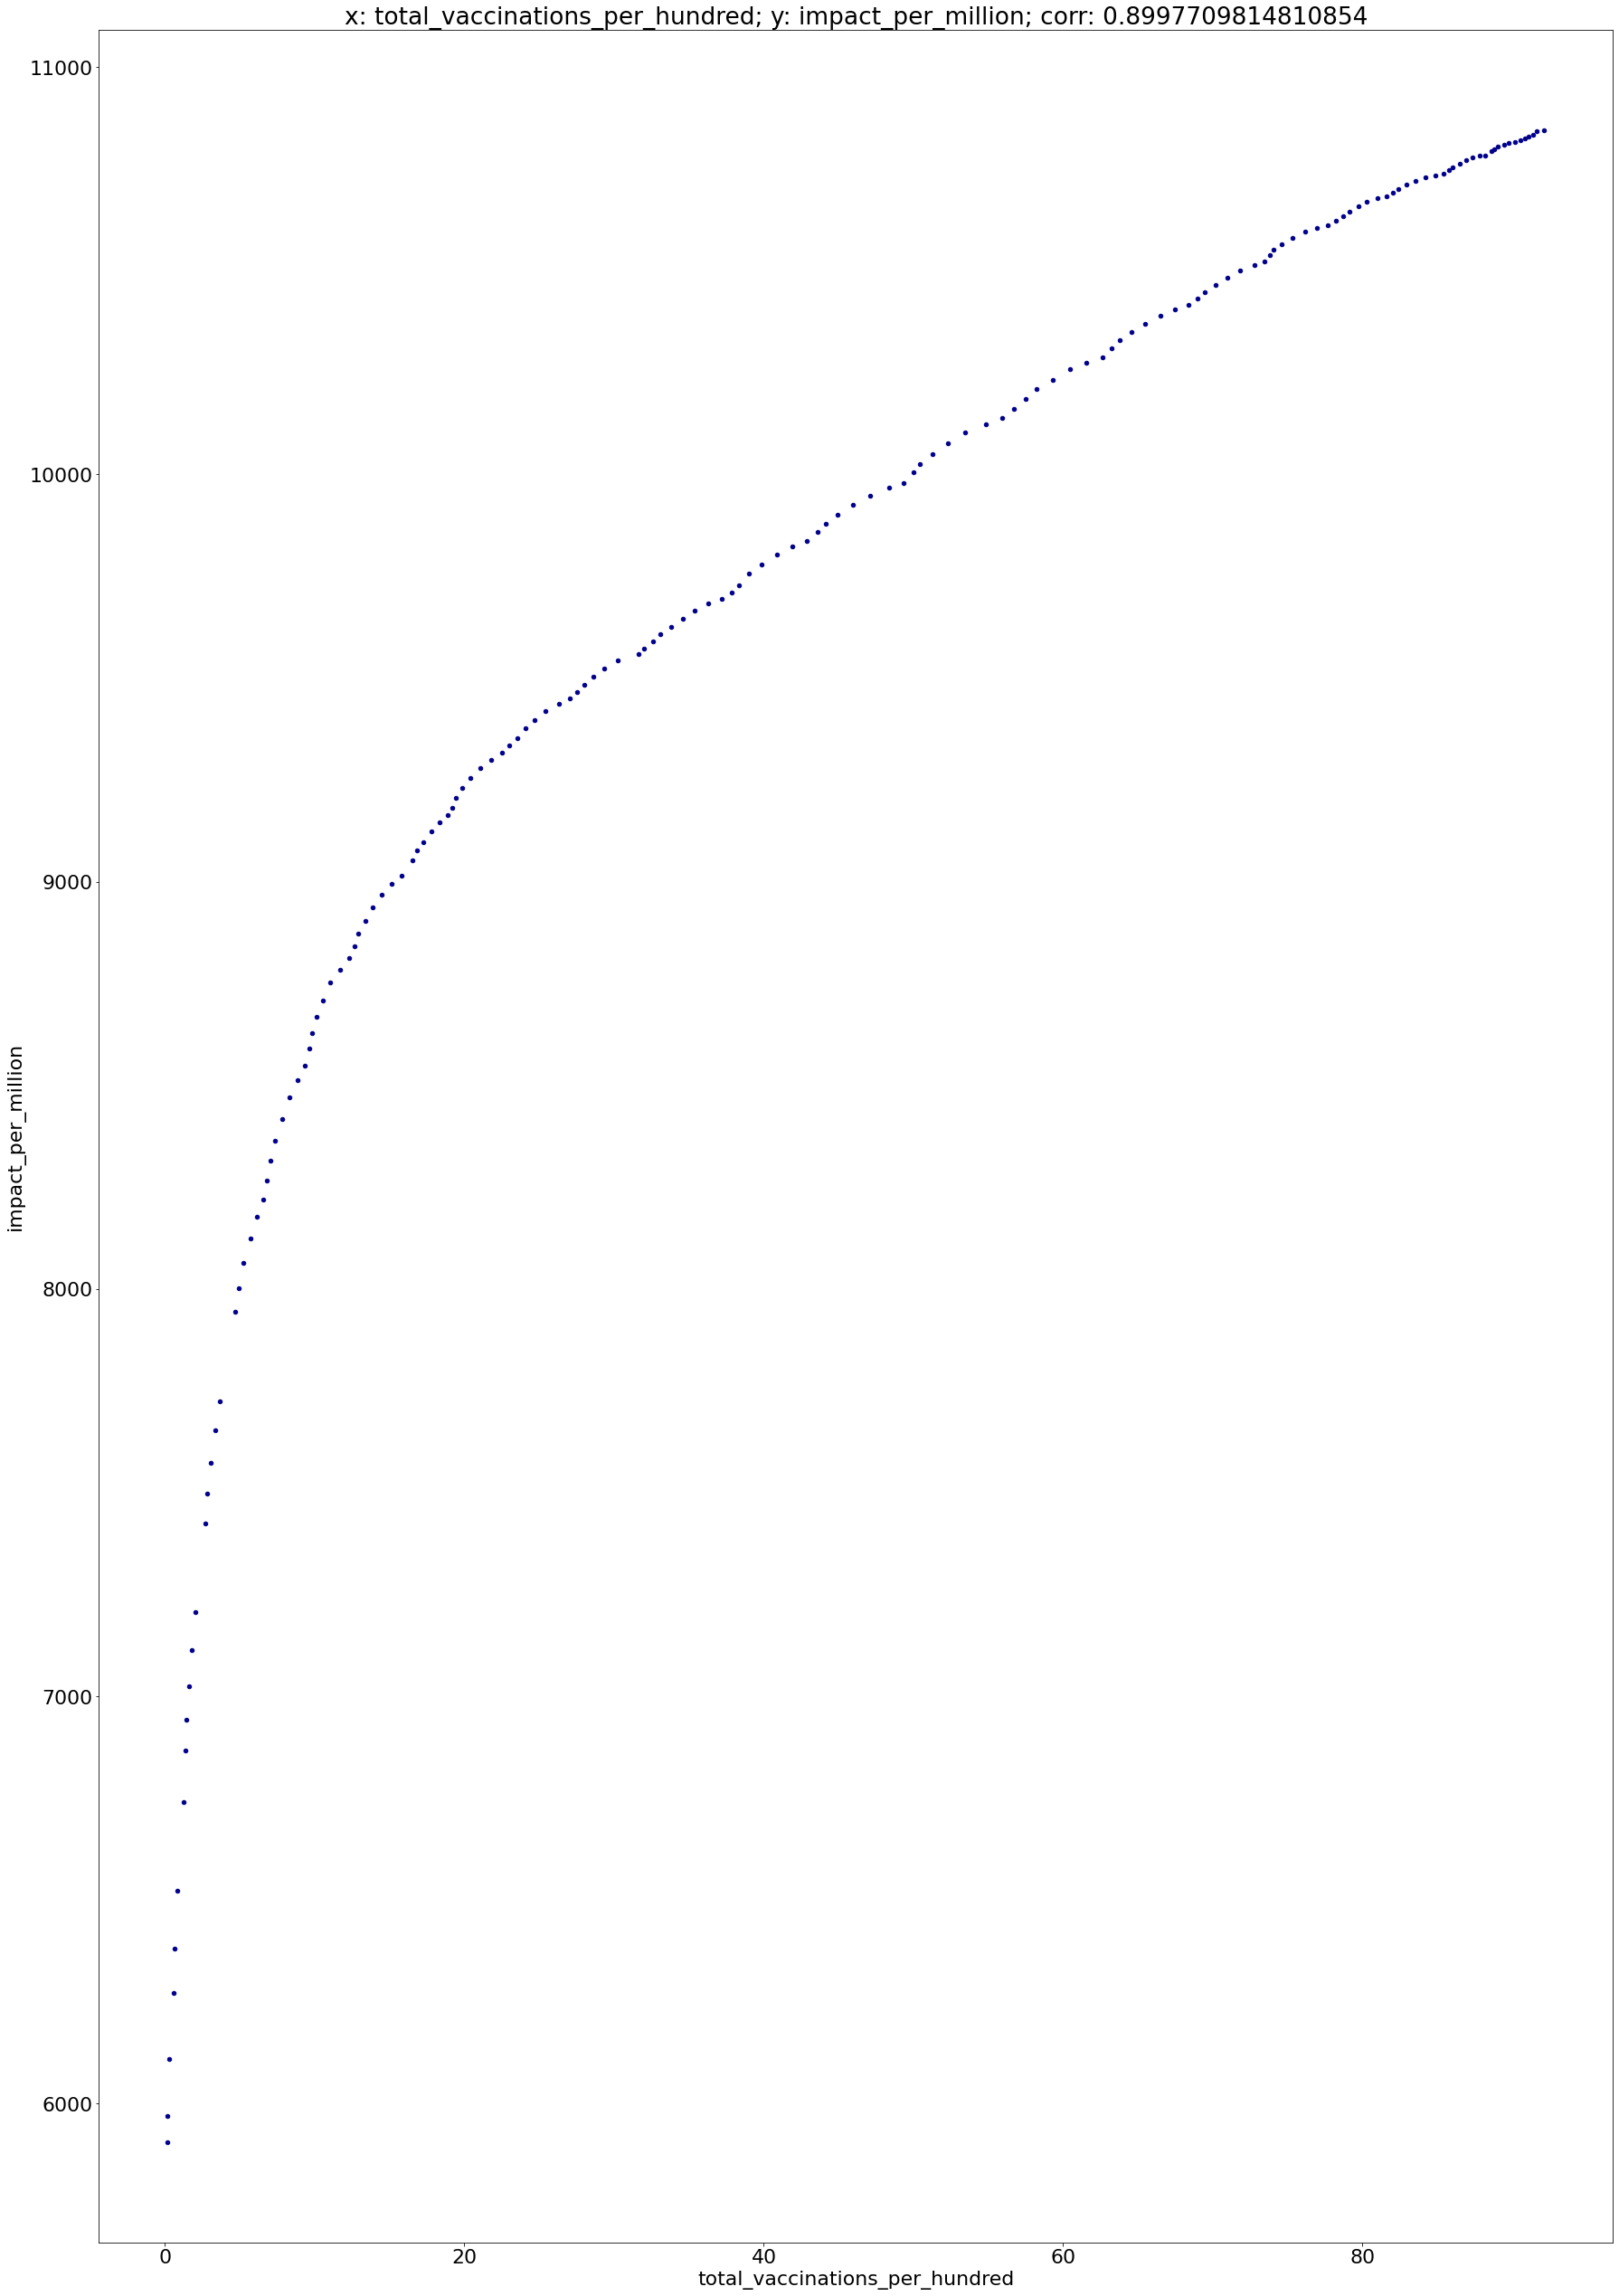

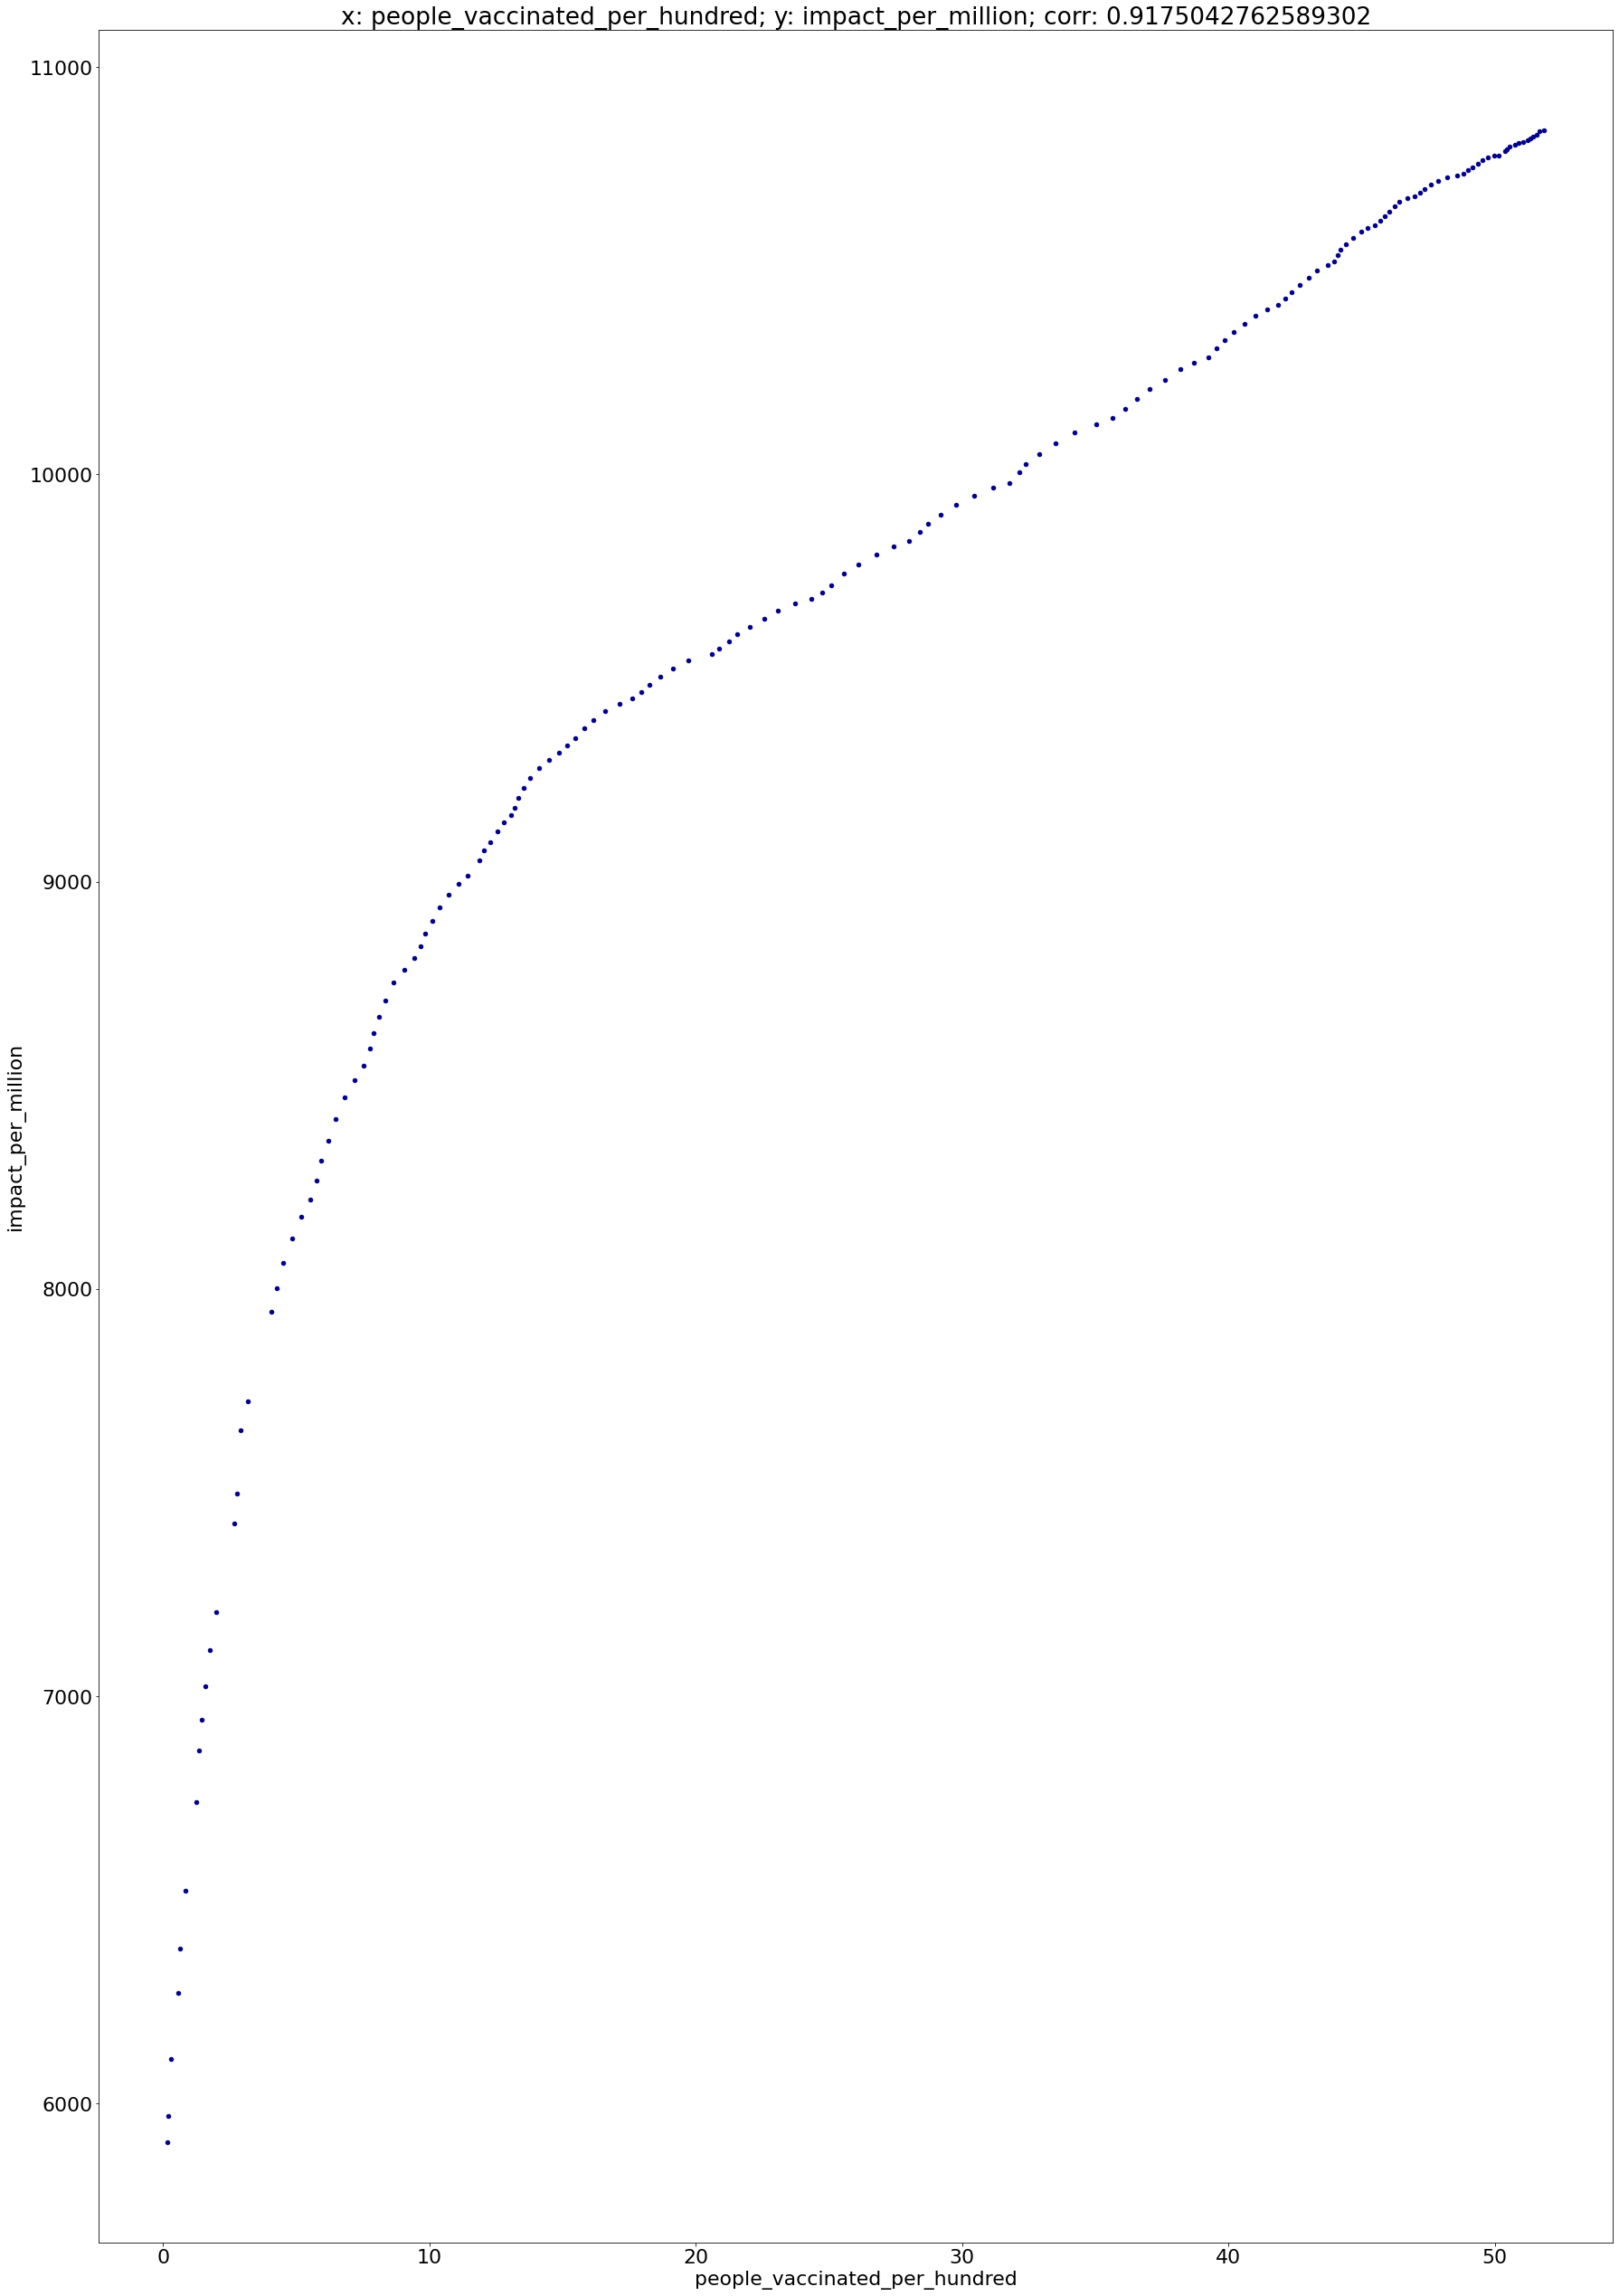

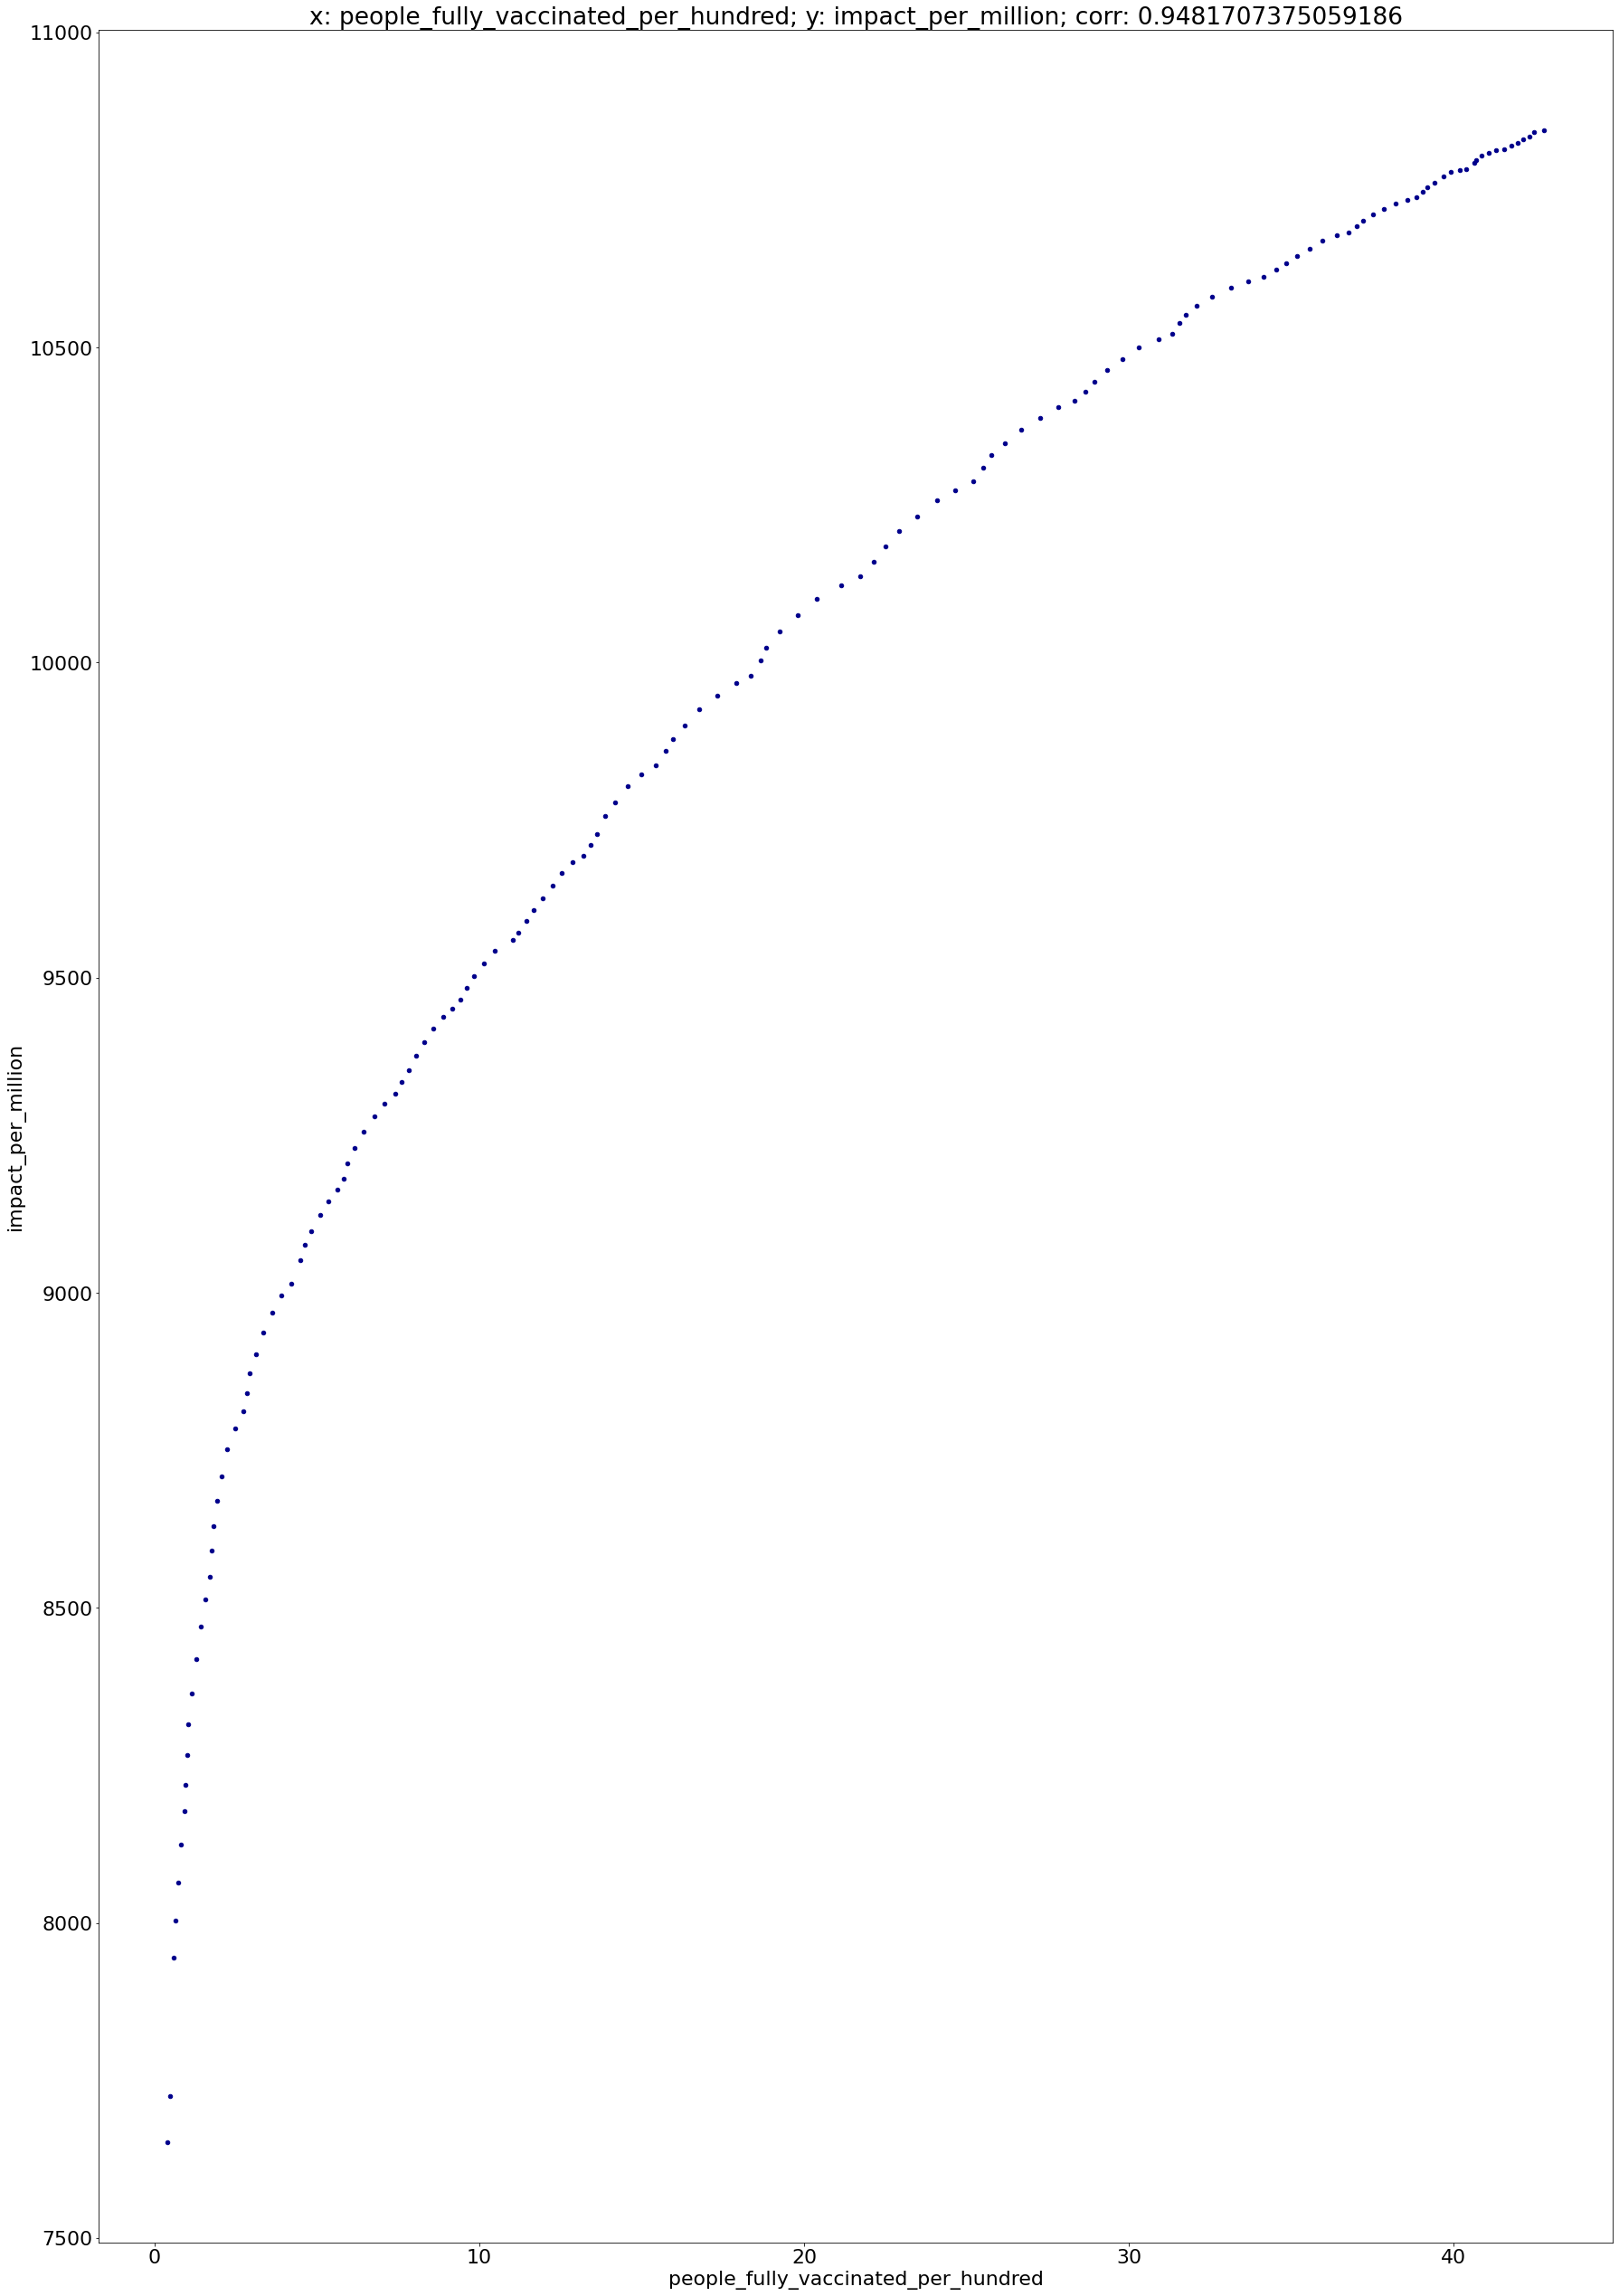

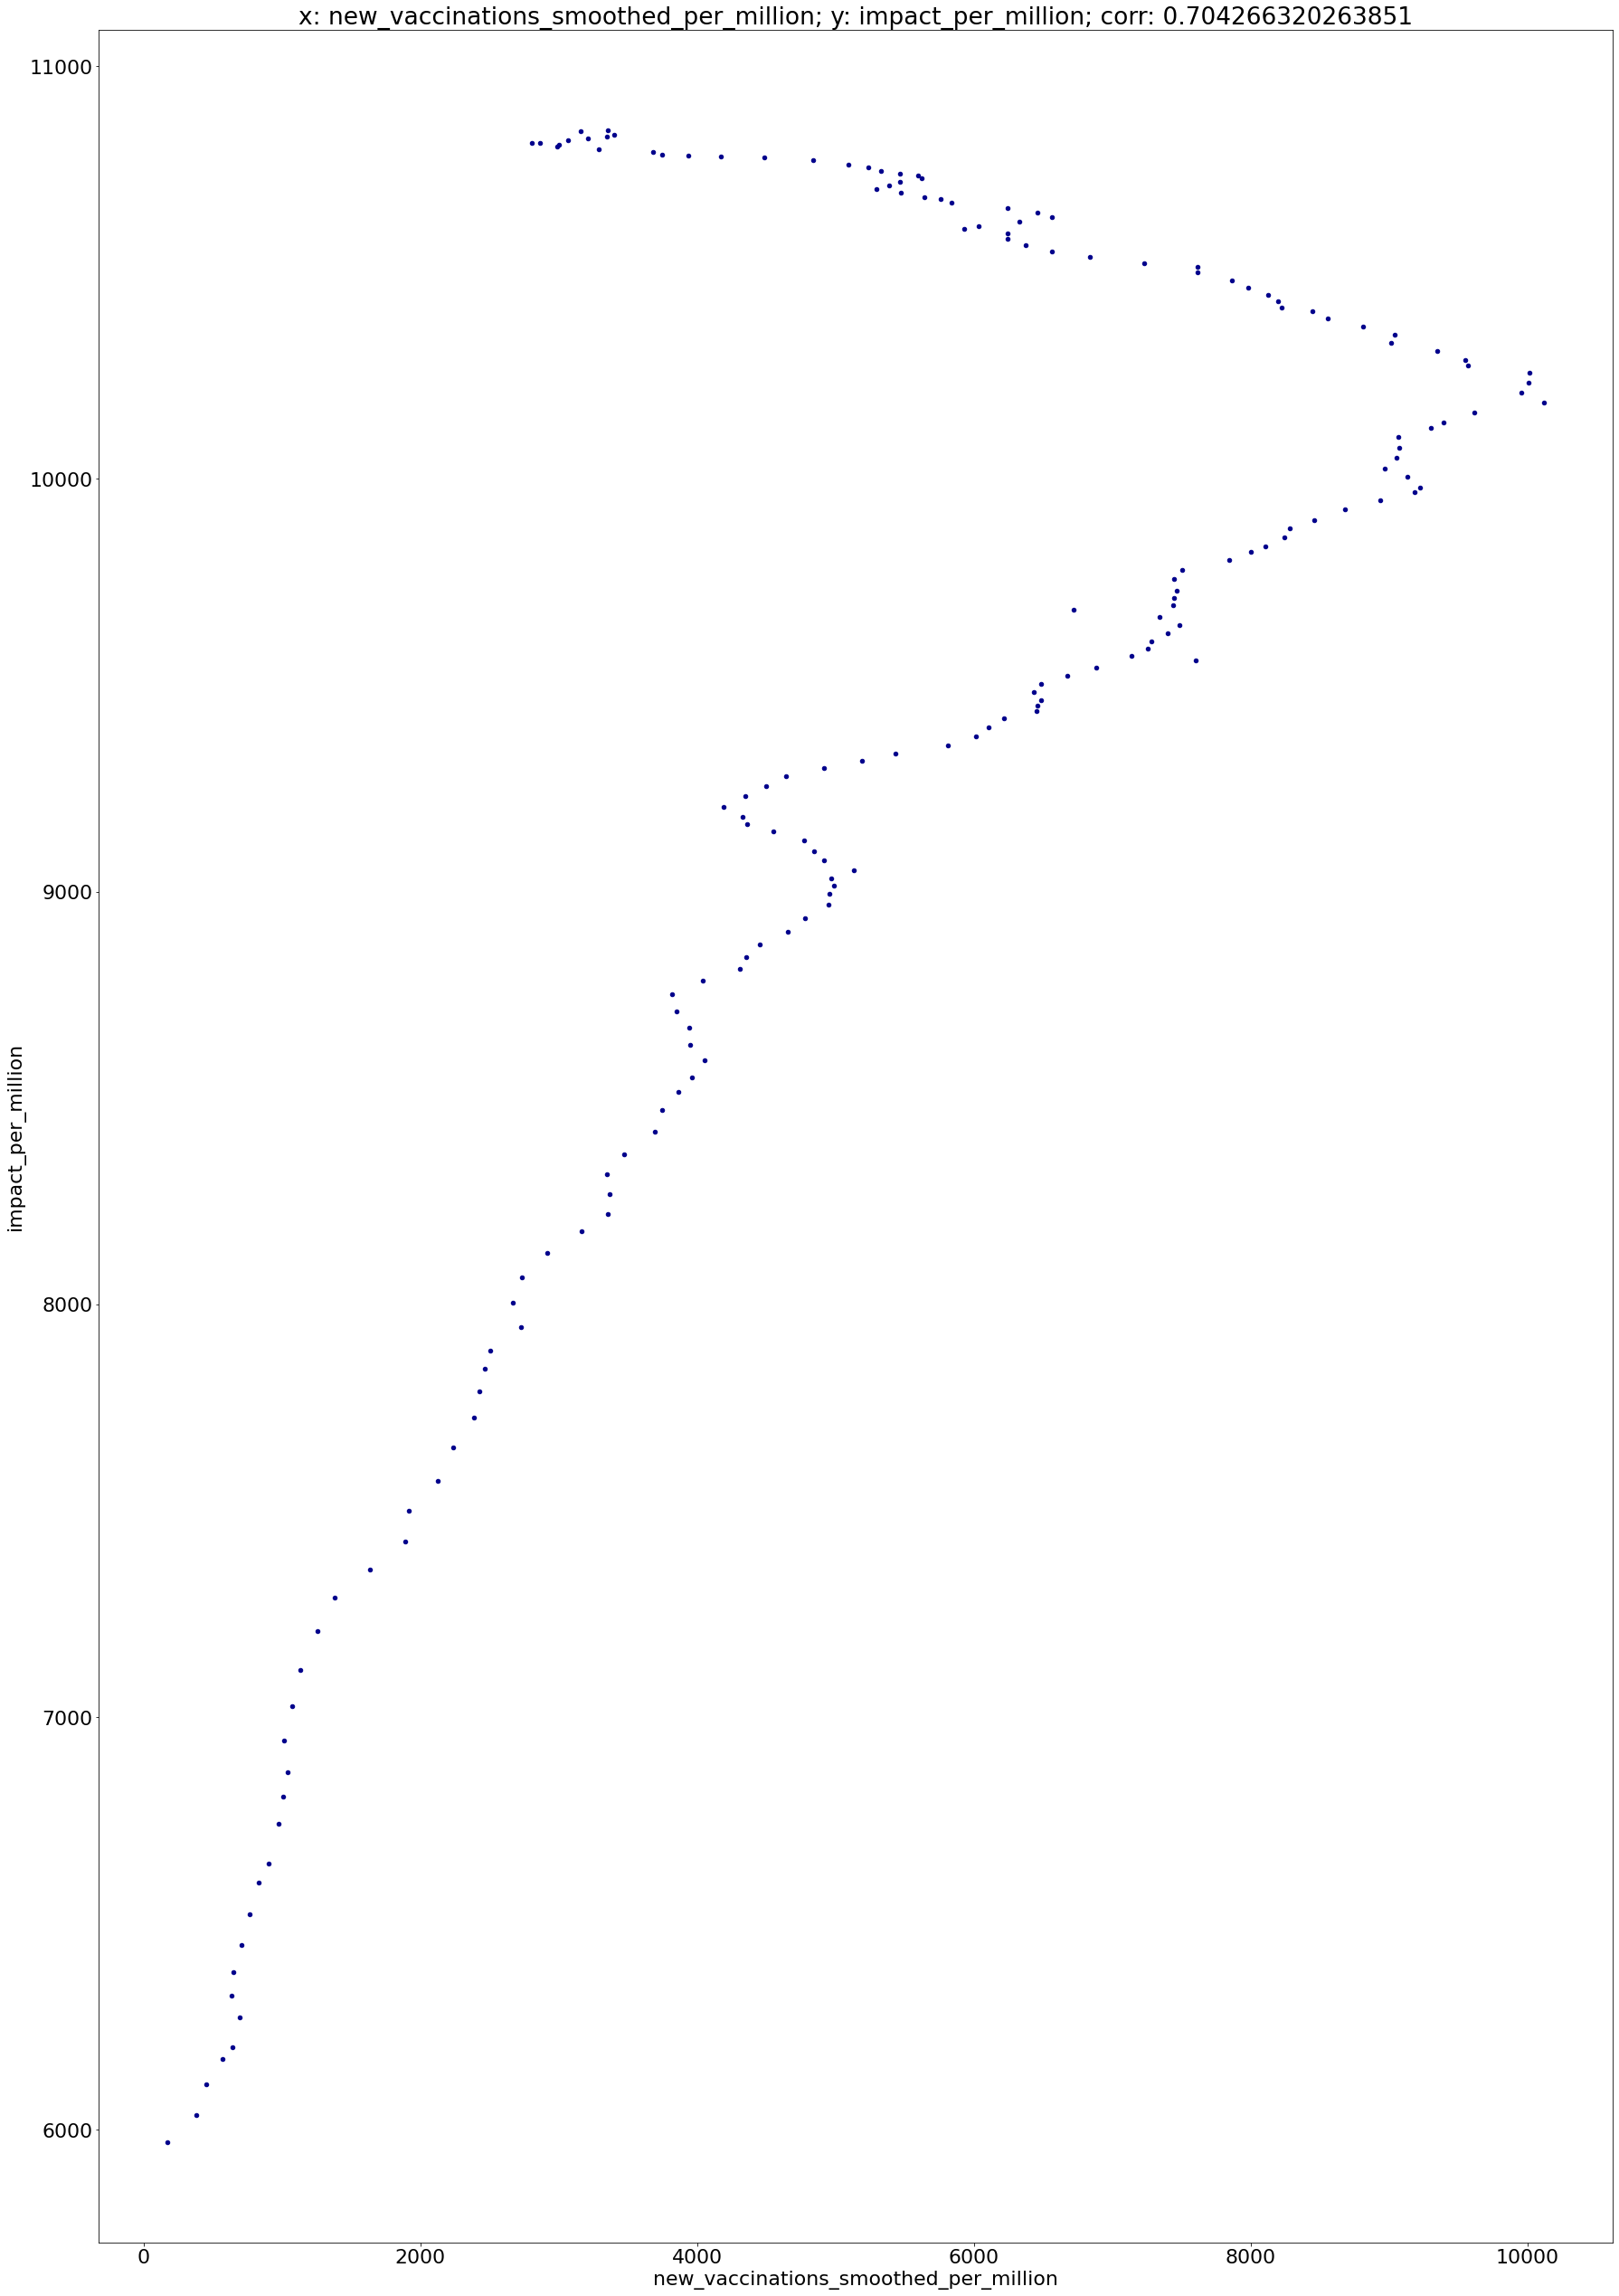

In [12]:
# Plotting scatter impact_per_million against vaccination variables
# impact_per_million = total_cases_per_million * 0.1 + hosp_patients_per_million * 0.2 + icu_patients_per_million * 0.3 + total_deaths_per_million * 0.4
plt.figure()
dep = 'impact_per_million'
ind = ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed_per_million']
for i, j in enumerate(ind):
    correlation = df_us[j].corr(df_us[dep])
    ax = df_us.plot.scatter(x=j, y=dep, c='DarkBlue', title="x: {x_name}; y: {y_name}; corr: {corr}".format(x_name = j, y_name = dep, corr = correlation), figsize=(30,45), fontsize=22)